<a href="https://colab.research.google.com/github/mostafa-ja/mal_adv4/blob/main/analyzing_PGD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data

In [1]:
#RBF_models

download_links = [
                  'https://drive.google.com/uc?id=1-8lJXLdAl_4NdDwzw9kFML0aiOCTrI9f',
                  'https://drive.google.com/uc?id=1-OHACrNCt0yKBbdqQPVfNZcjKt5_jxKD',
                  'https://drive.google.com/uc?id=1-KeXJXtU1_6m9JOhormeVwigy0myX3HL',
                  'https://drive.google.com/uc?id=1-13RDdZqnrNkdHg3D8PC5KI0CZREwlsz',
                  'https://drive.google.com/uc?id=1-8LjsCdzKh6asxCFsYLiQZbSEXXKSQBP',

]

import gdown
output_filepath = '/content/'
for link in download_links:
  gdown.download(link, output_filepath)

Downloading...
From (original): https://drive.google.com/uc?id=1-8lJXLdAl_4NdDwzw9kFML0aiOCTrI9f
From (redirected): https://drive.google.com/uc?id=1-8lJXLdAl_4NdDwzw9kFML0aiOCTrI9f&confirm=t&uuid=68fe5012-cb31-4c71-9cfa-80f08fe2c179
To: /content/best_model_gaussian_400.pth
100%|██████████| 32.0M/32.0M [00:01<00:00, 28.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-OHACrNCt0yKBbdqQPVfNZcjKt5_jxKD
To: /content/best_model_gaussian_600_nonremoval.pth
100%|██████████| 5.50M/5.50M [00:00<00:00, 46.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-KeXJXtU1_6m9JOhormeVwigy0myX3HL
To: /content/best_model_gaussian_600.pth
100%|██████████| 24.0M/24.0M [00:00<00:00, 83.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-13RDdZqnrNkdHg3D8PC5KI0CZREwlsz
To: /content/best_model_gaussian_1000_nonremoval.pth
100%|██████████| 9.16M/9.16M [00:00<00:00, 40.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-8LjsCdzKh6asxCFsYLiQZbSEXXKSQBP
From (redirec

In [2]:

download_links = ['https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_0.npz',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_1.npz',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_2.npz',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_y0.npz',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_y1.npz',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_y2.npz',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/model_DNN_drebin_best.pth',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/model_AT_rFGSM_weightedLoss.pth',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/model_AT_rFGSM.pth',
                  'https://github.com/mostafa-ja/mal_adv4/raw/main/dataset/insertion_array.pkl',
                  'https://github.com/mostafa-ja/mal_adv4/raw/main/dataset/removal_array.pkl',
                  'https://github.com/mostafa-ja/mal_adv4/raw/main/dataset/adverserial_attacks_functions.py'
]

In [3]:
import gdown
output_filepath = '/content/'
for link in download_links:
  gdown.download(link, output_filepath)


Downloading...
From: https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_0.npz
To: /content/sparse_matrix_0.npz
100%|██████████| 461k/461k [00:00<00:00, 6.81MB/s]
Downloading...
From: https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_1.npz
To: /content/sparse_matrix_1.npz
100%|██████████| 148k/148k [00:00<00:00, 1.26MB/s]
Downloading...
From: https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_2.npz
To: /content/sparse_matrix_2.npz
100%|██████████| 150k/150k [00:00<00:00, 1.76MB/s]
Downloading...
From: https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_y0.npz
To: /content/sparse_matrix_y0.npz
100%|██████████| 5.79k/5.79k [00:00<00:00, 12.7MB/s]
Downloading...
From: https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_y1.npz
To: /content/sparse_matrix_y1.npz
100%|██████████| 2.64k/2.64k [00:00<00:00, 7.52MB/s]
Downloading...
From: https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_y2

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,balanced_accuracy_score
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pickle
import random
import time

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

from adverserial_attacks_functions import *


torch.manual_seed(0)



cpu
cpu


In [5]:
def set_seed(seed: int = 42) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    #os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

set_seed(42)

Random seed set as 42


In [6]:
# Open the .pkl file
with open('/content/insertion_array.pkl', 'rb') as f:
    # Load the object
    insertion_array = pickle.load(f)

# Close the file
f.close()

insertion_array = torch.tensor(insertion_array, dtype=torch.uint8).to(device)
print(len(insertion_array))

# Open the .pkl file
with open('/content/removal_array.pkl', 'rb') as f:
    # Load the object
    removal_array = pickle.load(f)

# Close the file
f.close()

removal_array = torch.tensor(removal_array, dtype=torch.uint8).to(device)
print(len(removal_array))


10000
10000


In [7]:

# Load dataset
X_train = sparse.load_npz("/content/sparse_matrix_0.npz").toarray()
X_val = sparse.load_npz("/content/sparse_matrix_1.npz").toarray()
X_test = sparse.load_npz("/content/sparse_matrix_2.npz").toarray()

X_train = torch.tensor(X_train, dtype=torch.int8)
X_val = torch.tensor(X_val, dtype=torch.int8)
X_test = torch.tensor(X_test, dtype=torch.int8)


y_train = sparse.load_npz("/content/sparse_matrix_y0.npz").toarray().reshape((-1, 1))
y_val = sparse.load_npz("/content/sparse_matrix_y1.npz").toarray().reshape((-1, 1))
y_test = sparse.load_npz("/content/sparse_matrix_y2.npz").toarray().reshape((-1, 1))

y_train = torch.tensor(y_train, dtype=torch.int8)
y_val = torch.tensor(y_val, dtype=torch.int8)
y_test = torch.tensor(y_test, dtype=torch.int8)


print("Shapes:")
print("x_train:", X_train.shape)
print("x_val:", X_val.shape)
print("x_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)

Shapes:
x_train: torch.Size([28683, 10000])
x_val: torch.Size([9562, 10000])
x_test: torch.Size([9562, 10000])
y_train: torch.Size([28683, 1])
y_val: torch.Size([9562, 1])
y_test: torch.Size([9562, 1])


In [8]:
# number of benigns and malicious sample in training dataset
n_ben = (y_train.squeeze()== 0).sum().item()
n_mal = (y_train.squeeze()== 1).sum().item()
print('the proportion of malwares : ', n_mal/(n_mal+n_ben))

# Combine features and labels into datasets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Define the DataLoader for training, validation, and test sets
batch_size = 1024
train_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Clear unnecessary variables
del train_dataset, val_dataset, test_dataset, y_train, y_val, y_test


the proportion of malwares :  0.11386535578565701


In [9]:
model_DNN = MalwareDetectionModel().to(device)
# Load model parameters
model_DNN.load_state_dict(torch.load('model_DNN_drebin_best.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [10]:
# Create an instance of your model
model_AT_rFGSM = MalwareDetectionModel().to(device)

# Load model parameters
model_AT_rFGSM.load_state_dict(torch.load('model_AT_rFGSM.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [11]:
# Create an instance of your model
model_AT_rFGSM_weightedLoss = MalwareDetectionModel().to(device)

# Load model parameters
model_AT_rFGSM_weightedLoss.load_state_dict(torch.load('model_AT_rFGSM_weightedLoss.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [12]:
model_evaluation(model_DNN, test_loader, device)

Test Accuracy: 0.9912
Test balanced Accuracy: 0.9785
Precision: 0.9637
Recall: 0.9619
F1-score: 0.9628
True Positives (TP): 1087
True Negatives (TN): 8391
False Positives (FP): 41
False Negatives (FN): 43
False Negative Rate (FNR): 3.8053
False Positive Rate (FPR): 0.4862


In [13]:
model_evaluation(model_AT_rFGSM,test_loader,device)

Test Accuracy: 0.9893
Test balanced Accuracy: 0.9710
Precision: 0.9622
Recall: 0.9469
F1-score: 0.9545
True Positives (TP): 1070
True Negatives (TN): 8390
False Positives (FP): 42
False Negatives (FN): 60
False Negative Rate (FNR): 5.3097
False Positive Rate (FPR): 0.4981


In [14]:
model_evaluation(model_AT_rFGSM_weightedLoss,test_loader,device)

Test Accuracy: 0.9872
Test balanced Accuracy: 0.9782
Precision: 0.9286
Recall: 0.9664
F1-score: 0.9471
True Positives (TP): 1092
True Negatives (TN): 8348
False Positives (FP): 84
False Negatives (FN): 38
False Negative Rate (FNR): 3.3628
False Positive Rate (FPR): 0.9962


In [15]:

class RBFModel(nn.Module):
    def __init__(self, hidden_dim, output_dim, init_centers, init_sigmas, kernel):
        super(RBFModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.centers = nn.Parameter(torch.Tensor(init_centers))
        self.sigmas = nn.Parameter(torch.Tensor(init_sigmas))
        self.kernel = kernel
        # Linear layer for output
        self.linear = nn.Linear(hidden_dim, output_dim)

    def gaussian(self, x, c, sigma):
        return torch.exp(-torch.sum((x[:, None, :] - c) ** 2, dim=-1) / (2 * sigma ** 2))

    def laplacian(self, x, c, sigma):
        return torch.exp(-torch.sum(torch.abs(x[:, None, :] - c) , dim=-1) / sigma)

    def forward(self, x):
      if self.kernel == 'gaussian':
        radial_out = self.gaussian(x, self.centers, self.sigmas)
      elif self.kernel == 'laplacian':
        radial_out = self.laplacian(x, self.centers, self.sigmas)
      else:
        raise ValueError("Invalid kernel type. Choose 'gaussian' or 'laplacian'.")

      output = self.linear(radial_out.to(torch.float32))
      return output


In [16]:
non_removal_features = False
non_removal_mask = torch.logical_not(removal_array).to('cpu')
sigma = 4.15
kernel = 'gaussian'
all_centers = torch.rand((1000, 10000))
model_gaussian_1000 = RBFModel(1000, 2, all_centers, [sigma], kernel)
model_gaussian_1000 = model_gaussian_1000.to(device)

# Load the model state dictionary
model_gaussian_1000.load_state_dict(torch.load('/content/best_model_gaussian_1000.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [17]:
non_removal_features = True
non_removal_mask = torch.logical_not(removal_array).to('cpu')
sigma = 4.15
kernel = 'gaussian'
all_centers = torch.rand((1000, 1144))
model_gaussian_1000_nonremoval = RBFModel(1000, 2, all_centers, [sigma], kernel)
model_gaussian_1000_nonremoval = model_gaussian_1000_nonremoval.to(device)

# Load the model state dictionary
model_gaussian_1000_nonremoval.load_state_dict(torch.load('/content/best_model_gaussian_1000_nonremoval.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [18]:
for x,y in test_loader:
  print(x.shape)
  print(y.shape)
  break

bens = x[y.squeeze()==0]
bens_y = y[y.squeeze()==0]
print(bens.shape)

mals = x[y.squeeze()==1]
mals_y = y[y.squeeze()==1]
print(mals.shape)

torch.Size([1024, 10000])
torch.Size([1024, 1])
torch.Size([909, 10000])
torch.Size([115, 10000])


#analyzing PGD

In [39]:
x_input = mals
# Boundary calculations
scaled_max_extended = torch.tensor(torch.maximum(insertion_array.float(), x_input),dtype=torch.float32)

scaled_min_extended = torch.tensor(torch.minimum((1. - removal_array.float()), x_input),dtype=torch.float32)

print(x_input[0,:20])
print(insertion_array[:20])
print(removal_array[:20])

print(scaled_min_extended[0,:20])
print(scaled_max_extended[0,:20])



tensor([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       dtype=torch.int8)
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       dtype=torch.uint8)
tensor([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       dtype=torch.uint8)
tensor([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 1.])


<ipython-input-39-c402d35536d5>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scaled_max_extended = torch.tensor(torch.maximum(insertion_array.float(), x_input),dtype=torch.float32)
<ipython-input-39-c402d35536d5>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scaled_min_extended = torch.tensor(torch.minimum((1. - removal_array.float()), x_input),dtype=torch.float32)


In [26]:
scaled_max_extended[0,:20]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       dtype=torch.int16)

In [27]:
scaled_min_extended[0,:20]

tensor([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.])

In [65]:
def get_done(x, y, model):
    # Get the model's predictions
    outputs = model(x)

    # Use argmax to get the predicted class indices
    predicted = torch.argmax(outputs, dim=1)

    # Ensure y is in the same shape as predicted for comparison
    y = y.view_as(predicted)

    # Determine if the predictions are incorrect
    done = (predicted != y).bool()

    return done

In [52]:
def pgd(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Boundary calculations
    scaled_max_extended = torch.maximum(insertion_array.float(), x)
    scaled_min_extended = torch.minimum((1. - removal_array.float()), x)

    # Multi-step PGD
    for t in range(k):

        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, y.view(-1).long())
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print('loss : ',criterion(y_model, y.view(-1).long()))

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=scaled_min_extended, max=scaled_max_extended)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    diff = torch.abs(x_next - x).sum(dim=-1)

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")
        print('mean of updated features',torch.mean(diff))

    return x_next

In [47]:
i=13
adv3 = pgd(mals[i:i+1].to(torch.float32).to(device), mals_y[i:i+1].to(device), model_AT_rFGSM, insertion_array, removal_array, k=200, step_length=.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

PGD linf: Attack effectiveness 100.000%.
mean of differnce featres tensor(43.)


In [48]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd, device, **attack_params)

PGD linf: Attack effectiveness 67.826%.
mean of differnce featres tensor(27.3826)
PGD linf: Attack effectiveness 56.410%.
mean of differnce featres tensor(23.1624)
PGD linf: Attack effectiveness 66.400%.
mean of differnce featres tensor(27.4000)
PGD linf: Attack effectiveness 64.078%.
mean of differnce featres tensor(27.1068)
PGD linf: Attack effectiveness 65.487%.
mean of differnce featres tensor(24.5310)
PGD linf: Attack effectiveness 63.063%.
mean of differnce featres tensor(25.9099)
PGD linf: Attack effectiveness 65.926%.
mean of differnce featres tensor(27.9704)
PGD linf: Attack effectiveness 58.394%.
mean of differnce featres tensor(24.2117)
PGD linf: Attack effectiveness 68.800%.
mean of differnce featres tensor(29.2400)
PGD linf: Attack effectiveness 67.347%.
mean of differnce featres tensor(28.6939)
Accuracy of just malwares (without attack): 94.69% | Under attack: 35.84%.


In [70]:



def pgd_min(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Boundary calculations
    scaled_max_extended = torch.maximum(insertion_array.float(), x)
    scaled_min_extended = torch.minimum((1. - removal_array.float()), x)

    # Multi-step PGD
    for t in range(k):

        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, torch.zeros_like(y.view(-1).long()))
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print('loss : ',criterion(y_model, y.view(-1).long()))

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=scaled_min_extended, max=scaled_max_extended)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    diff = torch.abs(x_next - x).sum(dim=-1)

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")
        print('mean of updated features',torch.mean(diff))

    return x_next

In [66]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd, device, **attack_params)

PGD l1: Attack effectiveness 4.348%.
mean of updated features tensor(0.0087)
PGD l1: Attack effectiveness 5.983%.
mean of updated features tensor(0.0085)
PGD l1: Attack effectiveness 11.200%.
mean of updated features tensor(0.0320)
PGD l1: Attack effectiveness 12.621%.
mean of updated features tensor(0.0680)
PGD l1: Attack effectiveness 6.195%.
mean of updated features tensor(0.0177)
PGD l1: Attack effectiveness 13.514%.
mean of updated features tensor(0.0450)
PGD l1: Attack effectiveness 10.370%.
mean of updated features tensor(0.0444)
PGD l1: Attack effectiveness 7.299%.
mean of updated features tensor(0.0438)
PGD l1: Attack effectiveness 5.600%.
mean of updated features tensor(0.0240)
PGD l1: Attack effectiveness 6.122%.
mean of updated features tensor(0.)
Accuracy of just malwares (without attack): 94.69% | Under attack: 91.59%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd, device, **attack_params)

PGD l1: Attack effectiveness 4.348%.
mean of updated features tensor(0.0087)
PGD l1: Attack effectiveness 5.983%.
mean of updated features tensor(0.0085)


In [55]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

PGD linf: Attack effectiveness 68.696%.
mean of updated features tensor(36.0783)
PGD linf: Attack effectiveness 66.667%.
mean of updated features tensor(36.8462)
PGD linf: Attack effectiveness 67.200%.
mean of updated features tensor(34.7120)
PGD linf: Attack effectiveness 66.019%.
mean of updated features tensor(36.3689)
PGD linf: Attack effectiveness 72.566%.
mean of updated features tensor(35.0266)
PGD linf: Attack effectiveness 65.766%.
mean of updated features tensor(36.3153)
PGD linf: Attack effectiveness 66.667%.
mean of updated features tensor(35.6815)
PGD linf: Attack effectiveness 65.693%.
mean of updated features tensor(37.0219)
PGD linf: Attack effectiveness 72.000%.
mean of updated features tensor(35.7840)
PGD linf: Attack effectiveness 69.388%.
mean of updated features tensor(34.9796)
Accuracy of just malwares (without attack): 94.69% | Under attack: 32.04%.


In [57]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 250, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

PGD linf: Attack effectiveness 72.174%.
mean of updated features tensor(44.7652)
PGD linf: Attack effectiveness 76.068%.
mean of updated features tensor(47.1624)
PGD linf: Attack effectiveness 73.600%.
mean of updated features tensor(43.9040)
PGD linf: Attack effectiveness 73.786%.
mean of updated features tensor(45.7184)
PGD linf: Attack effectiveness 78.761%.
mean of updated features tensor(45.0442)
PGD linf: Attack effectiveness 73.874%.
mean of updated features tensor(45.2523)
PGD linf: Attack effectiveness 74.074%.
mean of updated features tensor(45.0444)
PGD linf: Attack effectiveness 72.993%.
mean of updated features tensor(47.3212)
PGD linf: Attack effectiveness 80.800%.
mean of updated features tensor(45.8320)
PGD linf: Attack effectiveness 73.469%.
mean of updated features tensor(44.7959)
Accuracy of just malwares (without attack): 94.69% | Under attack: 24.96%.


In [58]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 250, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd, device, **attack_params)

PGD linf: Attack effectiveness 69.565%.
mean of updated features tensor(34.3043)
PGD linf: Attack effectiveness 59.829%.
mean of updated features tensor(30.2308)
PGD linf: Attack effectiveness 68.800%.
mean of updated features tensor(34.7920)
PGD linf: Attack effectiveness 69.903%.
mean of updated features tensor(34.3592)
PGD linf: Attack effectiveness 68.142%.
mean of updated features tensor(31.8142)
PGD linf: Attack effectiveness 69.369%.
mean of updated features tensor(32.8108)
PGD linf: Attack effectiveness 70.370%.
mean of updated features tensor(34.8593)
PGD linf: Attack effectiveness 61.314%.
mean of updated features tensor(31.5912)
PGD linf: Attack effectiveness 73.600%.
mean of updated features tensor(37.4560)
PGD linf: Attack effectiveness 69.388%.
mean of updated features tensor(35.8776)
Accuracy of just malwares (without attack): 94.69% | Under attack: 32.12%.


In [62]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd, device, **attack_params)

PGD l2: Attack effectiveness 31.304%.
mean of updated features tensor(131.1565)
PGD l2: Attack effectiveness 24.786%.
mean of updated features tensor(145.6752)
PGD l2: Attack effectiveness 28.000%.
mean of updated features tensor(160.6960)
PGD l2: Attack effectiveness 23.301%.
mean of updated features tensor(156.1651)
PGD l2: Attack effectiveness 29.204%.
mean of updated features tensor(109.5575)
PGD l2: Attack effectiveness 28.829%.
mean of updated features tensor(147.7658)
PGD l2: Attack effectiveness 28.889%.
mean of updated features tensor(149.7111)
PGD l2: Attack effectiveness 25.547%.
mean of updated features tensor(131.9635)
PGD l2: Attack effectiveness 23.200%.
mean of updated features tensor(164.8160)
PGD l2: Attack effectiveness 36.735%.
mean of updated features tensor(121.7347)
Accuracy of just malwares (without attack): 94.69% | Under attack: 72.57%.


In [59]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

PGD l2: Attack effectiveness 45.217%.
mean of updated features tensor(4.9652)
PGD l2: Attack effectiveness 34.188%.
mean of updated features tensor(6.1538)
PGD l2: Attack effectiveness 36.800%.
mean of updated features tensor(4.9040)
PGD l2: Attack effectiveness 42.718%.
mean of updated features tensor(5.9417)
PGD l2: Attack effectiveness 35.398%.
mean of updated features tensor(5.2035)
PGD l2: Attack effectiveness 39.640%.
mean of updated features tensor(4.9820)
PGD l2: Attack effectiveness 48.148%.
mean of updated features tensor(5.2815)
PGD l2: Attack effectiveness 31.387%.
mean of updated features tensor(5.4745)
PGD l2: Attack effectiveness 36.000%.
mean of updated features tensor(5.4640)
PGD l2: Attack effectiveness 48.980%.
mean of updated features tensor(5.1429)
Accuracy of just malwares (without attack): 94.69% | Under attack: 60.8%.


In [63]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 300, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

PGD l2: Attack effectiveness 60.000%.
mean of updated features tensor(10.0435)
PGD l2: Attack effectiveness 55.556%.
mean of updated features tensor(11.4359)
PGD l2: Attack effectiveness 60.800%.
mean of updated features tensor(9.4400)
PGD l2: Attack effectiveness 58.252%.
mean of updated features tensor(10.5437)
PGD l2: Attack effectiveness 61.062%.
mean of updated features tensor(10.3097)
PGD l2: Attack effectiveness 55.856%.
mean of updated features tensor(10.8739)
PGD l2: Attack effectiveness 62.222%.
mean of updated features tensor(10.0222)
PGD l2: Attack effectiveness 58.394%.
mean of updated features tensor(11.3066)
PGD l2: Attack effectiveness 62.400%.
mean of updated features tensor(10.3520)
PGD l2: Attack effectiveness 63.265%.
mean of updated features tensor(9.4490)
Accuracy of just malwares (without attack): 94.69% | Under attack: 40.35%.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def get_done(x, y, model):
    outputs = model(x)
    predicted = torch.argmax(outputs, dim=1)
    y = y.view_as(predicted)
    done = (predicted != y).bool()
    return done


def pgd_min_adam(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    model.eval()

    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), torch.zeros_like(y.view(-1).long()))

    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    # Adam optimizer variables
    m = torch.zeros_like(x)
    v = torch.zeros_like(x)
    beta1 = 0.9
    beta2 = 0.999
    epsilon_adam = 1e-15
    t = 0

    for t in range(k):
        #print('**********',t)
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, torch.zeros_like(y.view(-1).long()))

        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)

        pos_insertion = (x_var < (0.999)) * 1 * insertion_array_updated
        grad4insertion = (gradients > 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #print(torch.abs(gradients).sum())
        # Adam update
        t += 1
        m = beta1 * m + (1 - beta1) * gradients
        v = beta2 * v + (1 - beta2) * (gradients ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        gradients = m_hat / (torch.sqrt(v_hat) + epsilon_adam)
        #print(torch.abs(gradients).sum())

        # Apply norm constraints to the updated gradients
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
            print(l2norm)
        elif norm == 'l1':
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.
        elif norm == 'free':
            perturbation = gradients
        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    loss_adv = criterion(model(x_next), torch.zeros_like(y.view(-1).long())).data
    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    diff = torch.abs(x_next - x).sum(dim=-1)

    if is_report_loss_diff:
        done = get_done(x_next, y, model)
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")
        print('mean of difference features', torch.mean(diff))

    return x_next


# **`analysis`**

# PGD VS PGD2

In [ ]:
x = mals.to(device)

# Expand insertion_array and removal_array to match the batch size
expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
expanded_removal_array = removal_array.expand(x.shape[0], -1)

# Update insertion and removal arrays based on input x
insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

In [ ]:
print(insertion_array.sum())
print(insertion_array_updated.sum(dim=-1))

print(removal_array.sum())
print(removal_array_updated.sum(dim=-1))

tensor(9943, device='cuda:0')
tensor([9943, 9944, 9943, 9949, 9944, 9944, 9944, 9945, 9946, 9947, 9943, 9945,
        9944, 9943, 9943, 9944, 9946, 9945, 9947, 9945, 9945, 9946, 9944, 9945,
        9945, 9945, 9943, 9944, 9944], device='cuda:0')
tensor(8856, device='cuda:0')
tensor([9996, 9993, 9986, 9962, 9993, 9986, 9973, 9989, 9967, 9980, 9996, 9989,
        9993, 9992, 9985, 9989, 9977, 9968, 9984, 9968, 9976, 9989, 9993, 9965,
        9984, 9989, 9994, 9989, 9997], device='cuda:0')


In [ ]:
print((x.to(torch.uint8)[0]).sum())
print((removal_array_updated[0]*x.to(torch.uint8)[0]).sum())

tensor(10, device='cuda:0')
tensor(6, device='cuda:0')


In [ ]:
print((x.to(torch.uint8)[1]).sum())
print((removal_array_updated[1]*x.to(torch.uint8)[1]).sum())

tensor(18, device='cuda:0')
tensor(11, device='cuda:0')


In [ ]:
def pgd(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, y.view(-1).long())
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print('loss : ',criterion(y_model, y.view(-1).long()))

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data

        #pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.5) * 1 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / l2norm).float()
            #perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            #perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            #perturbation[torch.isnan(perturbation)] = 0.
            #perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
def pgd2(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)


    #insertion_array_updated = torch.bitwise_or(insertion_array.to(torch.uint8), x.squeeze().to(torch.uint8) )
    #removal_array_updated = torch.bitwise_or(removal_array.to(torch.uint8), (1 - x.squeeze().to(torch.uint8)) )

    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, y.view(-1).long())
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print('loss : ',criterion(y_model, y.view(-1).long()))

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data

        #pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
            #perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            #perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            #perturbation[torch.isnan(perturbation)] = 0.
            #perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
i=13
adv3 = pgd(mals[i:i+1].to(torch.float32).to(device), mals_y[i:i+1].to(device), model_AT_rFGSM, insertion_array, removal_array, k=200, step_length=.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

***********  0
loss_mal :  tensor([38.1857], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  1
loss_mal :  tensor([34.2699], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  2
loss_mal :  tensor([29.9703], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  3
loss_mal :  tensor([25.4033], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  4
loss_mal :  tensor([21.0827], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  5
loss_mal :  tensor([18.6158], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  6
loss_mal :  tensor([19.1730], device='cuda:

In [ ]:
i=13
adv3 = pgd2(mals[i:i+1].to(torch.float32).to(device), mals_y[i:i+1].to(device), model_AT_rFGSM, insertion_array, removal_array, k=200, step_length=.01, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

loss_mal :  tensor([38.1857], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
loss_mal :  tensor([36.2778], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
loss_mal :  tensor([34.1459], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
loss_mal :  tensor([32.0459], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
loss_mal :  tensor([29.7434], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
loss_mal :  tensor([27.4553], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
loss_mal :  tensor([25.1175], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
loss_m

In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd, device, **attack_params)

PGD linf: Attack effectiveness 6.897%.
PGD linf: Attack effectiveness 8.000%.
PGD linf: Attack effectiveness 7.692%.
PGD linf: Attack effectiveness 2.857%.
PGD linf: Attack effectiveness 8.000%.
PGD linf: Attack effectiveness 8.000%.
PGD linf: Attack effectiveness 0.000%.
PGD linf: Attack effectiveness 6.061%.
PGD linf: Attack effectiveness 9.524%.
PGD linf: Attack effectiveness 10.345%.
PGD linf: Attack effectiveness 10.000%.
PGD linf: Attack effectiveness 11.765%.
PGD linf: Attack effectiveness 10.000%.
PGD linf: Attack effectiveness 14.815%.
PGD linf: Attack effectiveness 0.000%.
PGD linf: Attack effectiveness 3.226%.
PGD linf: Attack effectiveness 3.333%.
PGD linf: Attack effectiveness 8.000%.
PGD linf: Attack effectiveness 0.000%.
PGD linf: Attack effectiveness 14.815%.
PGD linf: Attack effectiveness 16.667%.
PGD linf: Attack effectiveness 10.000%.
PGD linf: Attack effectiveness 0.000%.
PGD linf: Attack effectiveness 17.241%.
PGD linf: Attack effectiveness 18.182%.
PGD linf: Attac

In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd2, device, **attack_params)

PGD linf: Attack effectiveness 72.414%.
PGD linf: Attack effectiveness 60.000%.
PGD linf: Attack effectiveness 50.000%.
PGD linf: Attack effectiveness 80.000%.
PGD linf: Attack effectiveness 64.000%.
PGD linf: Attack effectiveness 52.000%.
PGD linf: Attack effectiveness 52.941%.
PGD linf: Attack effectiveness 48.485%.
PGD linf: Attack effectiveness 73.810%.
PGD linf: Attack effectiveness 55.172%.
PGD linf: Attack effectiveness 75.000%.
PGD linf: Attack effectiveness 55.882%.
PGD linf: Attack effectiveness 50.000%.
PGD linf: Attack effectiveness 70.370%.
PGD linf: Attack effectiveness 56.000%.
PGD linf: Attack effectiveness 64.516%.
PGD linf: Attack effectiveness 70.000%.
PGD linf: Attack effectiveness 72.000%.
PGD linf: Attack effectiveness 58.065%.
PGD linf: Attack effectiveness 66.667%.
PGD linf: Attack effectiveness 63.333%.
PGD linf: Attack effectiveness 73.333%.
PGD linf: Attack effectiveness 45.455%.
PGD linf: Attack effectiveness 65.517%.
PGD linf: Attack effectiveness 61.364%.


# PG2 VS PGD_min

In [ ]:
def get_done(x, y, model):
    # Get the model's predictions
    outputs = model(x)

    # Use argmax to get the predicted class indices
    predicted = torch.argmax(outputs, dim=1)

    # Ensure y is in the same shape as predicted for comparison
    y = y.view_as(predicted)

    # Determine if the predictions are incorrect
    done = (predicted != y).bool()

    return done


def pgd_min(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack (loss based on goal's class, which we have to minimize the loss).
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), torch.zeros_like(y.view(-1).long()))

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)


    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))


    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, torch.zeros_like(y.view(-1).long()))
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print('loss : ',criterion(y_model, y.view(-1).long()))

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        #print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        #pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
            #print(torch.abs(perturbation).sum())
            #print('torch.abs(perturbation).sum(dim=-1) : ',torch.abs(perturbation).sum(dim=-1))

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            #print('l2norm ; ',l2norm)
            perturbation = (gradients / (l2norm + 1e-20)).float()

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        #print(torch.abs(x_next - torch.clamp(x_next + perturbation * step_length, min=0., max=1.)).sum())
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), torch.zeros_like(y.view(-1).long())).data

    if is_report_loss_diff:
        done = get_done(x_next, y, model)
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
i=13
adv3 = pgd2(mals[i:i+1].to(torch.float32).to(device), mals_y[i:i+1].to(device), model_AT_rFGSM, insertion_array, removal_array, k=100, step_length=.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

***********  0
loss_mal :  tensor([38.1857], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  1
loss_mal :  tensor([34.2699], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  2
loss_mal :  tensor([29.9657], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  3
loss_mal :  tensor([25.3872], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  4
loss_mal :  tensor([20.8934], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  5
loss_mal :  tensor([17.8123], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  6
loss_mal :  tensor([18.1594], device='cuda:

In [ ]:
i=13
adv3 = pgd_min(mals[i:i+1].to(torch.float32).to(device), mals_y[i:i+1].to(device), model_AT_rFGSM, insertion_array, removal_array, k=100, step_length=.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

***********  0
loss_mal :  tensor([38.1857], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  1
loss_mal :  tensor([34.2345], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  2
loss_mal :  tensor([29.9309], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  3
loss_mal :  tensor([25.2920], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  4
loss_mal :  tensor([20.6400], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  5
loss_mal :  tensor([17.5564], device='cuda:0', grad_fn=<NllLossBackward0>)
loss :  tensor([-0.], device='cuda:0', grad_fn=<NllLossBackward0>)
***********  6
loss_mal :  tensor([17.9629], device='cuda:

In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd2, device, **attack_params)

PGD linf: Attack effectiveness 72.414%.
PGD linf: Attack effectiveness 60.000%.
PGD linf: Attack effectiveness 50.000%.
PGD linf: Attack effectiveness 80.000%.
PGD linf: Attack effectiveness 64.000%.
PGD linf: Attack effectiveness 52.000%.
PGD linf: Attack effectiveness 52.941%.
PGD linf: Attack effectiveness 48.485%.
PGD linf: Attack effectiveness 73.810%.
PGD linf: Attack effectiveness 55.172%.
PGD linf: Attack effectiveness 75.000%.
PGD linf: Attack effectiveness 55.882%.
PGD linf: Attack effectiveness 50.000%.
PGD linf: Attack effectiveness 70.370%.
PGD linf: Attack effectiveness 56.000%.
PGD linf: Attack effectiveness 64.516%.
PGD linf: Attack effectiveness 70.000%.
PGD linf: Attack effectiveness 72.000%.
PGD linf: Attack effectiveness 58.065%.
PGD linf: Attack effectiveness 66.667%.
PGD linf: Attack effectiveness 63.333%.
PGD linf: Attack effectiveness 73.333%.
PGD linf: Attack effectiveness 45.455%.
PGD linf: Attack effectiveness 65.517%.
PGD linf: Attack effectiveness 61.364%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

PGD linf: Attack effectiveness 72.414%.
PGD linf: Attack effectiveness 68.000%.
PGD linf: Attack effectiveness 46.154%.
PGD linf: Attack effectiveness 82.857%.
PGD linf: Attack effectiveness 68.000%.
PGD linf: Attack effectiveness 60.000%.
PGD linf: Attack effectiveness 70.588%.
PGD linf: Attack effectiveness 63.636%.
PGD linf: Attack effectiveness 71.429%.
PGD linf: Attack effectiveness 62.069%.
PGD linf: Attack effectiveness 85.000%.
PGD linf: Attack effectiveness 61.765%.
PGD linf: Attack effectiveness 55.000%.
PGD linf: Attack effectiveness 74.074%.
PGD linf: Attack effectiveness 64.000%.
PGD linf: Attack effectiveness 70.968%.
PGD linf: Attack effectiveness 73.333%.
PGD linf: Attack effectiveness 72.000%.
PGD linf: Attack effectiveness 67.742%.
PGD linf: Attack effectiveness 77.778%.
PGD linf: Attack effectiveness 66.667%.
PGD linf: Attack effectiveness 80.000%.
PGD linf: Attack effectiveness 40.909%.
PGD linf: Attack effectiveness 65.517%.
PGD linf: Attack effectiveness 65.909%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 1000, 'step_length': 0.01, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd2, device, **attack_params)

PGD linf: Attack effectiveness 72.414%.
PGD linf: Attack effectiveness 72.000%.
PGD linf: Attack effectiveness 53.846%.
PGD linf: Attack effectiveness 80.000%.
PGD linf: Attack effectiveness 68.000%.
PGD linf: Attack effectiveness 64.000%.
PGD linf: Attack effectiveness 58.824%.
PGD linf: Attack effectiveness 54.545%.
PGD linf: Attack effectiveness 73.810%.
PGD linf: Attack effectiveness 58.621%.
PGD linf: Attack effectiveness 85.000%.
PGD linf: Attack effectiveness 64.706%.
PGD linf: Attack effectiveness 50.000%.
PGD linf: Attack effectiveness 77.778%.
PGD linf: Attack effectiveness 64.000%.
PGD linf: Attack effectiveness 74.194%.
PGD linf: Attack effectiveness 70.000%.
PGD linf: Attack effectiveness 72.000%.
PGD linf: Attack effectiveness 70.968%.
PGD linf: Attack effectiveness 66.667%.
PGD linf: Attack effectiveness 73.333%.
PGD linf: Attack effectiveness 83.333%.
PGD linf: Attack effectiveness 54.545%.
PGD linf: Attack effectiveness 72.414%.
PGD linf: Attack effectiveness 75.000%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 1000, 'step_length': 0.01, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

PGD linf: Attack effectiveness 72.414%.
PGD linf: Attack effectiveness 76.000%.
PGD linf: Attack effectiveness 57.692%.
PGD linf: Attack effectiveness 82.857%.
PGD linf: Attack effectiveness 72.000%.
PGD linf: Attack effectiveness 76.000%.
PGD linf: Attack effectiveness 82.353%.
PGD linf: Attack effectiveness 69.697%.
PGD linf: Attack effectiveness 73.810%.
PGD linf: Attack effectiveness 75.862%.
PGD linf: Attack effectiveness 95.000%.
PGD linf: Attack effectiveness 67.647%.
PGD linf: Attack effectiveness 75.000%.
PGD linf: Attack effectiveness 85.185%.
PGD linf: Attack effectiveness 72.000%.
PGD linf: Attack effectiveness 77.419%.
PGD linf: Attack effectiveness 76.667%.
PGD linf: Attack effectiveness 84.000%.
PGD linf: Attack effectiveness 80.645%.
PGD linf: Attack effectiveness 77.778%.
PGD linf: Attack effectiveness 80.000%.
PGD linf: Attack effectiveness 93.333%.
PGD linf: Attack effectiveness 59.091%.
PGD linf: Attack effectiveness 79.310%.
PGD linf: Attack effectiveness 81.818%.


# PGD vs PGD2 vs PGD_min

In [ ]:
def pgd2(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)


    #insertion_array_updated = torch.bitwise_or(insertion_array.to(torch.uint8), x.squeeze().to(torch.uint8) )
    #removal_array_updated = torch.bitwise_or(removal_array.to(torch.uint8), (1 - x.squeeze().to(torch.uint8)) )

    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    loss_steps_i = []
    loss_steps_d = []
    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, y.view(-1).long())
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print('loss : ',criterion(y_model, y.view(-1).long()))

        loss_steps_i.append(loss.detach().item())
        loss_steps_d.append(criterion(y_model, torch.zeros_like(y.view(-1).long())).detach().item())

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data

        #pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
            #perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            #perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            #perturbation[torch.isnan(perturbation)] = 0.
            #perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next,loss_steps_i,loss_steps_d

In [ ]:
def get_done(x, y, model):
    # Get the model's predictions
    outputs = model(x)

    # Use argmax to get the predicted class indices
    predicted = torch.argmax(outputs, dim=1)

    # Ensure y is in the same shape as predicted for comparison
    y = y.view_as(predicted)

    # Determine if the predictions are incorrect
    done = (predicted != y).bool()

    return done


def pgd_min(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack (loss based on goal's class, which we have to minimize the loss).
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), torch.zeros_like(y.view(-1).long()))

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)


    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    loss_steps_i = []
    loss_steps_d = []
    # Multi-step PGD
    for t in range(k):
        print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, torch.zeros_like(y.view(-1).long()))
        #print(loss)
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))

        loss_steps_i.append(criterion(y_model, y.view(-1).long()).detach().item())
        loss_steps_d.append(loss.detach().item())



        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        #print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        pos_insertion = (x_var < (0.999)) * 1 * insertion_array_updated
        #pos_insertion = (x_var < 1.) * 1
        grad4insertion = (gradients > 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #print(torch.abs(gradients).sum())

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
            #print(torch.abs(perturbation).sum())
            #print('torch.abs(perturbation).sum(dim=-1) : ',torch.abs(perturbation).sum(dim=-1))

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            #print('l2norm ; ',l2norm)
            perturbation = (gradients / (l2norm + 1e-20)).float()

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        #print(torch.abs(x_next - torch.clamp(x_next + perturbation * step_length, min=0., max=1.)).sum())
        #a = (x_next + perturbation * step_length)
        #b = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)
        c = ((x_next + perturbation * step_length)- torch.clamp(x_next + perturbation * step_length, min=0., max=1.)).sum()
        if c!=0.:
          print(c)
        #print(((x_next + perturbation * step_length)- torch.clamp(x_next + perturbation * step_length, min=0., max=1.)).sum())
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

        #print('loss : ',criterion(y_model, y.view(-1).long()))
        #loss_steps_i.append(criterion(y_model, y.view(-1).long()).detach().item())
        #loss_steps_d.append(loss.detach().item())

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), torch.zeros_like(y.view(-1).long())).data

    if is_report_loss_diff:
        done = get_done(x_next, y, model)
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next,loss_steps_i,loss_steps_d

In [ ]:
def pgd(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    loss_steps_i = []
    loss_steps_d = []
    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, y.view(-1).long())
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print('loss : ',criterion(y_model, y.view(-1).long()))
        loss_steps_i.append(loss.detach().item())
        loss_steps_d.append(criterion(y_model, torch.zeros_like(y.view(-1).long())).detach().item())

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data
        #print(torch.abs(gradients).sum())

        pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        #pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients
        #print('nonzero(grad4insertion)',torch.count_nonzero(grad4insertion))

        pos_removal = (x_var > 0.5) * 0 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients
        #print('nonzero(grad4removal)',torch.count_nonzero(grad4removal))

        gradients = grad4removal + grad4insertion
        #gradients =  gradients * tensor
        #print(torch.abs(gradients).sum())
        #print('nonzero(gradients)',torch.count_nonzero(gradients))

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / l2norm).float()
            perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            perturbation[torch.isnan(perturbation)] = 0.
            perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next,loss_steps_i,loss_steps_d

In [ ]:
x_next,loss_steps_i,loss_steps_d = pgd(mals[14:15].to(torch.float32).to(device), mals_y[13:14].to(device), model_AT_rFGSM, insertion_array, removal_array, k=100, step_length=.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

PGD linf: Attack effectiveness 0.000%.


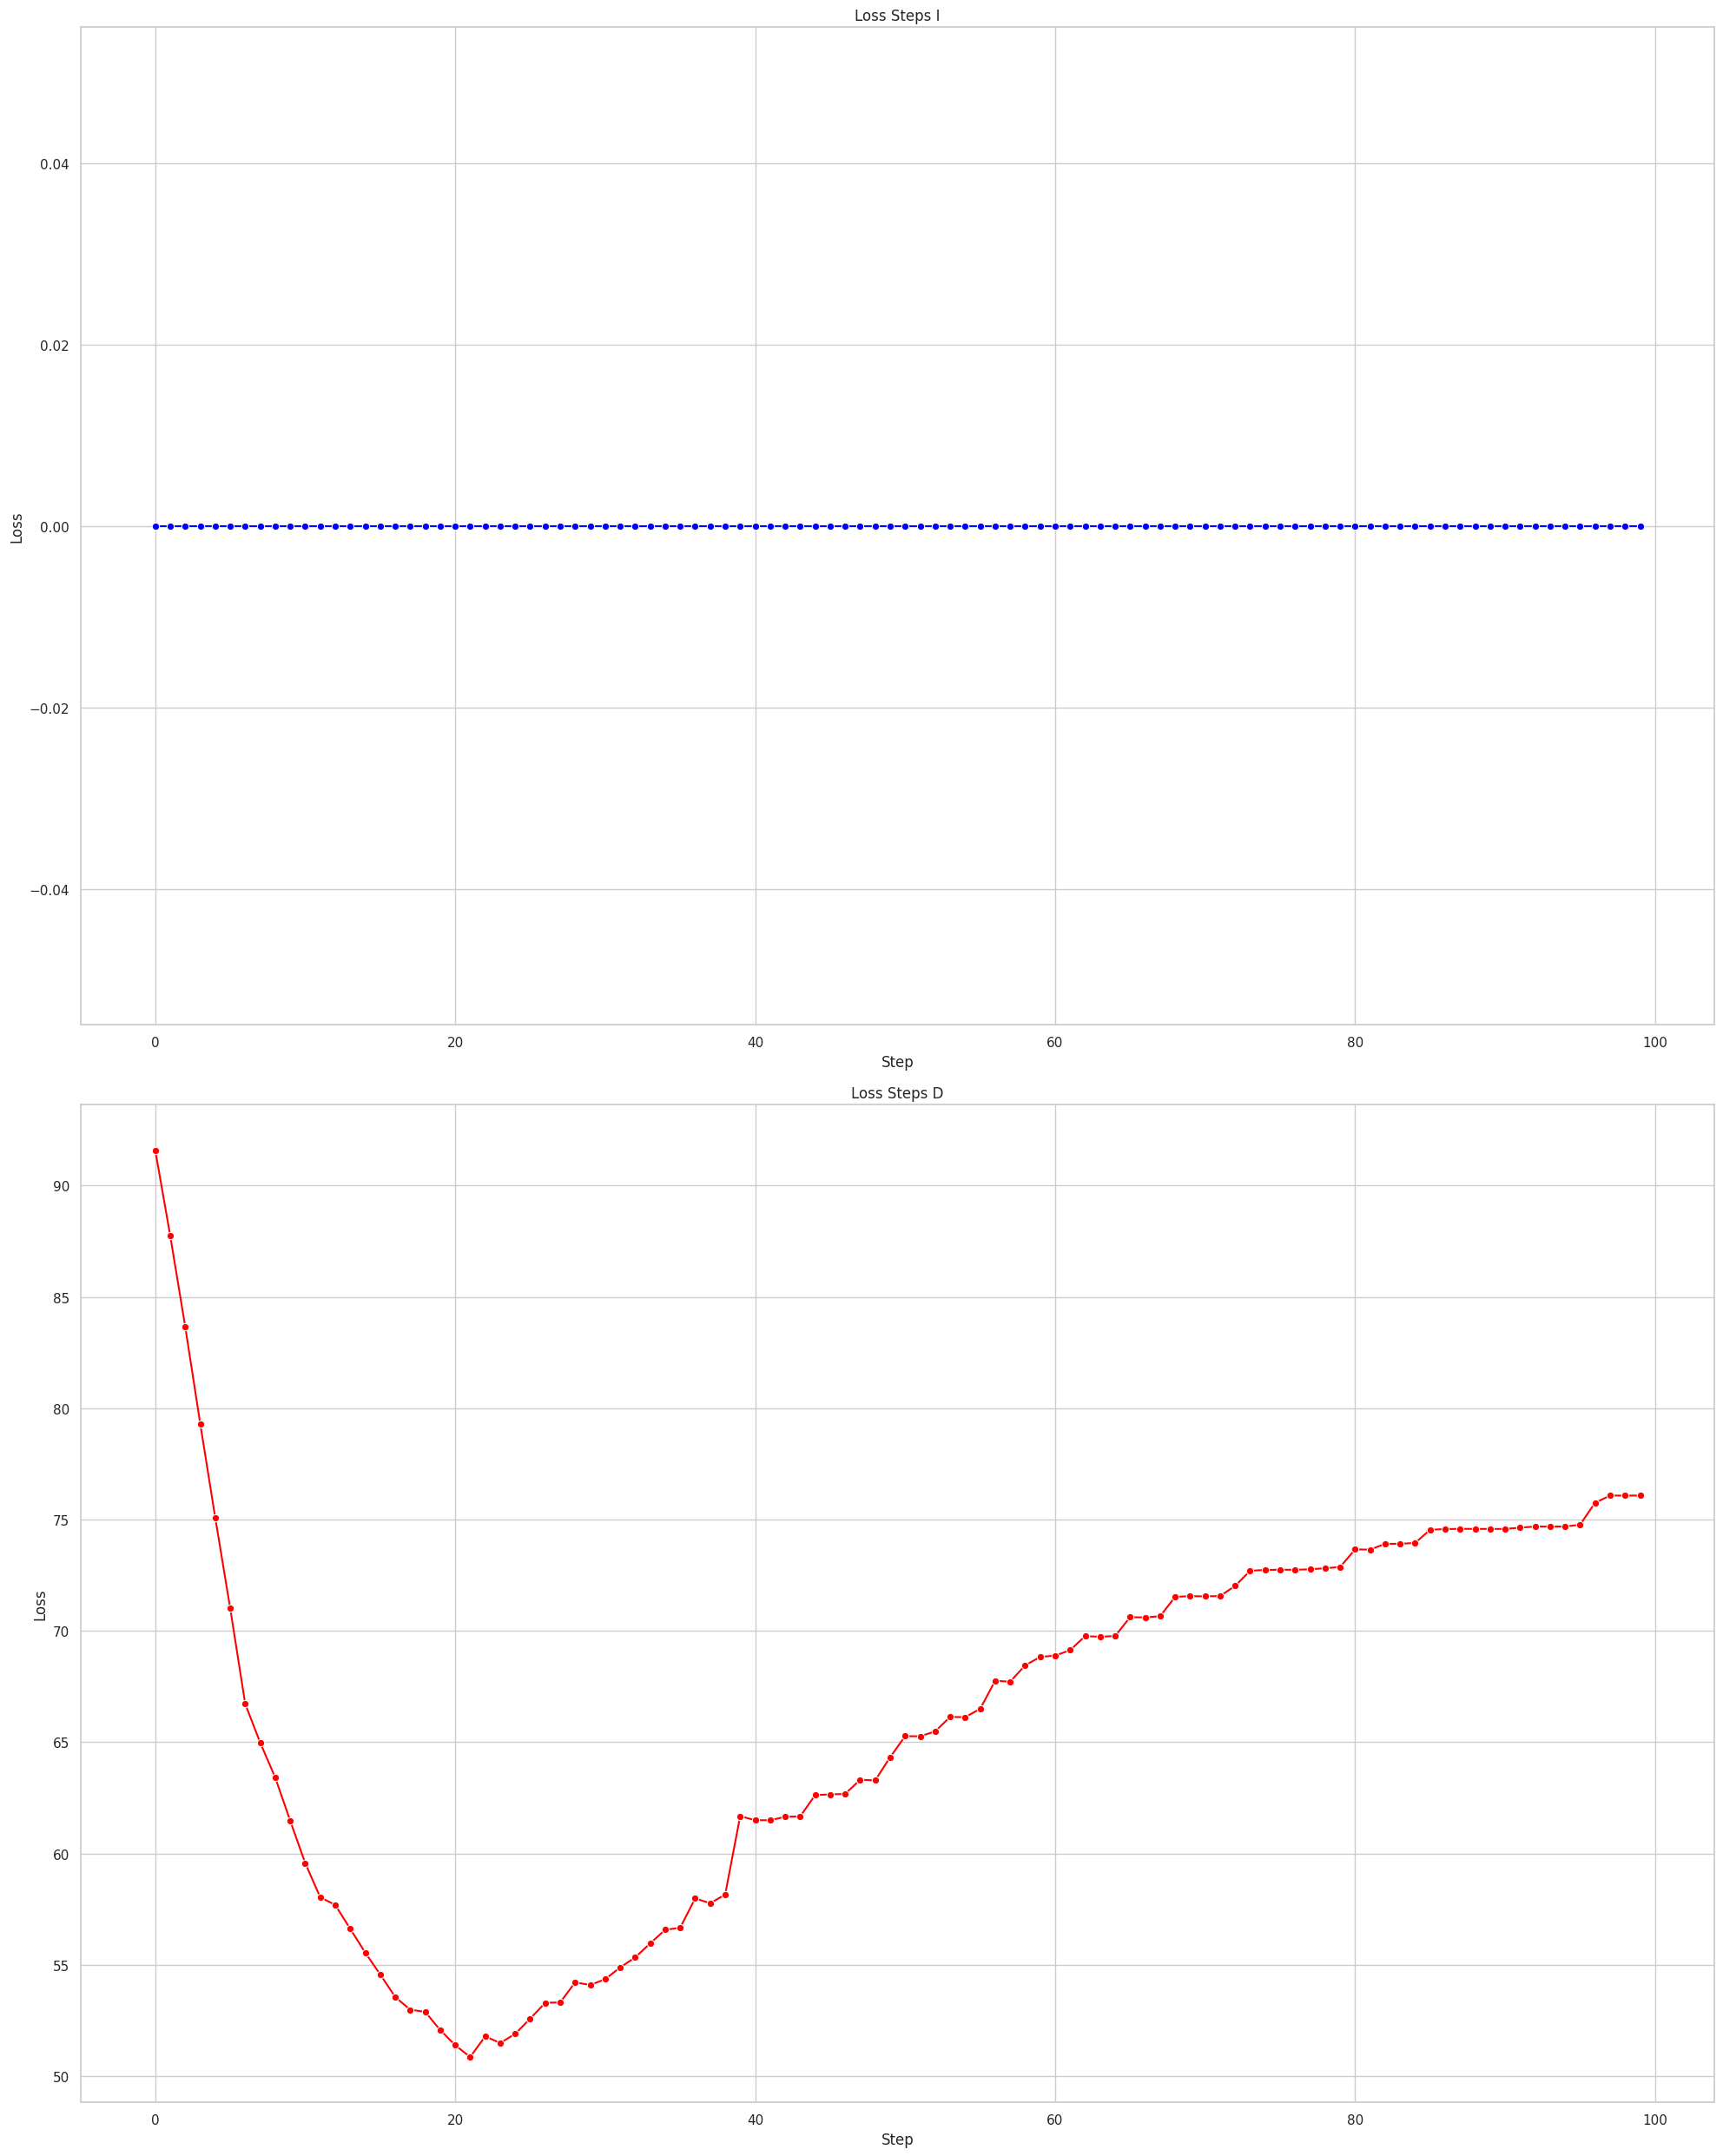

In [ ]:
import torch
import torch.nn as nn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Convert the loss data to DataFrames for seaborn
df_i = pd.DataFrame({
    'Step': range(len(loss_steps_i)),
    'Loss': loss_steps_i
})

df_d = pd.DataFrame({
    'Step': range(len(loss_steps_d)),
    'Loss': loss_steps_d
})

# Plotting
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(20, 25))

# Plot loss_steps_i
sns.lineplot(data=df_i, x='Step', y='Loss', ax=axes[0], marker='o', color='blue')
axes[0].set_title('Loss Steps I')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('Loss')

# Plot loss_steps_d
sns.lineplot(data=df_d, x='Step', y='Loss', ax=axes[1], marker='o', color='red')
axes[1].set_title('Loss Steps D')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()


In [ ]:

x_next,loss_steps_i,loss_steps_d  = pgd(mals[13:14].to(torch.float32).to(device), mals_y[13:14].to(device), model_AT_rFGSM, insertion_array, removal_array, k=1000, step_length=.002, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

PGD linf: Attack effectiveness 0.000%.


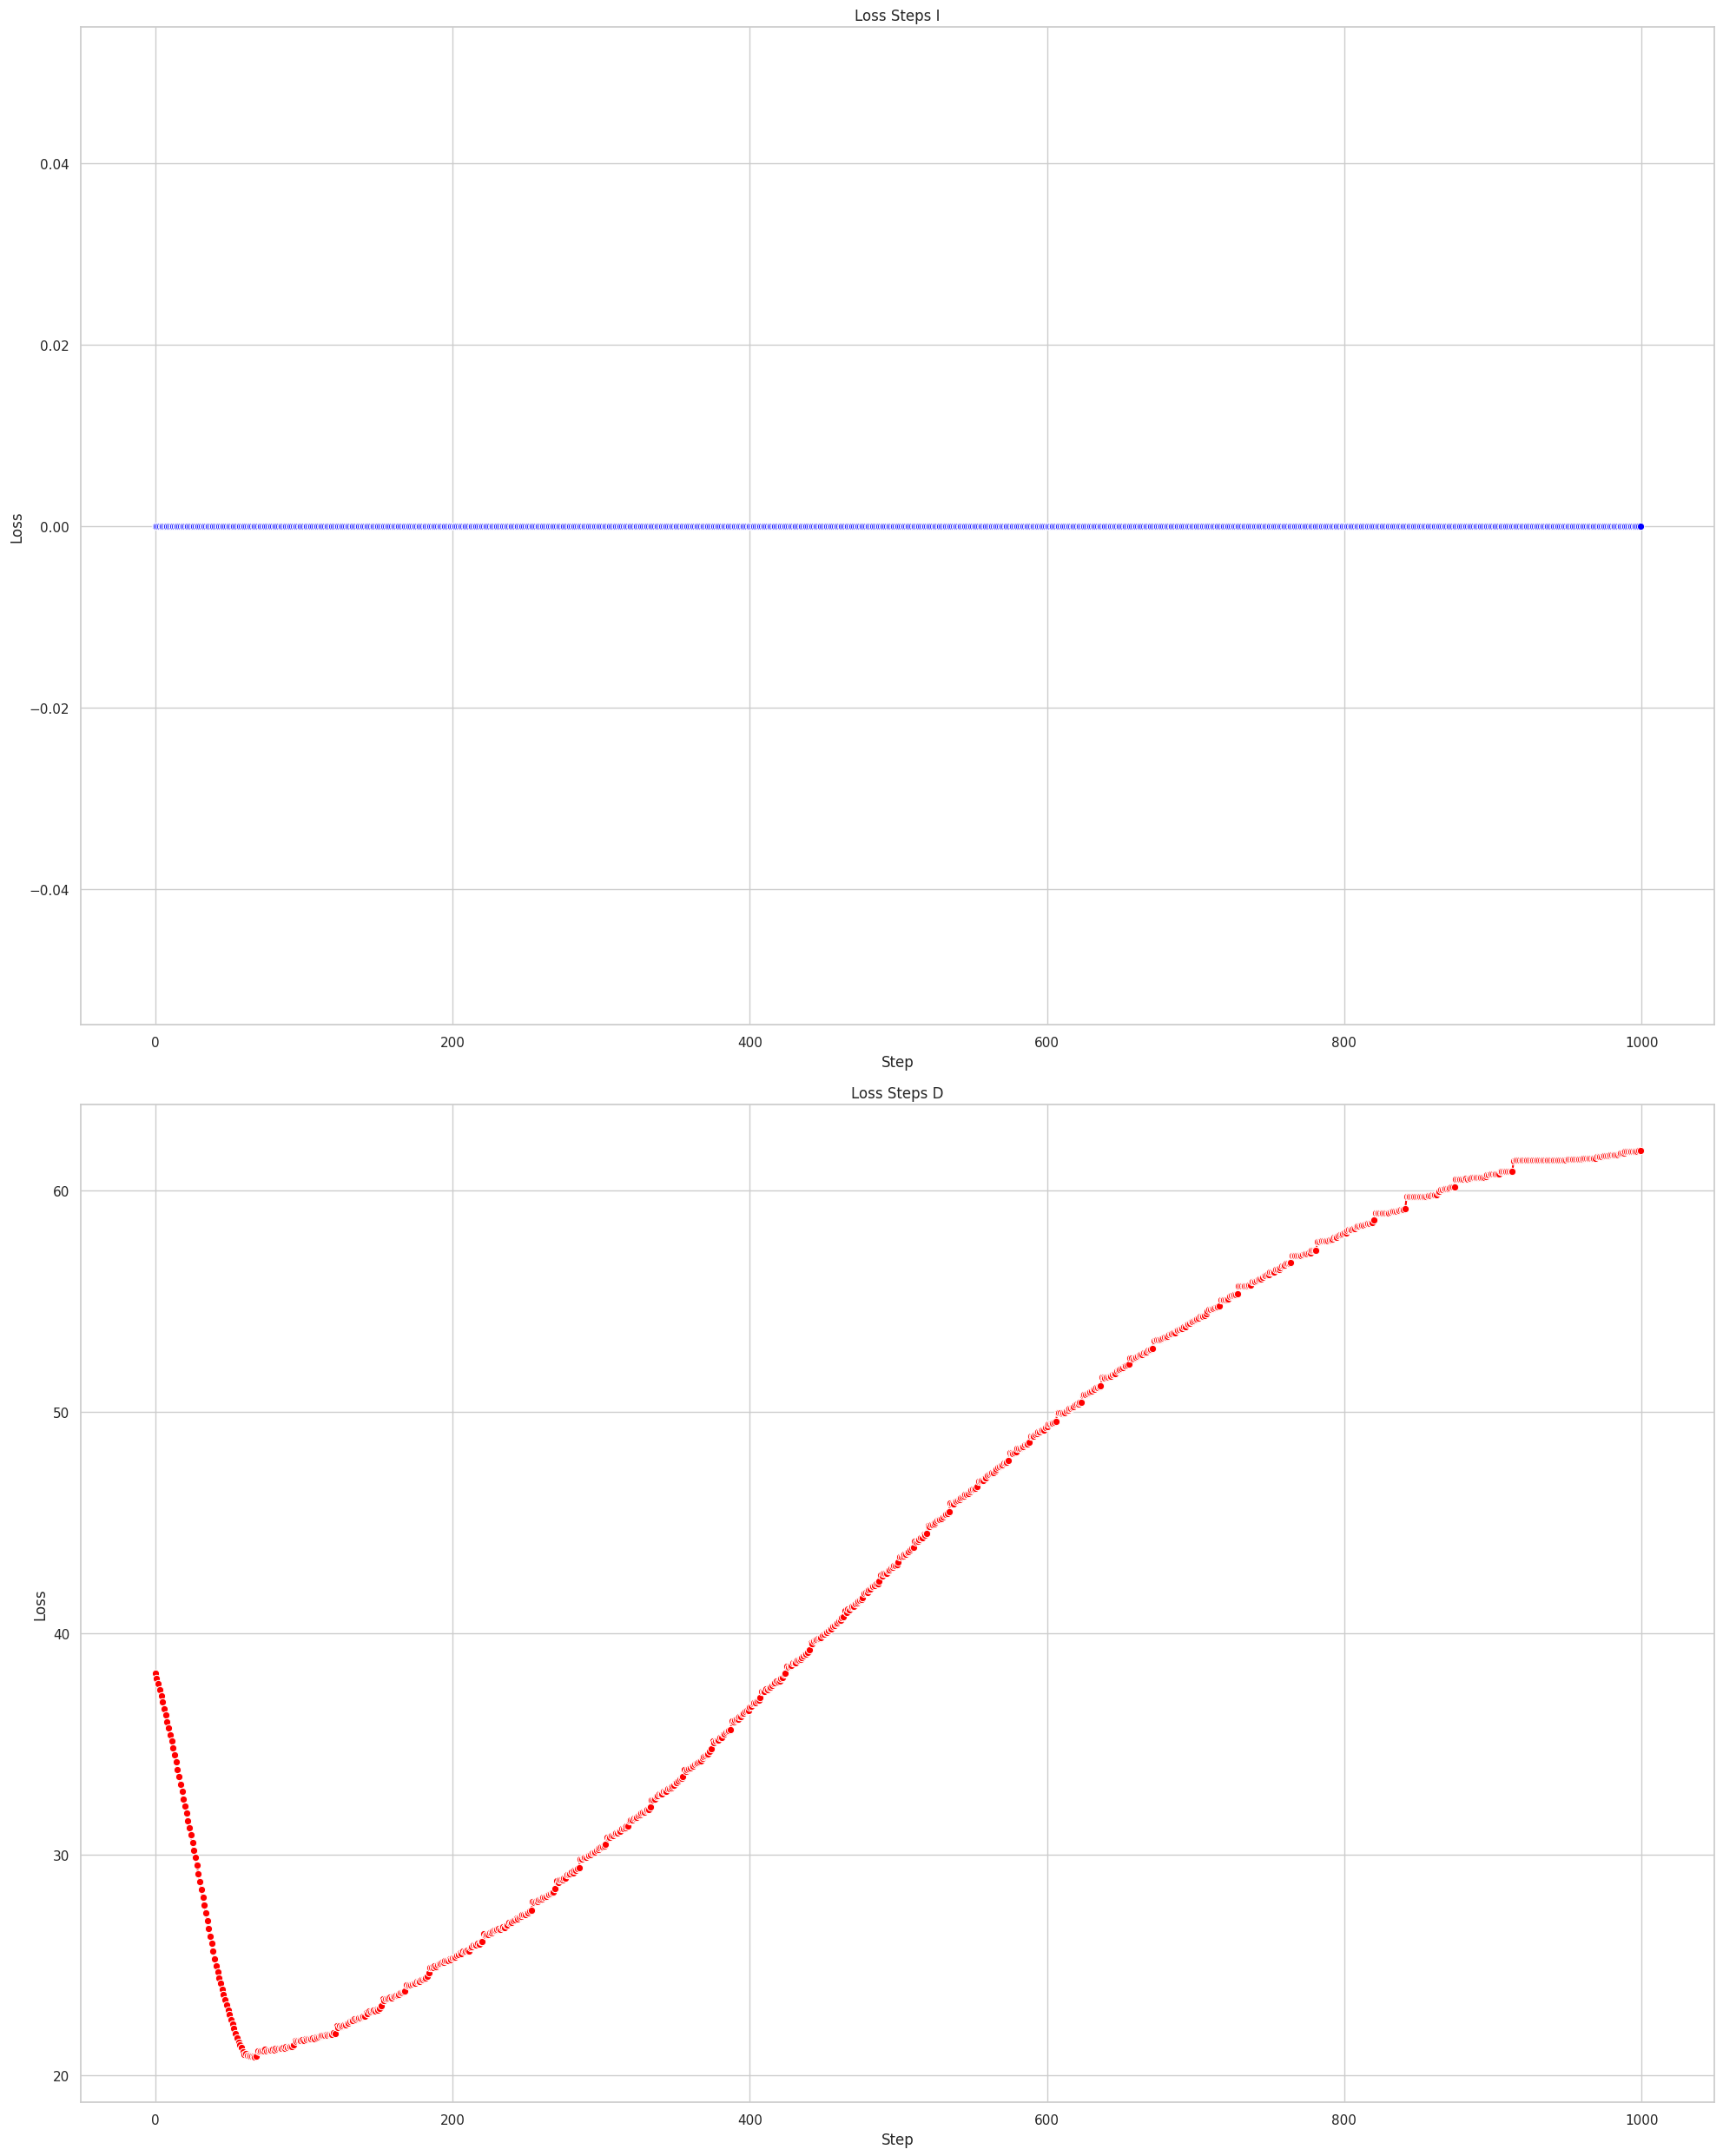

In [ ]:
import torch
import torch.nn as nn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Convert the loss data to DataFrames for seaborn
df_i = pd.DataFrame({
    'Step': range(len(loss_steps_i)),
    'Loss': loss_steps_i
})

df_d = pd.DataFrame({
    'Step': range(len(loss_steps_d)),
    'Loss': loss_steps_d
})

# Plotting
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(20, 25))

# Plot loss_steps_i
sns.lineplot(data=df_i, x='Step', y='Loss', ax=axes[0], marker='o', color='blue')
axes[0].set_title('Loss Steps I')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('Loss')

# Plot loss_steps_d
sns.lineplot(data=df_d, x='Step', y='Loss', ax=axes[1], marker='o', color='red')
axes[1].set_title('Loss Steps D')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()


In [ ]:
def pgd(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Multi-step PGD
    for t in range(k):
        print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, y.view(-1).long())
        #loss = criterion(y_model, y.view(-1).long())
        print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print(loss)

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data
        #print(torch.abs(gradients).sum())

        #pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients
        #print('nonzero(grad4insertion)',torch.count_nonzero(grad4insertion))

        pos_removal = (x_var > 0.5) * 1 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients
        #print('nonzero(grad4removal)',torch.count_nonzero(grad4removal))

        gradients = grad4removal + grad4insertion
        #gradients =  gradients * tensor
        #print(torch.abs(gradients).sum())
        #print('nonzero(gradients)',torch.count_nonzero(gradients))

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / l2norm).float()
            #perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            #perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            #perturbation[torch.isnan(perturbation)] = 0.
            #perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        if t==549:
          a = x_next
        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)


    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return a


In [ ]:

a = pgd(mals[13:14].to(torch.float32).to(device), mals_y[13:14].to(device), model_AT_rFGSM, insertion_array, removal_array, k=1000, step_length=.001, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

***********  0
loss_mal :  tensor([38.1857], grad_fn=<NllLossBackward0>)
***********  1
loss_mal :  tensor([38.0078], grad_fn=<NllLossBackward0>)
***********  2
loss_mal :  tensor([37.8264], grad_fn=<NllLossBackward0>)
***********  3
loss_mal :  tensor([37.6393], grad_fn=<NllLossBackward0>)
***********  4
loss_mal :  tensor([37.4498], grad_fn=<NllLossBackward0>)
***********  5
loss_mal :  tensor([37.2559], grad_fn=<NllLossBackward0>)
***********  6
loss_mal :  tensor([37.0543], grad_fn=<NllLossBackward0>)
***********  7
loss_mal :  tensor([36.8450], grad_fn=<NllLossBackward0>)
***********  8
loss_mal :  tensor([36.6358], grad_fn=<NllLossBackward0>)
***********  9
loss_mal :  tensor([36.4265], grad_fn=<NllLossBackward0>)
***********  10
loss_mal :  tensor([36.2152], grad_fn=<NllLossBackward0>)
***********  11
loss_mal :  tensor([36.0035], grad_fn=<NllLossBackward0>)
***********  12
loss_mal :  tensor([35.7917], grad_fn=<NllLossBackward0>)
***********  13
loss_mal :  tensor([35.5800], gr

In [ ]:
model_AT_rFGSM.eval()
step_length = 0.001
criterion = nn.CrossEntropyLoss(reduction='none')

y = mals_y[13:14].to(torch.float32).to(device)
x_var = a.clone().detach().requires_grad_(True)
y_model = model_AT_rFGSM(x_var)
loss = criterion(y_model, y.view(-1).long())
#loss = criterion(y_model, y.view(-1).long())
loss_mal = criterion(y_model, torch.zeros_like(y.view(-1).long()))
print('loss_mal : ',loss_mal)
#print(loss)

# Compute gradient
grad_vars = torch.autograd.grad(loss.mean(), x_var)
gradients = grad_vars[0].data

pos_insertion = (x_var <= 0.5) * 1
grad4insertion = (gradients >= 0) * pos_insertion * gradients
#print('nonzero(grad4insertion)',torch.count_nonzero(grad4insertion))

pos_removal = (x_var > 0.5) * 1 * removal_array
grad4removal = (gradients < 0) * pos_removal * gradients
#print('nonzero(grad4removal)',torch.count_nonzero(grad4removal))
print('nonzero',(torch.count_nonzero(grad4removal) + torch.count_nonzero(grad4insertion)))
gradients = (grad4removal + grad4insertion)
perturbation = torch.sign(gradients).float()
x_next = torch.clamp(a + perturbation * step_length, min=0., max=1.)
loss_total = criterion(model_AT_rFGSM(x_next),  torch.zeros_like(y.view(-1).long()))
print('diff total ',loss_total-loss_mal )

dif = 0.
for i in range(10000):

  tensor = torch.zeros_like(gradients)
  tensor[0,i:i+1]= 1

  gradients = (grad4removal + grad4insertion) * tensor
  perturbation = torch.sign(gradients).float()
  x_next = torch.clamp(a + perturbation * step_length, min=0., max=1.)

  loss_updated = criterion(model_AT_rFGSM(x_next),  torch.zeros_like(y.view(-1).long()))
  delta = loss_updated - loss_mal
  dif += delta
  if loss_updated > loss_mal:
    print('****** i')
    print('nonzero with tensor',(torch.count_nonzero(grad4removal* tensor) + torch.count_nonzero(grad4insertion* tensor)))


print('sum of each features update loss : ',dif)

loss_mal :  tensor([14.9158], grad_fn=<NllLossBackward0>)
nonzero tensor(230)
diff total  tensor([0.1168], grad_fn=<SubBackward0>)
sum of each features update loss :  tensor([-0.0871], grad_fn=<AddBackward0>)


In [ ]:
def pgd2(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)


    #insertion_array_updated = torch.bitwise_or(insertion_array.to(torch.uint8), x.squeeze().to(torch.uint8) )
    #removal_array_updated = torch.bitwise_or(removal_array.to(torch.uint8), (1 - x.squeeze().to(torch.uint8)) )

    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    loss_steps_i = []
    loss_steps_d = []
    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, y.view(-1).long())
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print('loss : ',criterion(y_model, y.view(-1).long()))

        #loss_steps_i.append(loss.detach().item())
        #loss_steps_d.append(criterion(y_model, torch.zeros_like(y.view(-1).long())).detach().item())

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data

        #pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
            perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            perturbation[torch.isnan(perturbation)] = 0.
            perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next,loss_steps_i,loss_steps_d

In [ ]:
x_next,loss_steps_i,loss_steps_d = pgd2(mals[13:14].to(torch.float32).to(device), mals_y[13:14].to(device), model_AT_rFGSM, insertion_array, removal_array, k=1000, step_length=.002, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

PGD linf: Attack effectiveness 100.000%.


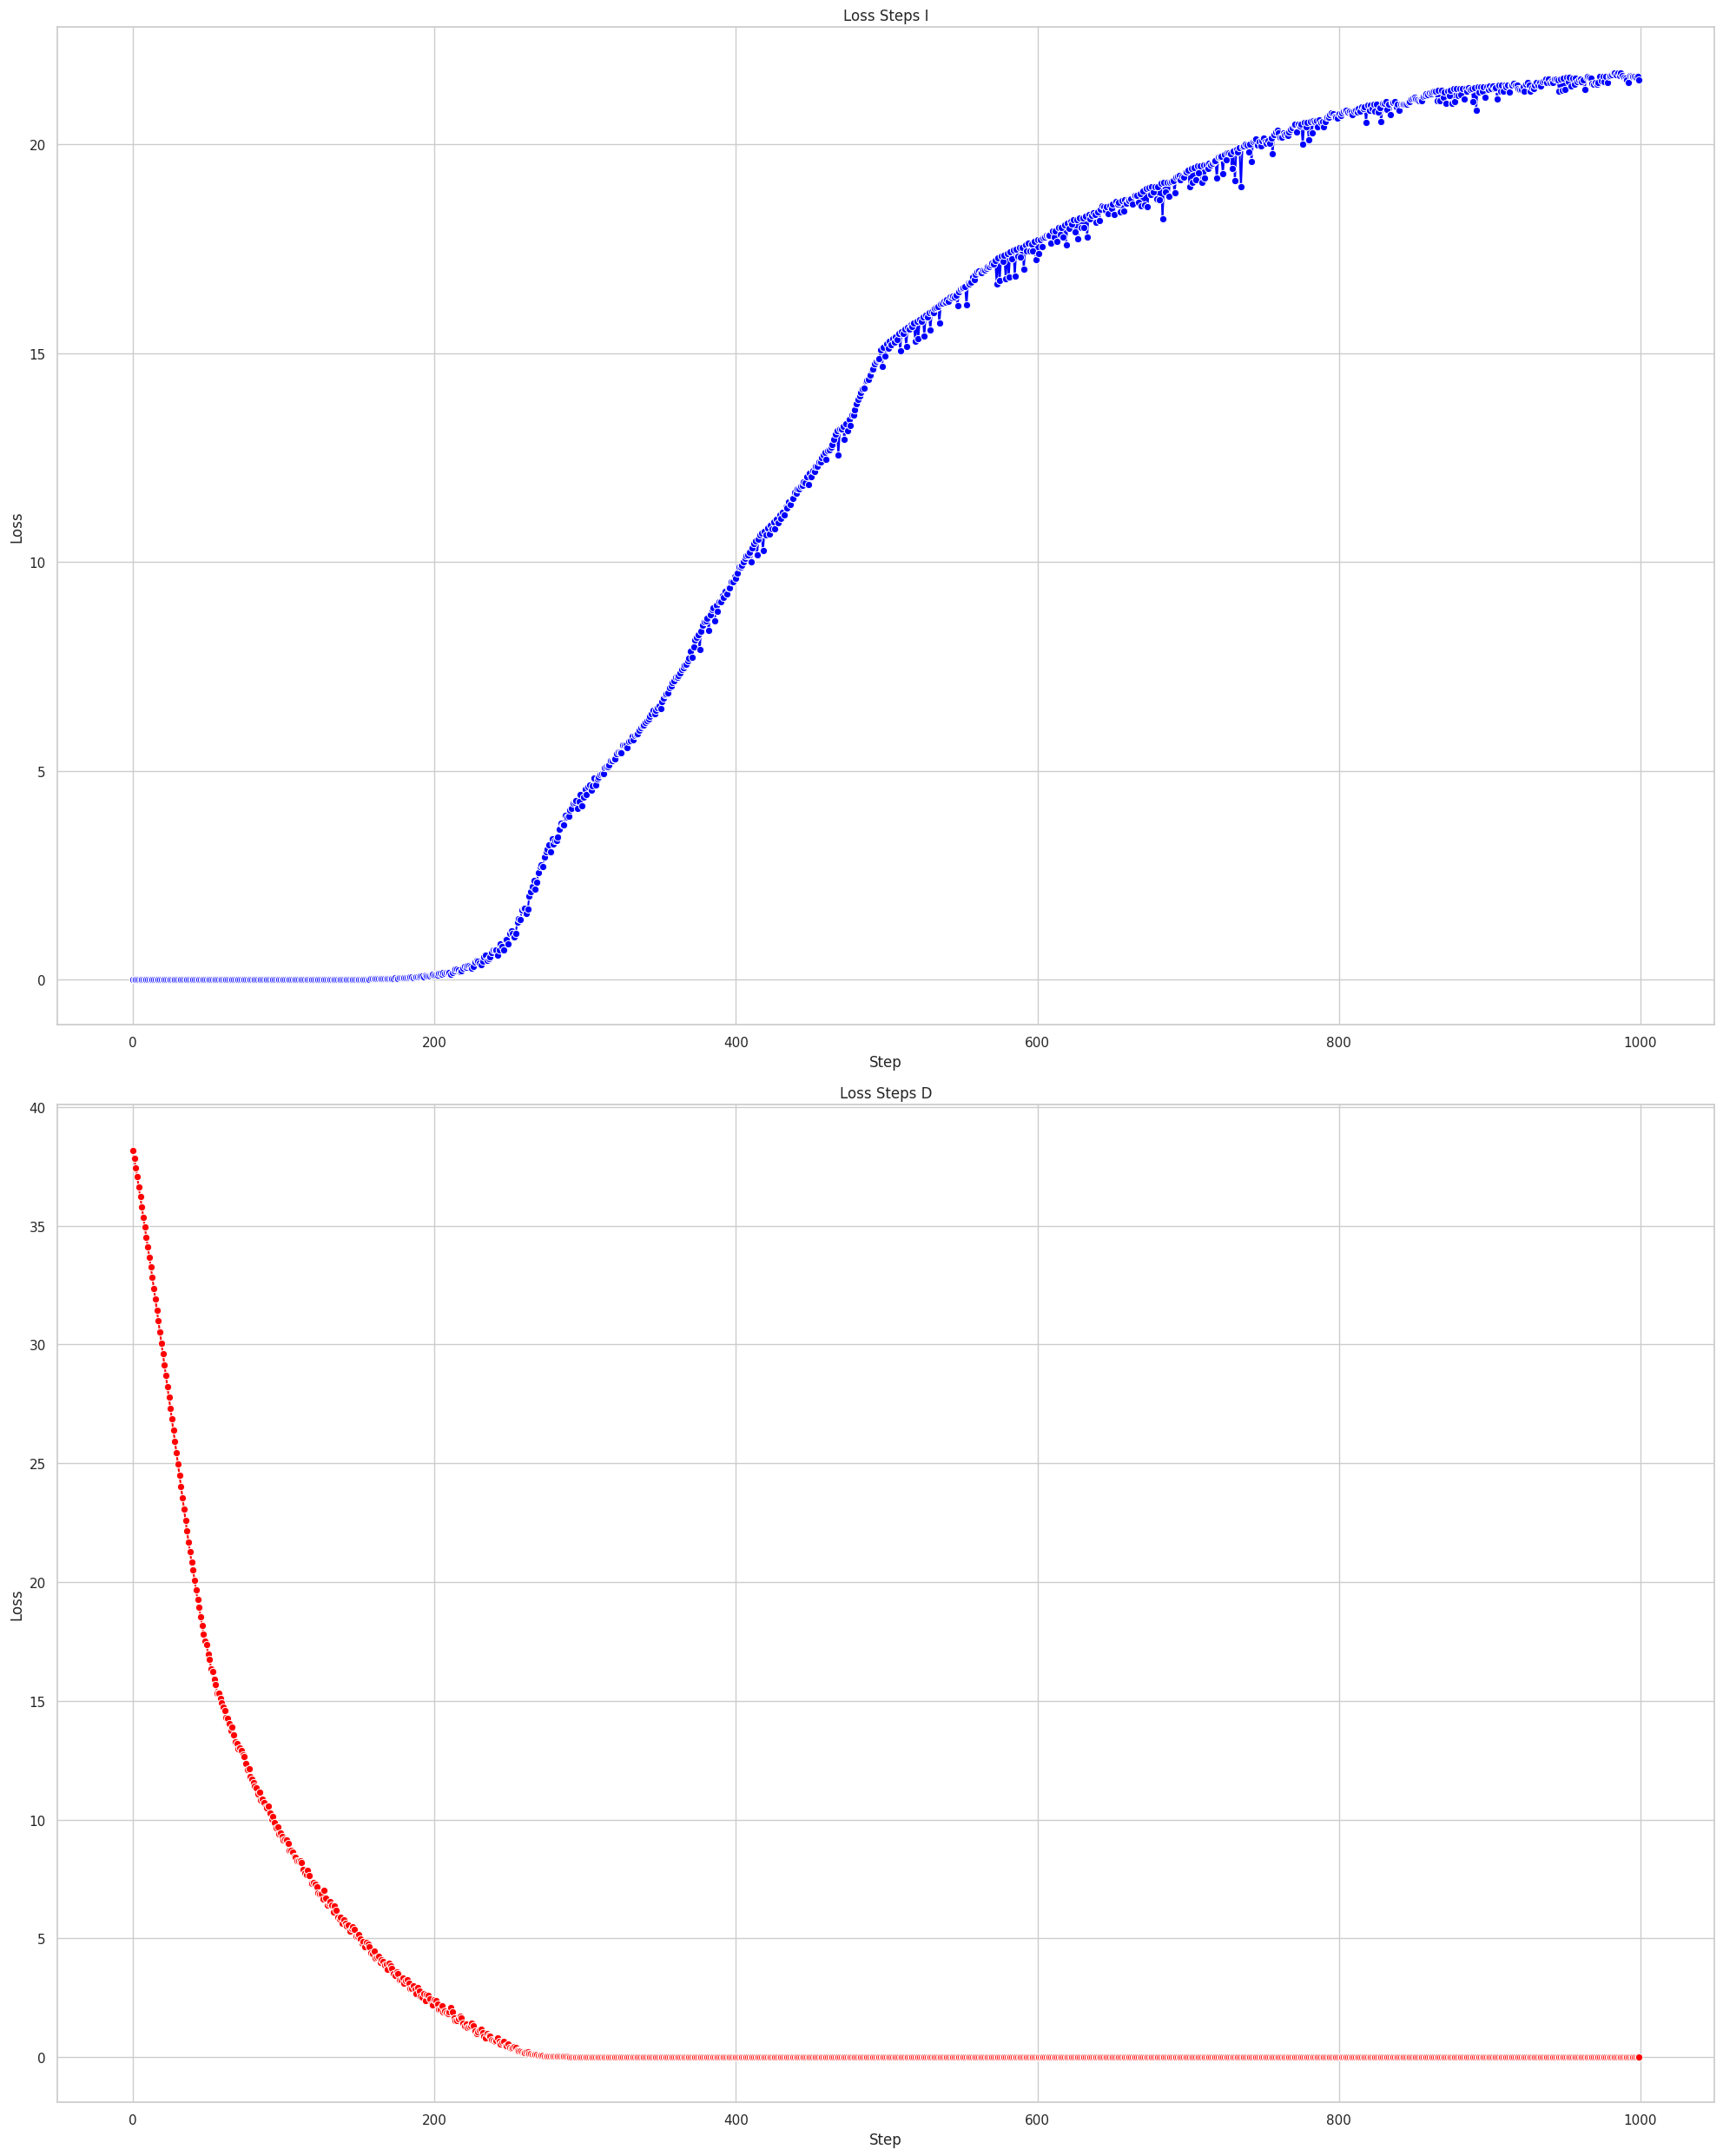

In [ ]:
import torch
import torch.nn as nn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Convert the loss data to DataFrames for seaborn
df_i = pd.DataFrame({
    'Step': range(len(loss_steps_i)),
    'Loss': loss_steps_i
})

df_d = pd.DataFrame({
    'Step': range(len(loss_steps_d)),
    'Loss': loss_steps_d
})

# Plotting
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(20, 25))

# Plot loss_steps_i
sns.lineplot(data=df_i, x='Step', y='Loss', ax=axes[0], marker='o', color='blue')
axes[0].set_title('Loss Steps I')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('Loss')

# Plot loss_steps_d
sns.lineplot(data=df_d, x='Step', y='Loss', ax=axes[1], marker='o', color='red')
axes[1].set_title('Loss Steps D')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()


In [ ]:
def get_done(x, y, model):
    # Get the model's predictions
    outputs = model(x)

    # Use argmax to get the predicted class indices
    predicted = torch.argmax(outputs, dim=1)

    # Ensure y is in the same shape as predicted for comparison
    y = y.view_as(predicted)

    # Determine if the predictions are incorrect
    done = (predicted != y).bool()

    return done


def pgd_min(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack (loss based on goal's class, which we have to minimize the loss).
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), torch.zeros_like(y.view(-1).long()))

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)


    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    loss_steps_i = []
    loss_steps_d = []
    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, torch.zeros_like(y.view(-1).long()))
        #print(loss)
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))

        #loss_steps_i.append(criterion(y_model, y.view(-1).long()).detach().item())
        #loss_steps_d.append(loss.detach().item())



        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        #print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        pos_insertion = (x_var < (0.999)) * 1 * insertion_array_updated
        #pos_insertion = (x_var < 1.) * 1
        grad4insertion = (gradients > 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #print(torch.abs(gradients).sum())

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
            #print(torch.abs(perturbation).sum())
            #print('torch.abs(perturbation).sum(dim=-1) : ',torch.abs(perturbation).sum(dim=-1))

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            #print('l2norm ; ',l2norm)
            perturbation = (gradients / (l2norm + 1e-20)).float()

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        #print(((x_next + perturbation * step_length)- torch.clamp(x_next + perturbation * step_length, min=0., max=1.)).sum())
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

        #print('loss : ',criterion(y_model, y.view(-1).long()))
        #loss_steps_i.append(criterion(y_model, y.view(-1).long()).detach().item())
        #loss_steps_d.append(loss.detach().item())

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), torch.zeros_like(y.view(-1).long())).data

    if is_report_loss_diff:
        done = get_done(x_next, y, model)
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next,loss_steps_i,loss_steps_d

In [ ]:
x_next,loss_steps_i,loss_steps_d = pgd_min(mals[13:14].to(torch.float32).to(device), mals_y[13:14].to(device), model_AT_rFGSM, insertion_array, removal_array, k=1000, step_length=.002, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

PGD linf: Attack effectiveness 100.000%.


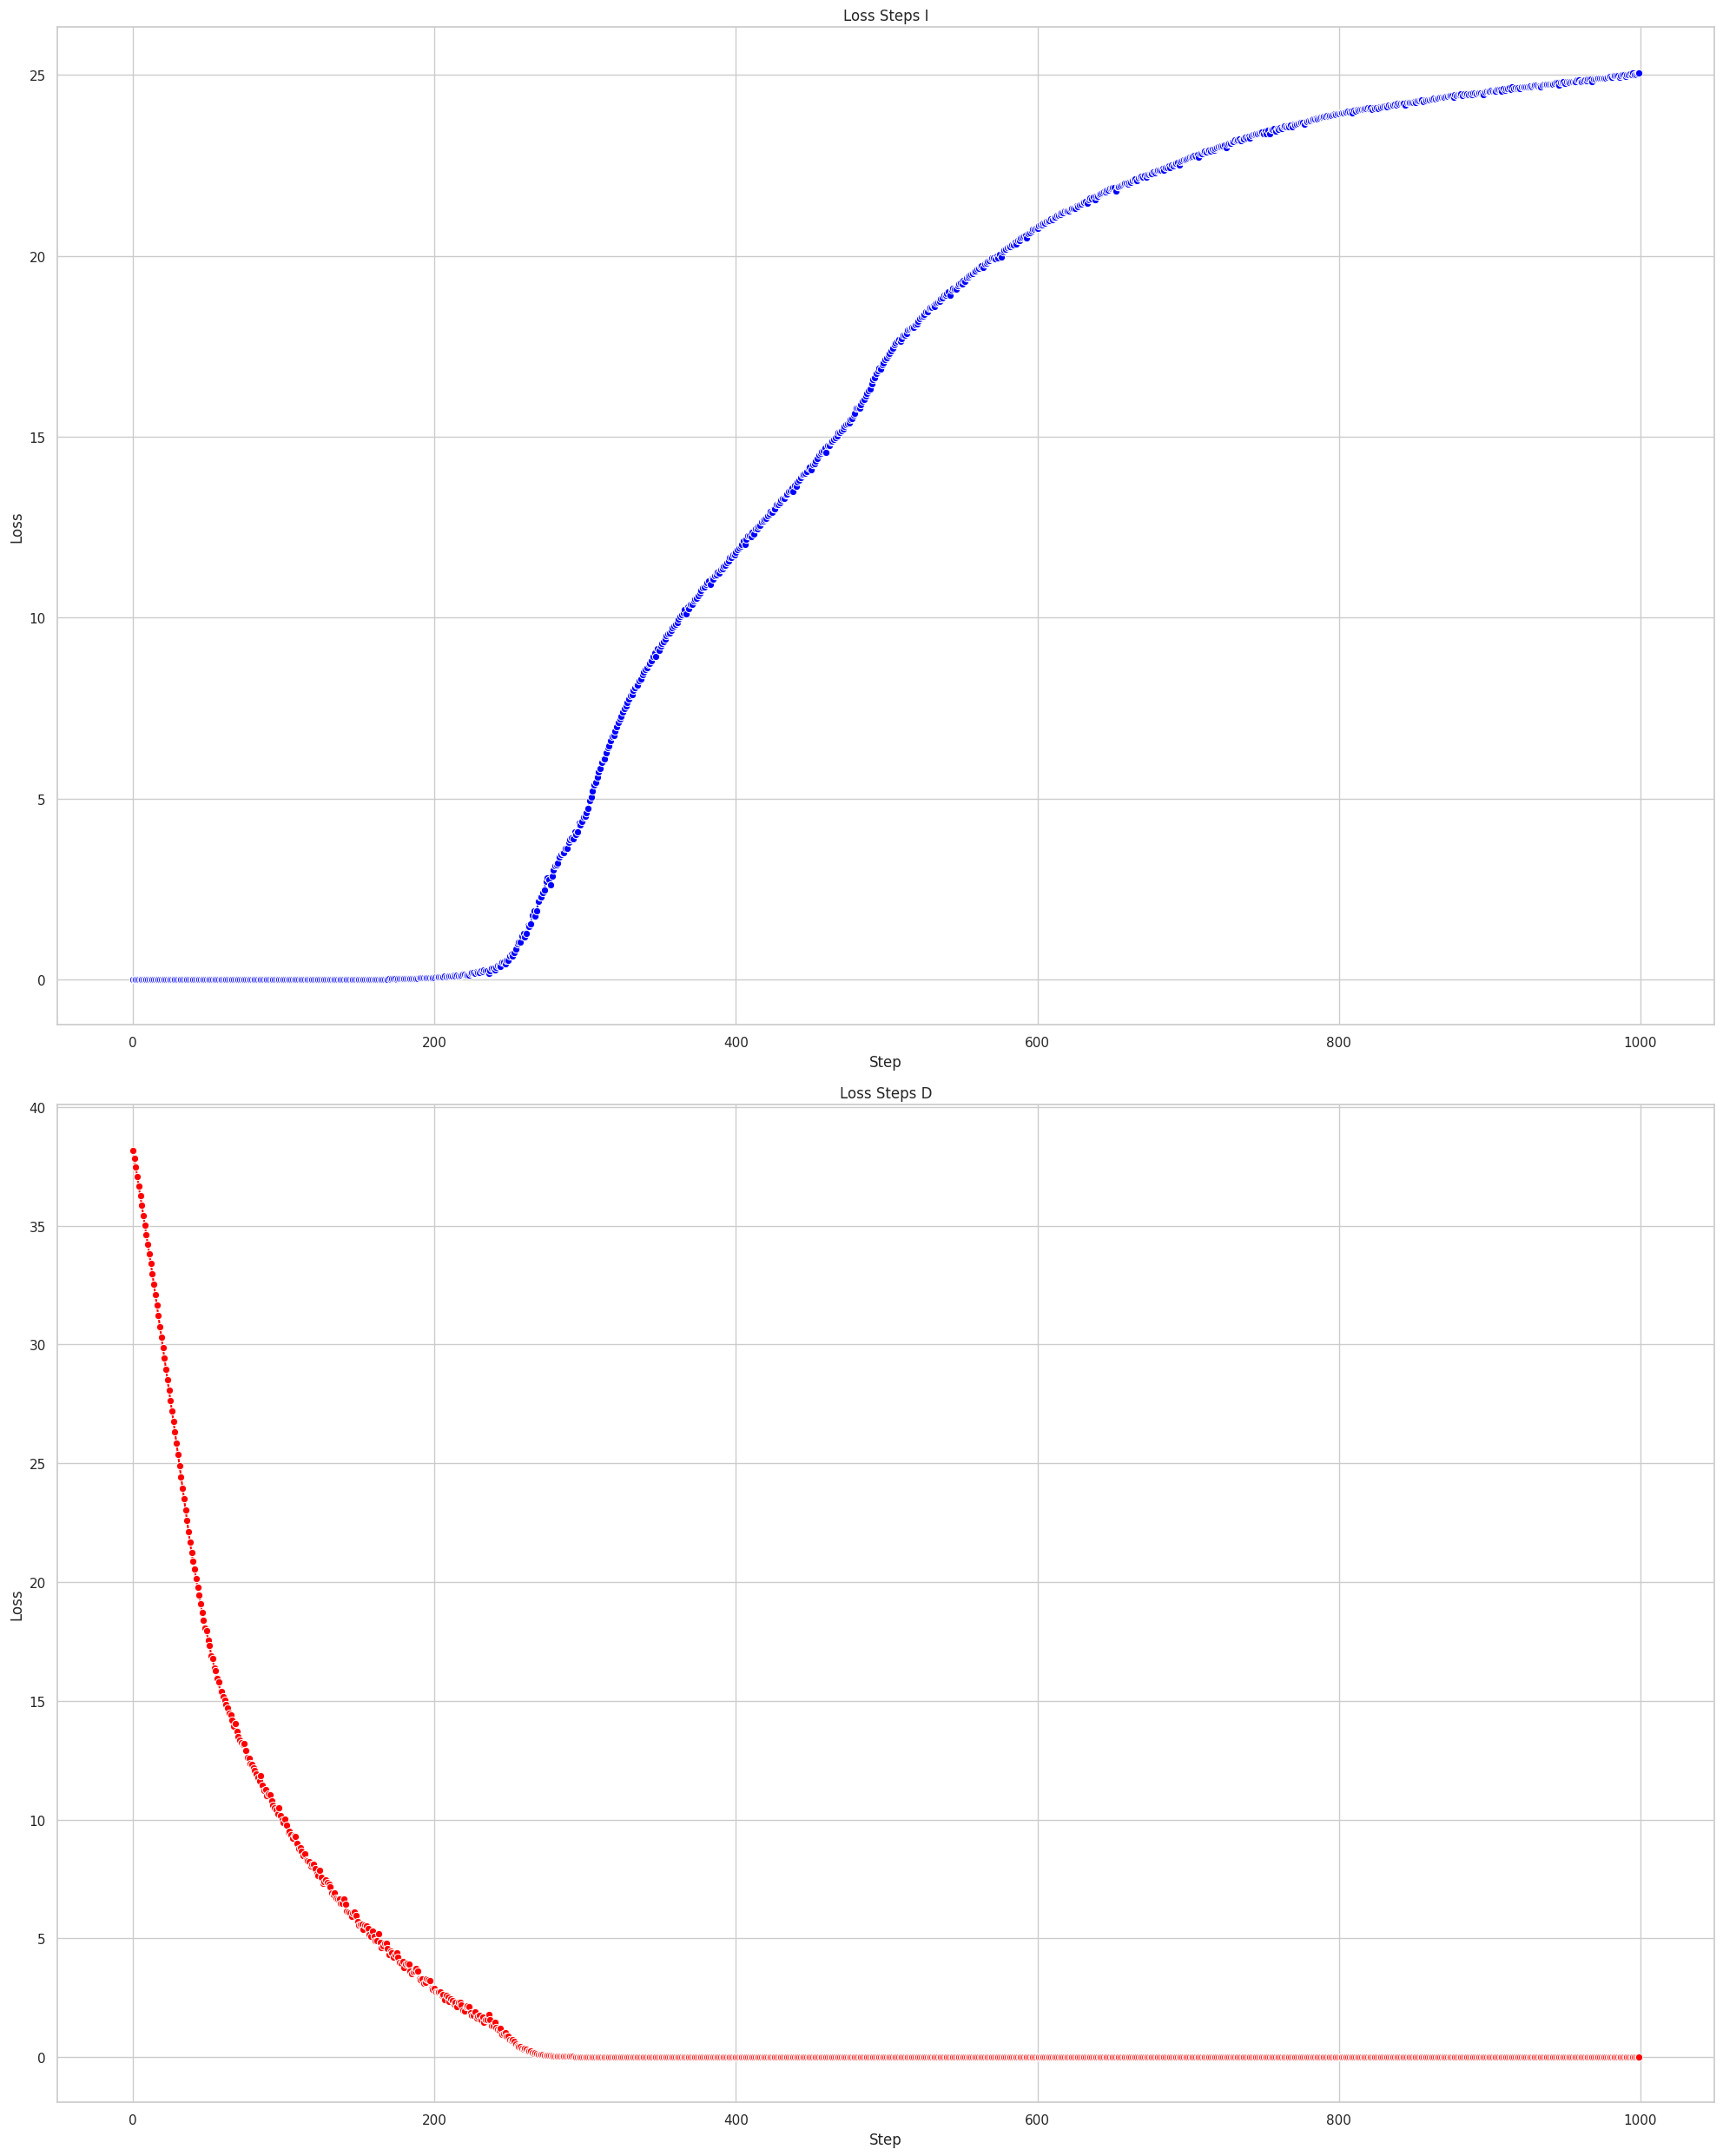

In [ ]:
import torch
import torch.nn as nn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Convert the loss data to DataFrames for seaborn
df_i = pd.DataFrame({
    'Step': range(len(loss_steps_i)),
    'Loss': loss_steps_i
})

df_d = pd.DataFrame({
    'Step': range(len(loss_steps_d)),
    'Loss': loss_steps_d
})

# Plotting
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(20, 25))

# Plot loss_steps_i
sns.lineplot(data=df_i, x='Step', y='Loss', ax=axes[0], marker='o', color='blue')
axes[0].set_title('Loss Steps I')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('Loss')

# Plot loss_steps_d
sns.lineplot(data=df_d, x='Step', y='Loss', ax=axes[1], marker='o', color='red')
axes[1].set_title('Loss Steps D')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()


In [ ]:
def pgd(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Multi-step PGD
    for t in range(k):

        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, y.view(-1).long())

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data


        pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        #pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.5) * 0 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / l2norm).float()
            perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            perturbation[torch.isnan(perturbation)] = 0.
            perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    diff = torch.abs(x_next - x).sum(dim=-1)

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")
        print('mean of differnce featres',torch.mean(diff))

    return x_next, torch.mean(diff)

In [ ]:
x_next,mean_diff = pgd(mals.to(torch.float32).to(device), mals_y.to(device), model_AT_rFGSM, insertion_array, removal_array, k=50, step_length=.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)
mean_diff

PGD linf: Attack effectiveness 6.087%.
mean of differnce featres tensor(66.7391, device='cuda:0')


tensor(66.7391, device='cuda:0')

In [ ]:
def pgd2(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)


    #insertion_array_updated = torch.bitwise_or(insertion_array.to(torch.uint8), x.squeeze().to(torch.uint8) )
    #removal_array_updated = torch.bitwise_or(removal_array.to(torch.uint8), (1 - x.squeeze().to(torch.uint8)) )

    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    # Multi-step PGD
    for t in range(k):
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, y.view(-1).long())

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data

        #pos_insertion = (x_var <= 0.999) * 1
        pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
            perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            perturbation[torch.isnan(perturbation)] = 0.
            perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    diff = torch.abs(x_next - x).sum(dim=-1)

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")
        print('mean of differnce featres',torch.mean(diff))

    return x_next,torch.mean(diff)

In [ ]:
x_next,mean_diff = pgd2(mals.to(torch.float32).to(device), mals_y.to(device), model_AT_rFGSM, insertion_array, removal_array, k=50, step_length=.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)
mean_diff

PGD linf: Attack effectiveness 62.609%.
mean of differnce featres tensor(18.8261, device='cuda:0')


tensor(18.8261, device='cuda:0')

In [ ]:
def get_done(x, y, model):
    # Get the model's predictions
    outputs = model(x)

    # Use argmax to get the predicted class indices
    predicted = torch.argmax(outputs, dim=1)

    # Ensure y is in the same shape as predicted for comparison
    y = y.view_as(predicted)

    # Determine if the predictions are incorrect
    done = (predicted != y).bool()

    return done


def pgd_min(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack (loss based on goal's class, which we have to minimize the loss).
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), torch.zeros_like(y.view(-1).long()))

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)


    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    loss_steps_i = []
    loss_steps_d = []
    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, torch.zeros_like(y.view(-1).long()))
        #print(loss)
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))

        #loss_steps_i.append(criterion(y_model, y.view(-1).long()).detach().item())
        #loss_steps_d.append(loss.detach().item())



        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        #print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        pos_insertion = (x_var < (0.999)) * 1 * insertion_array_updated
        #pos_insertion = (x_var < 1.) * 1
        grad4insertion = (gradients > 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #print(torch.abs(gradients).sum())

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
            #print(torch.abs(perturbation).sum())
            #print('torch.abs(perturbation).sum(dim=-1) : ',torch.abs(perturbation).sum(dim=-1))

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            #print('l2norm ; ',l2norm)
            perturbation = (gradients / (l2norm + 1e-20)).float()

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        #print(((x_next + perturbation * step_length)- torch.clamp(x_next + perturbation * step_length, min=0., max=1.)).sum())
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

        #print('loss : ',criterion(y_model, y.view(-1).long()))
        #loss_steps_i.append(criterion(y_model, y.view(-1).long()).detach().item())
        #loss_steps_d.append(loss.detach().item())

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), torch.zeros_like(y.view(-1).long())).data

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    diff = torch.abs(x_next - x).sum(dim=-1)

    if is_report_loss_diff:
        done = get_done(x_next, y, model)
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")
        print('mean of differnce featres',torch.mean(diff))

    return x_next,torch.mean(diff)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def get_done(x, y, model):
    outputs = model(x)
    predicted = torch.argmax(outputs, dim=1)
    y = y.view_as(predicted)
    done = (predicted != y).bool()
    return done


def pgd_min_adam(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    model.eval()

    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), torch.zeros_like(y.view(-1).long()))

    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    # Adam optimizer variables
    m = torch.zeros_like(x)
    v = torch.zeros_like(x)
    beta1 = 0.9
    beta2 = 0.999
    epsilon_adam = 1e-15
    t = 0

    for t in range(k):
        #print('**********',t)
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, torch.zeros_like(y.view(-1).long()))

        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)

        pos_insertion = (x_var < (0.999)) * 1 * insertion_array_updated
        grad4insertion = (gradients > 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #print(torch.abs(gradients).sum())
        # Adam update
        t += 1
        m = beta1 * m + (1 - beta1) * gradients
        v = beta2 * v + (1 - beta2) * (gradients ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        gradients = m_hat / (torch.sqrt(v_hat) + epsilon_adam)
        #print(torch.abs(gradients).sum())

        # Apply norm constraints to the updated gradients
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
            print(l2norm)
        elif norm == 'l1':
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.
        elif norm == 'free':
            perturbation = gradients
        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    loss_adv = criterion(model(x_next), torch.zeros_like(y.view(-1).long())).data
    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    diff = torch.abs(x_next - x).sum(dim=-1)

    if is_report_loss_diff:
        done = get_done(x_next, y, model)
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")
        print('mean of difference features', torch.mean(diff))

    return x_next,torch.mean(diff)


In [ ]:
x_next,mean_diff = pgd_min(mals.to(torch.float32).to(device), mals_y.to(device), model_AT_rFGSM, insertion_array, removal_array, k=50, step_length=.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

PGD linf: Attack effectiveness 58.261%.
mean of differnce featres tensor(25.7130, device='cuda:0')


In [ ]:
x_next,mean_diff = pgd_min(mals.to(torch.float32).to(device), mals_y.to(device), model_DNN_drebin_best, insertion_array, removal_array, k=26, step_length=.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

PGD linf: Attack effectiveness 100.000%.
mean of differnce featres tensor(1716.7478, device='cuda:0')


In [ ]:
x_next,mean_diff = pgd(mals.to(torch.float32).to(device), mals_y.to(device), model_AT_rFGSM_weightedLoss, insertion_array, removal_array, k=50, step_length=.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

PGD linf: Attack effectiveness 100.000%.
mean of differnce featres tensor(5030.3564, device='cuda:0')


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


def adv_predict(test_loader, model, attack, device, **kwargs):
    model.eval()
    n_samples = 0
    cor_test = 0
    cor_ad_test = 0
    all_diff = 0.
    with torch.no_grad():
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(torch.float32).to(device), y_test.to(device)
            mal_x_batch, mal_y_batch = x_test[y_test.squeeze() == 1], y_test[y_test.squeeze() == 1]
            n_samples += len(mal_y_batch)

            outputs = model(mal_x_batch)
            predicted = outputs.argmax(1)
            cor_test += (predicted == 1).sum().item()

            with torch.enable_grad():
                pertb_mal_x, diff = attack(mal_x_batch, mal_y_batch, model, insertion_array, removal_array, is_report_loss_diff=False, **kwargs)

            outputs = model(pertb_mal_x)
            y_pred = outputs.argmax(1)
            cor_ad_test += (y_pred == 1).sum().item()
            all_diff += (diff * len(mal_y_batch))

    # Calculate success rate as 1 - (correct predictions under attack / total samples)
    attack_success_rate = 1 - (cor_ad_test / n_samples)
    mean_diff = (all_diff/ n_samples)
    return attack_success_rate, mean_diff

def run_pgd_attack(model, attack, test_loader, device, iterations_list, step_size=0.02):
    attack_success_rates = []
    mean_diffs = []
    for k in iterations_list:
        #print(f"Running PGD with {k} iterations...")
        success_rate, mean_diff = adv_predict(test_loader, model, attack, device, k=k, step_length=step_size, norm='linf')
        attack_success_rates.append(success_rate)
        mean_diffs.append(mean_diff.item())

    return attack_success_rates, mean_diffs


def plot_attack_statistics(iterations, success_rates, updated_features):
    """
    Plots the attack success rate and mean number of updated features based on the number of iterations.

    Parameters:
    - iterations: List of iteration counts.
    - success_rates: List of success rates.
    - updated_features: List of mean number of updated features.
    """
    # Create DataFrames for each plot
    data_success_rate = pd.DataFrame({
        'Iterations': iterations,
        'Success Rate': success_rates
    })

    data_updated_features = pd.DataFrame({
        'Iterations': iterations,
        'Updated Features': updated_features
    })

    # Plot using seaborn
    fig, ax1 = plt.subplots(figsize=(14, 6))

    sns.lineplot(data=data_success_rate, x='Iterations', y='Success Rate', marker='o', ax=ax1, label='Success Rate')
    ax1.set_title('PGD Attack Statistics vs. Number of Iterations')
    ax1.set_xlabel('Number of Iterations')
    ax1.set_ylabel('Success Rate')
    ax1.grid(True)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    sns.lineplot(data=data_updated_features, x='Iterations', y='Updated Features', marker='o', color='orange', ax=ax2, label='Updated Features')
    ax2.set_ylabel('Mean Number of Updated Features')
    ax2.legend(loc='upper right')

    plt.show()

In [ ]:
# Assuming you have model, test_loader, and device defined
iterations_list = list(range(30, 300, 10))  # Specific iteration counts from 50 to 100 with a step of 5
step_size = 0.02  # Step size for PGD

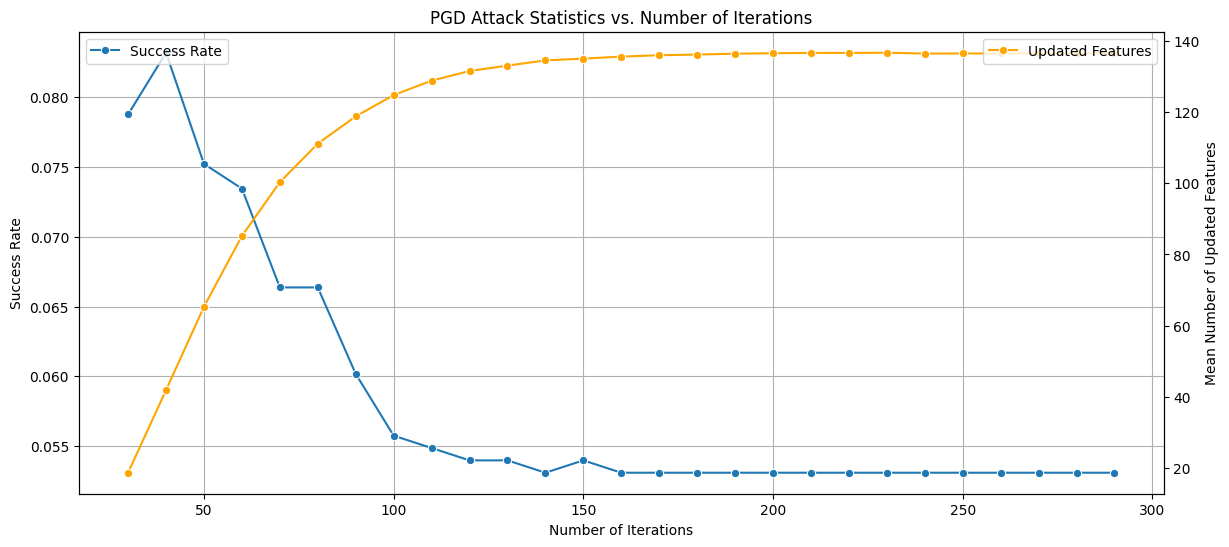

In [ ]:
# Run PGD attack and plot the success rates
attack_success_rates, mean_diffs = run_pgd_attack(model_AT_rFGSM, pgd, test_loader, device, iterations_list, step_size=step_size)
plot_attack_statistics(iterations_list, attack_success_rates, mean_diffs)

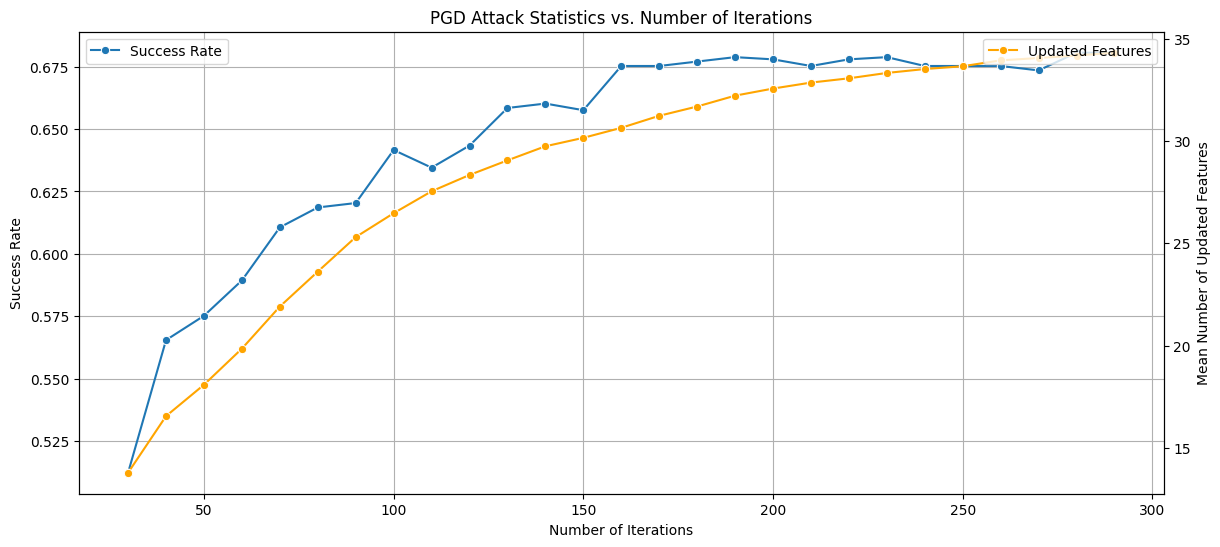

In [ ]:
# Run PGD attack and plot the success rates
attack_success_rates, mean_diffs = run_pgd_attack(model_AT_rFGSM, pgd2, test_loader, device, iterations_list, step_size=step_size)
plot_attack_statistics(iterations_list, attack_success_rates, mean_diffs)

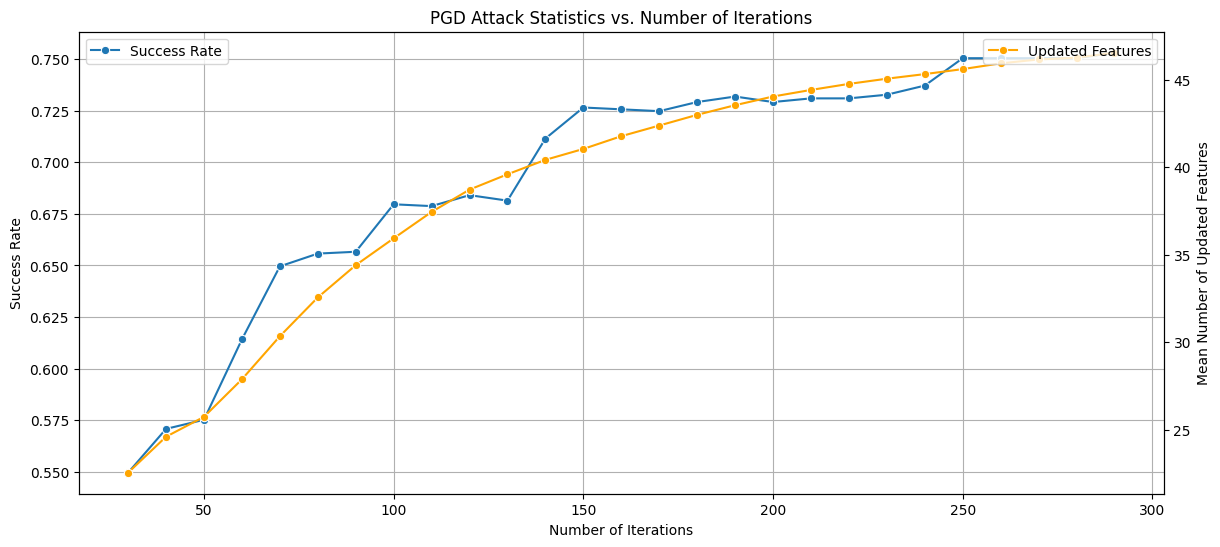

In [ ]:
# Run PGD attack and plot the success rates
attack_success_rates, mean_diffs = run_pgd_attack(model_AT_rFGSM, pgd_min, test_loader, device, iterations_list, step_size=step_size)
plot_attack_statistics(iterations_list, attack_success_rates, mean_diffs)

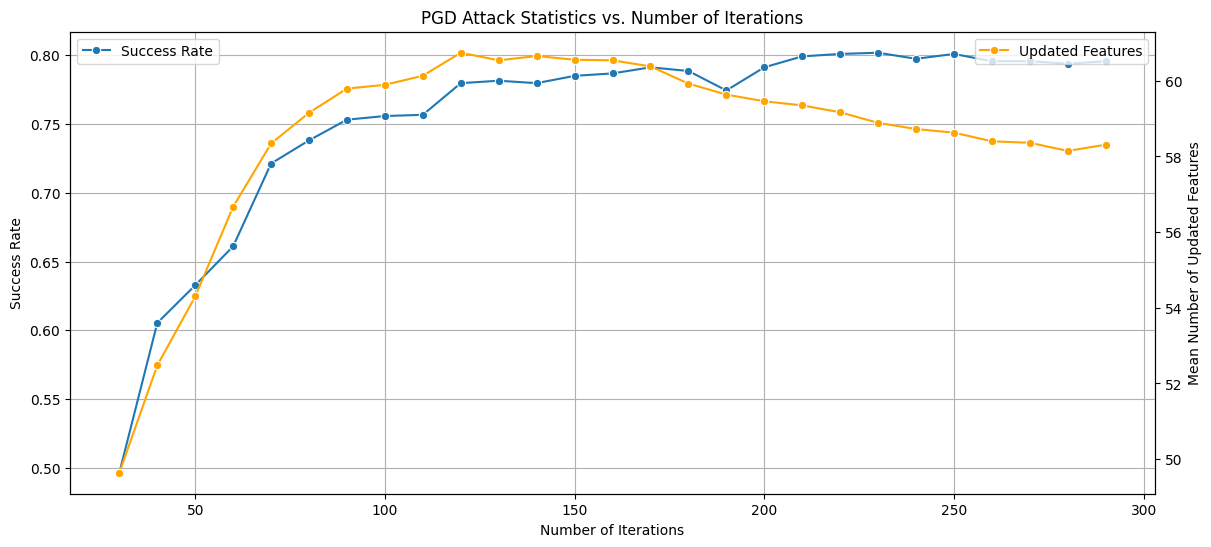

In [ ]:
# Run PGD attack and plot the success rates
attack_success_rates, mean_diffs = run_pgd_attack(model_AT_rFGSM, pgd_min_adam, test_loader, device, iterations_list, step_size=step_size)
plot_attack_statistics(iterations_list, attack_success_rates, mean_diffs)

In [ ]:
# Assuming you have model, test_loader, and device defined
iterations_list = list(range(30, 310, 10))  # Specific iteration counts from 50 to 100 with a step of 5
step_size = 0.02  # Step size for PGD

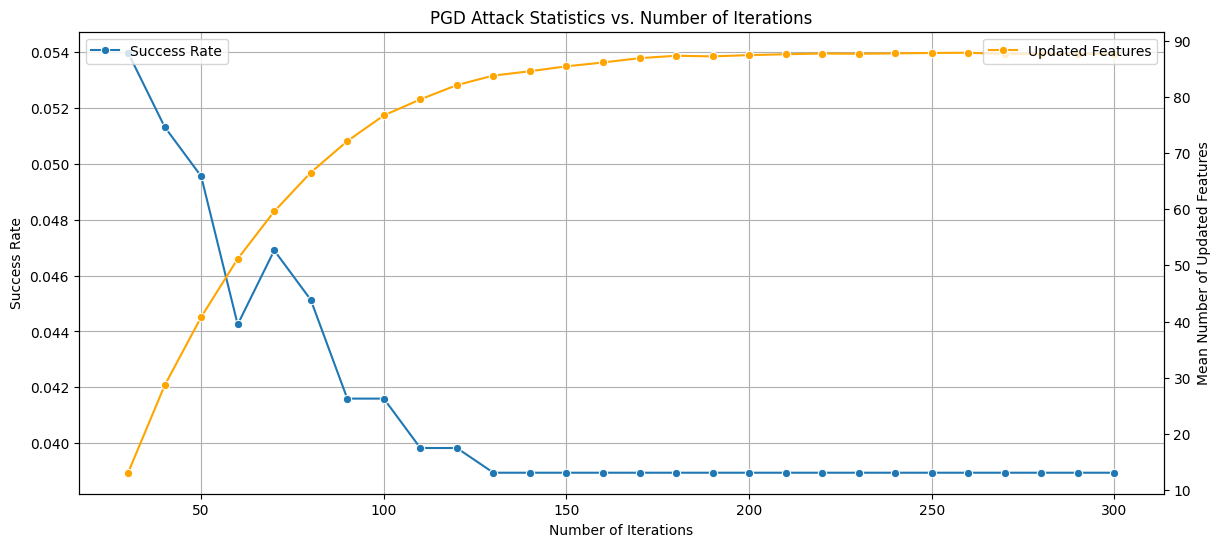

In [ ]:
# Run PGD attack and plot the success rates
attack_success_rates, mean_diffs = run_pgd_attack(model_AT_rFGSM_weightedLoss, pgd, test_loader, device, iterations_list, step_size=step_size)
plot_attack_statistics(iterations_list, attack_success_rates, mean_diffs)

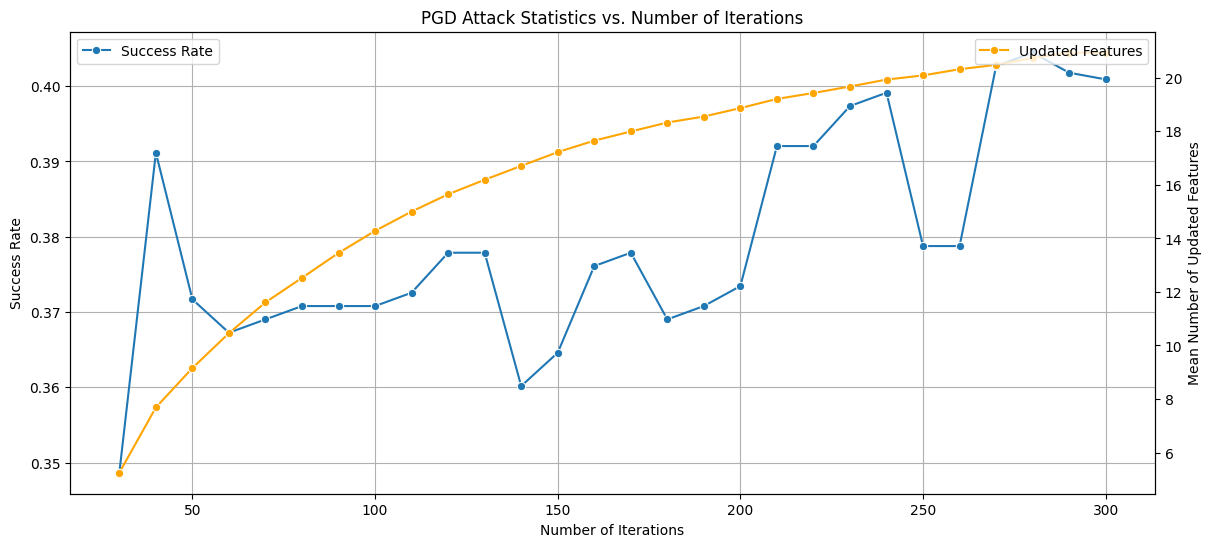

In [ ]:
# Run PGD attack and plot the success rates
attack_success_rates, mean_diffs = run_pgd_attack(model_AT_rFGSM_weightedLoss, pgd2, test_loader, device, iterations_list, step_size=step_size)
plot_attack_statistics(iterations_list, attack_success_rates, mean_diffs)

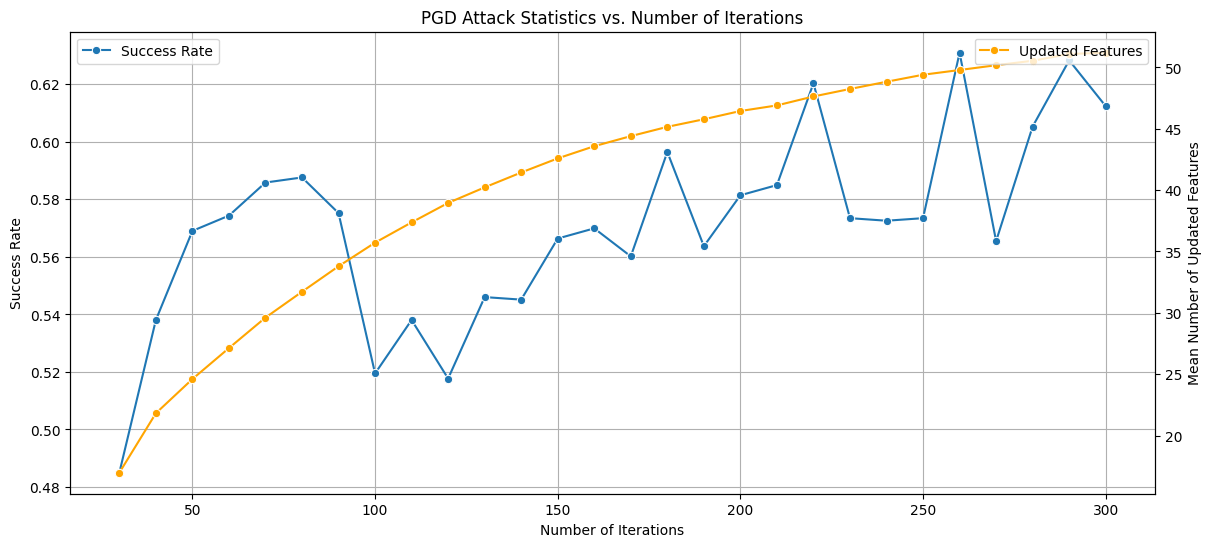

In [ ]:
# Run PGD attack and plot the success rates
attack_success_rates, mean_diffs = run_pgd_attack(model_AT_rFGSM_weightedLoss, pgd_min, test_loader, device, iterations_list, step_size=step_size)
plot_attack_statistics(iterations_list, attack_success_rates, mean_diffs)

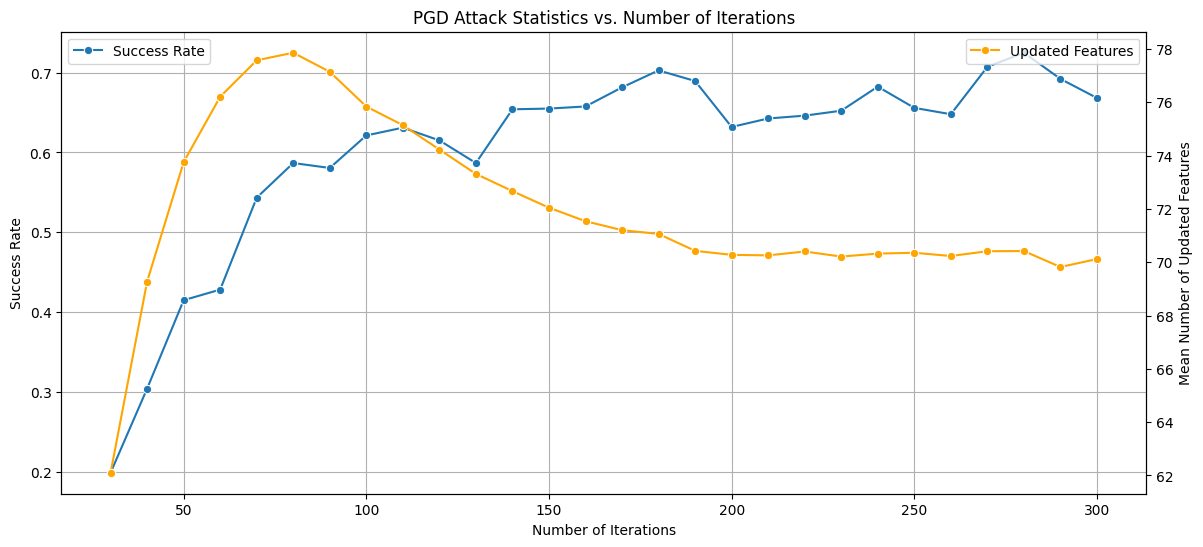

In [ ]:
# Run PGD attack and plot the success rates
attack_success_rates, mean_diffs = run_pgd_attack(model_AT_rFGSM_weightedLoss, pgd_min_adam, test_loader, device, iterations_list, step_size=step_size)
plot_attack_statistics(iterations_list, attack_success_rates, mean_diffs)

In [ ]:
# Assuming you have model, test_loader, and device defined
iterations_list = list(range(20, 60, 2))  # Specific iteration counts from 50 to 100 with a step of 5
step_size = 0.02  # Step size for PGD

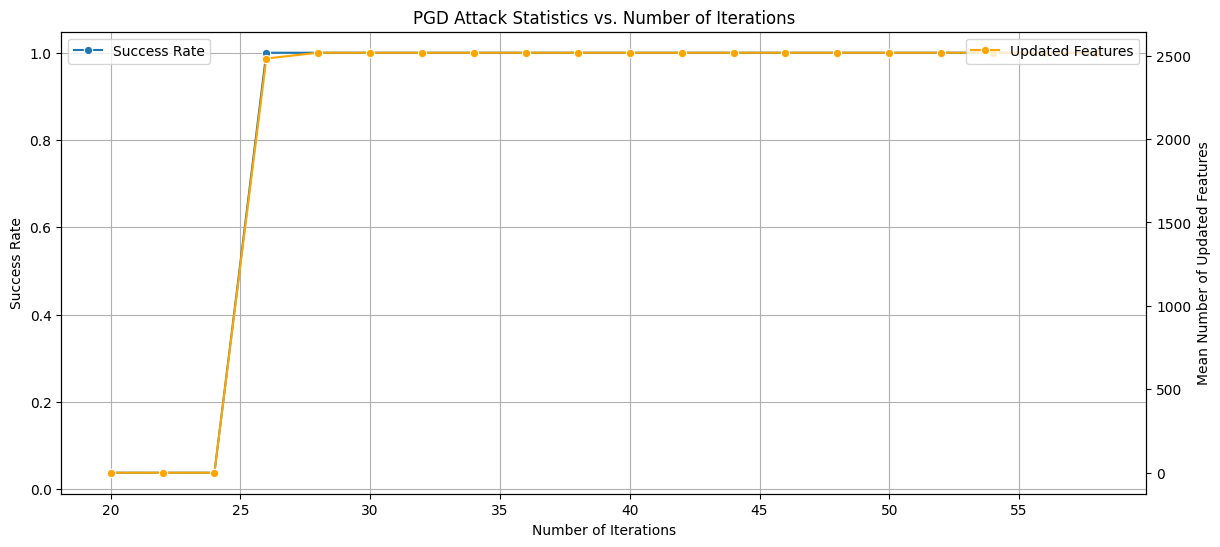

In [ ]:
# Run PGD attack and plot the success rates
attack_success_rates, mean_diffs = run_pgd_attack(model_DNN, pgd_min_adam, test_loader, device, iterations_list, step_size=step_size)
plot_attack_statistics(iterations_list, attack_success_rates, mean_diffs)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


def adv_predict(test_loader, model, attack, device, **kwargs):
    model.eval()
    n_samples = 0
    cor_test = 0
    cor_ad_test = 0
    all_diff = 0.
    with torch.no_grad():
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(torch.float32).to(device), y_test.to(device)
            mal_x_batch, mal_y_batch = x_test[y_test.squeeze() == 1], y_test[y_test.squeeze() == 1]
            n_samples += len(mal_y_batch)

            outputs = model(mal_x_batch)
            predicted = outputs.argmax(1)
            cor_test += (predicted == 1).sum().item()

            with torch.enable_grad():
                pertb_mal_x, diff = attack(mal_x_batch, mal_y_batch, model, insertion_array, removal_array, is_report_loss_diff=False, **kwargs)

            outputs = model(pertb_mal_x)
            y_pred = outputs.argmax(1)
            cor_ad_test += (y_pred == 1).sum().item()
            all_diff += (diff * len(mal_y_batch))

    # Calculate success rate as 1 - (correct predictions under attack / total samples)
    attack_success_rate = 1 - (cor_ad_test / n_samples)
    mean_diff = (all_diff/ n_samples)
    return attack_success_rate, mean_diff

def run_pgd_attack(model, attack, test_loader, device, iterations_list, step_size=0.5):
    attack_success_rates = []
    mean_diffs = []
    for k in iterations_list:
        #print(f"Running PGD with {k} iterations...")
        success_rate, mean_diff = adv_predict(test_loader, model, attack, device, k=k, step_length=step_size, norm='linf')
        attack_success_rates.append(success_rate)
        mean_diffs.append(mean_diff.item())

    return attack_success_rates, mean_diffs


def plot_attack_statistics(iterations, success_rates, updated_features):
    """
    Plots the attack success rate and mean number of updated features based on the number of iterations.

    Parameters:
    - iterations: List of iteration counts.
    - success_rates: List of success rates.
    - updated_features: List of mean number of updated features.
    """
    # Create DataFrames for each plot
    data_success_rate = pd.DataFrame({
        'Iterations': iterations,
        'Success Rate': success_rates
    })

    data_updated_features = pd.DataFrame({
        'Iterations': iterations,
        'Updated Features': updated_features
    })

    # Plot using seaborn
    fig, ax1 = plt.subplots(figsize=(14, 6))

    sns.lineplot(data=data_success_rate, x='Iterations', y='Success Rate', marker='o', ax=ax1, label='Success Rate')
    ax1.set_title('PGD Attack Statistics vs. Number of Iterations')
    ax1.set_xlabel('Number of Iterations')
    ax1.set_ylabel('Success Rate')
    ax1.grid(True)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    sns.lineplot(data=data_updated_features, x='Iterations', y='Updated Features', marker='o', color='orange', ax=ax2, label='Updated Features')
    ax2.set_ylabel('Mean Number of Updated Features')
    ax2.legend(loc='upper right')

    plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def get_done(x, y, model):
    outputs = model(x)
    predicted = torch.argmax(outputs, dim=1)
    y = y.view_as(predicted)
    done = (predicted != y).bool()
    return done


def pgd_min_adam(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    model.eval()

    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), torch.zeros_like(y.view(-1).long()))

    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    # Adam optimizer variables
    m = torch.zeros_like(x)
    v = torch.zeros_like(x)
    beta1 = 0.9
    beta2 = 0.999
    epsilon_adam = 1e-15
    t = 0

    for t in range(k):
        #print('**********',t)
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, torch.zeros_like(y.view(-1).long()))

        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)

        pos_insertion = (x_var < (0.999)) * 1 * insertion_array_updated
        grad4insertion = (gradients > 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #print(torch.abs(gradients).sum())
        # Adam update
        t += 1
        m = beta1 * m + (1 - beta1) * gradients
        v = beta2 * v + (1 - beta2) * (gradients ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        gradients = m_hat / (torch.sqrt(v_hat) + epsilon_adam)
        #print(torch.abs(gradients).sum())

        # Apply norm constraints to the updated gradients
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
            print(l2norm)
        elif norm == 'l1':
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.
        elif norm == 'free':
            perturbation = gradients
        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    loss_adv = criterion(model(x_next), torch.zeros_like(y.view(-1).long())).data
    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    diff = torch.abs(x_next - x).sum(dim=-1)

    if is_report_loss_diff:
        done = get_done(x_next, y, model)
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")
        print('mean of difference features', torch.mean(diff))

    return x_next,torch.mean(diff)


In [ ]:
# Assuming you have model, test_loader, and device defined
iterations_list = list(range(30, 210, 10))  # Specific iteration counts from 50 to 100 with a step of 5
step_size = 0.01  # Step size for PGD

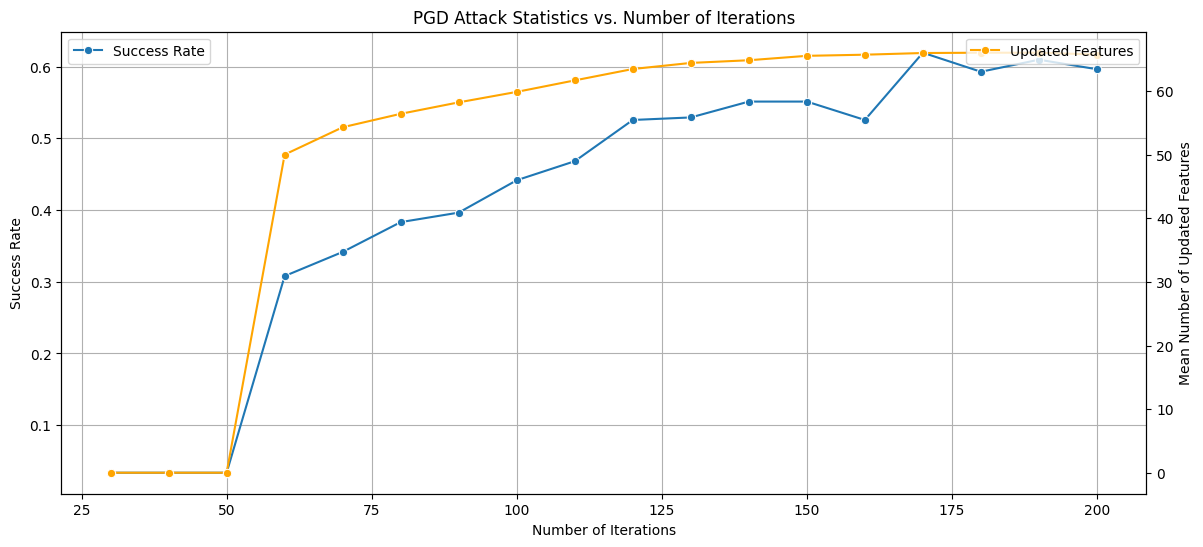

In [ ]:
# Run PGD attack and plot the success rates
attack_success_rates, mean_diffs = run_pgd_attack(model_AT_rFGSM_weightedLoss, pgd_min_adam, test_loader, device, iterations_list, step_size=step_size)
plot_attack_statistics(iterations_list, attack_success_rates, mean_diffs)

In [ ]:
# Assuming you have model, test_loader, and device defined
iterations_list = list(range(30, 210, 10))  # Specific iteration counts from 50 to 100 with a step of 5
step_size = 0.05  # Step size for PGD

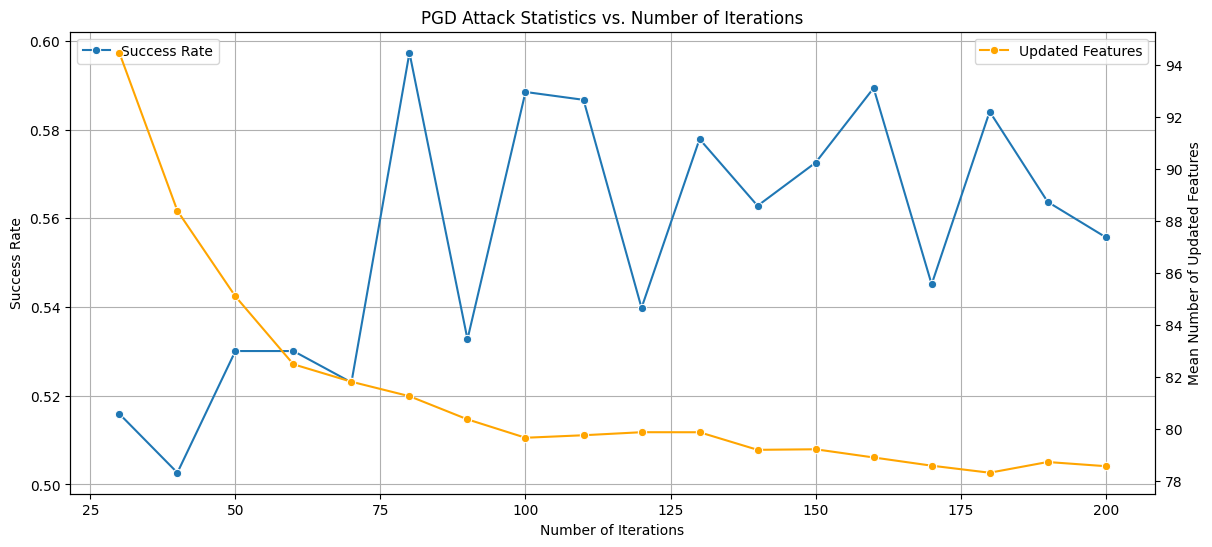

In [ ]:
# Run PGD attack and plot the success rates
attack_success_rates, mean_diffs = run_pgd_attack(model_AT_rFGSM_weightedLoss, pgd_min_adam, test_loader, device, iterations_list, step_size=step_size)
plot_attack_statistics(iterations_list, attack_success_rates, mean_diffs)

# validating updated insertion and removal array
wirh considering insertion array on the run


```
pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
```



In [ ]:
def pgd_min(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack (loss based on goal's class, which we have to minimize the loss).
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), torch.zeros_like(y.view(-1).long()))

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)


    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))


    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, torch.zeros_like(y.view(-1).long()))
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print('loss : ',criterion(y_model, y.view(-1).long()))

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        #print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        #pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
            #print(torch.abs(perturbation).sum())
            #print('torch.abs(perturbation).sum(dim=-1) : ',torch.abs(perturbation).sum(dim=-1))

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            #print('l2norm ; ',l2norm)
            perturbation = (gradients / (l2norm + 1e-20)).float()

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        #print(torch.abs(x_next - torch.clamp(x_next + perturbation * step_length, min=0., max=1.)).sum())
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), torch.zeros_like(y.view(-1).long())).data

    if is_report_loss_diff:
        done = get_done(x_next, y, model)
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
x = mals[13:14].to(torch.float32).to(device)
y = mals_y[13:14].to(device)
adv = pgd_min(x, y, model_AT_rFGSM, insertion_array, removal_array, k=1000, step_length=.01, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

PGD linf: Attack effectiveness 100.000%.


In [ ]:
# Expand insertion_array and removal_array to match the batch size
expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
expanded_removal_array = removal_array.expand(x.shape[0], -1)

# Update insertion and removal arrays based on input x
insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

In [ ]:
print(x.sum())
print(adv.sum())

tensor(14., device='cuda:0')
tensor(42., device='cuda:0')


In [ ]:
insert = ((adv-x) > 0)
remove =  ((adv-x) < 0)
same = (adv != x)
print(insert.sum())
print(remove.sum())
print(same.sum())

tensor(31, device='cuda:0')
tensor(3, device='cuda:0')
tensor(34, device='cuda:0')


In [ ]:
(insert * insertion_array_updated).sum()

tensor(31, device='cuda:0')

In [ ]:
(remove * removal_array_updated).sum()

tensor(3, device='cuda:0')

In [ ]:
x = mals[3:4].to(torch.float32).to(device)
y = mals_y[3:4].to(device)
adv = pgd_min(x, y, model_AT_rFGSM, insertion_array, removal_array, k=1000, step_length=.01, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

PGD linf: Attack effectiveness 0.000%.


In [ ]:
# Expand insertion_array and removal_array to match the batch size
expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
expanded_removal_array = removal_array.expand(x.shape[0], -1)

# Update insertion and removal arrays based on input x
insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

In [ ]:
print(x.sum())
print(adv.sum())

tensor(128., device='cuda:0')
tensor(93., device='cuda:0')


In [ ]:
insert = ((adv-x) > 0)
remove =  ((adv-x) < 0)
same = (adv != x)
print(insert.sum())
print(remove.sum())
print(same.sum())

tensor(29, device='cuda:0')
tensor(64, device='cuda:0')
tensor(93, device='cuda:0')


In [ ]:
(insert * insertion_array_updated).sum()

tensor(29, device='cuda:0')

In [ ]:
(remove * removal_array_updated).sum()

tensor(64, device='cuda:0')

In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 1000, 'step_length': 0.01, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

PGD linf: Attack effectiveness 72.414%.
PGD linf: Attack effectiveness 72.000%.
PGD linf: Attack effectiveness 53.846%.
PGD linf: Attack effectiveness 80.000%.
PGD linf: Attack effectiveness 72.000%.
PGD linf: Attack effectiveness 68.000%.
PGD linf: Attack effectiveness 76.471%.
PGD linf: Attack effectiveness 69.697%.
PGD linf: Attack effectiveness 73.810%.
PGD linf: Attack effectiveness 65.517%.
PGD linf: Attack effectiveness 90.000%.
PGD linf: Attack effectiveness 67.647%.
PGD linf: Attack effectiveness 60.000%.
PGD linf: Attack effectiveness 85.185%.
PGD linf: Attack effectiveness 68.000%.
PGD linf: Attack effectiveness 80.645%.
PGD linf: Attack effectiveness 73.333%.
PGD linf: Attack effectiveness 84.000%.
PGD linf: Attack effectiveness 77.419%.
PGD linf: Attack effectiveness 77.778%.
PGD linf: Attack effectiveness 76.667%.
PGD linf: Attack effectiveness 90.000%.
PGD linf: Attack effectiveness 50.000%.
PGD linf: Attack effectiveness 72.414%.
PGD linf: Attack effectiveness 77.273%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

PGD linf: Attack effectiveness 68.966%.
PGD linf: Attack effectiveness 52.000%.
PGD linf: Attack effectiveness 38.462%.
PGD linf: Attack effectiveness 68.571%.
PGD linf: Attack effectiveness 56.000%.
PGD linf: Attack effectiveness 48.000%.
PGD linf: Attack effectiveness 55.882%.
PGD linf: Attack effectiveness 57.576%.
PGD linf: Attack effectiveness 57.143%.
PGD linf: Attack effectiveness 58.621%.
PGD linf: Attack effectiveness 70.000%.
PGD linf: Attack effectiveness 50.000%.
PGD linf: Attack effectiveness 35.000%.
PGD linf: Attack effectiveness 70.370%.
PGD linf: Attack effectiveness 48.000%.
PGD linf: Attack effectiveness 58.065%.
PGD linf: Attack effectiveness 53.333%.
PGD linf: Attack effectiveness 64.000%.
PGD linf: Attack effectiveness 54.839%.
PGD linf: Attack effectiveness 66.667%.
PGD linf: Attack effectiveness 63.333%.
PGD linf: Attack effectiveness 70.000%.
PGD linf: Attack effectiveness 36.364%.
PGD linf: Attack effectiveness 51.724%.
PGD linf: Attack effectiveness 54.545%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

PGD l2: Attack effectiveness 72.414%.
PGD l2: Attack effectiveness 72.000%.
PGD l2: Attack effectiveness 53.846%.
PGD l2: Attack effectiveness 85.714%.
PGD l2: Attack effectiveness 72.000%.
PGD l2: Attack effectiveness 68.000%.
PGD l2: Attack effectiveness 76.471%.
PGD l2: Attack effectiveness 72.727%.
PGD l2: Attack effectiveness 71.429%.
PGD l2: Attack effectiveness 68.966%.
PGD l2: Attack effectiveness 90.000%.
PGD l2: Attack effectiveness 64.706%.
PGD l2: Attack effectiveness 65.000%.
PGD l2: Attack effectiveness 81.481%.
PGD l2: Attack effectiveness 68.000%.
PGD l2: Attack effectiveness 83.871%.
PGD l2: Attack effectiveness 70.000%.
PGD l2: Attack effectiveness 92.000%.
PGD l2: Attack effectiveness 77.419%.
PGD l2: Attack effectiveness 77.778%.
PGD l2: Attack effectiveness 80.000%.
PGD l2: Attack effectiveness 90.000%.
PGD l2: Attack effectiveness 50.000%.
PGD l2: Attack effectiveness 68.966%.
PGD l2: Attack effectiveness 72.727%.
PGD l2: Attack effectiveness 65.385%.
PGD l2: Atta

In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

PGD l1: Attack effectiveness 72.414%.
PGD l1: Attack effectiveness 68.000%.
PGD l1: Attack effectiveness 46.154%.
PGD l1: Attack effectiveness 77.143%.
PGD l1: Attack effectiveness 72.000%.
PGD l1: Attack effectiveness 68.000%.
PGD l1: Attack effectiveness 70.588%.
PGD l1: Attack effectiveness 60.606%.
PGD l1: Attack effectiveness 69.048%.
PGD l1: Attack effectiveness 65.517%.
PGD l1: Attack effectiveness 85.000%.
PGD l1: Attack effectiveness 61.765%.
PGD l1: Attack effectiveness 55.000%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 60.000%.
PGD l1: Attack effectiveness 77.419%.
PGD l1: Attack effectiveness 66.667%.
PGD l1: Attack effectiveness 88.000%.
PGD l1: Attack effectiveness 64.516%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 70.000%.
PGD l1: Attack effectiveness 76.667%.
PGD l1: Attack effectiveness 45.455%.
PGD l1: Attack effectiveness 65.517%.
PGD l1: Attack effectiveness 63.636%.
PGD l1: Attack effectiveness 61.538%.
PGD l1: Atta

conclusion

In [ ]:
def pgd(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, y.view(-1).long())
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print('loss : ',criterion(y_model, y.view(-1).long()))

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data

        pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        #pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.5) * 1 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / l2norm).float()
            perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            perturbation[torch.isnan(perturbation)] = 0.
            perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
def pgd2(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)


    #insertion_array_updated = torch.bitwise_or(insertion_array.to(torch.uint8), x.squeeze().to(torch.uint8) )
    #removal_array_updated = torch.bitwise_or(removal_array.to(torch.uint8), (1 - x.squeeze().to(torch.uint8)) )

    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, y.view(-1).long())
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print('loss : ',criterion(y_model, y.view(-1).long()))

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data

        pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        #pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
            #perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            #perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            #perturbation[torch.isnan(perturbation)] = 0.
            #perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
def get_done(x, y, model):
    # Get the model's predictions
    outputs = model(x)

    # Use argmax to get the predicted class indices
    predicted = torch.argmax(outputs, dim=1)

    # Ensure y is in the same shape as predicted for comparison
    y = y.view_as(predicted)

    # Determine if the predictions are incorrect
    done = (predicted != y).bool()

    return done


def pgd_min(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack (loss based on goal's class, which we have to minimize the loss).
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), torch.zeros_like(y.view(-1).long()))

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)


    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))


    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, torch.zeros_like(y.view(-1).long()))
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print('loss : ',criterion(y_model, y.view(-1).long()))

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        #print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        #pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
            #print(torch.abs(perturbation).sum())
            #print('torch.abs(perturbation).sum(dim=-1) : ',torch.abs(perturbation).sum(dim=-1))

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            #print('l2norm ; ',l2norm)
            perturbation = (gradients / (l2norm + 1e-20)).float()

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        #print(torch.abs(x_next - torch.clamp(x_next + perturbation * step_length, min=0., max=1.)).sum())
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), torch.zeros_like(y.view(-1).long())).data

    if is_report_loss_diff:
        done = get_done(x_next, y, model)
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 34.34%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd2, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 34.34%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 30.88%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 80.18%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd2, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 69.12%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 25.4%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 78.58%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd2, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 42.21%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 42.48%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 34.34%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd2, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 34.34%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 30.09%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 86.46%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd2, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 68.32%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 21.77%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 92.65%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd2, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 35.75%.


In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

Accuracy of just malwares (without attack): 94.69% | Under attack: 32.04%.


#Study GKDE gradients

In [ ]:
def get_loss_kde(adv_x,y,model,benigns, bandwidth, penalty_factor):
    criterion = nn.CrossEntropyLoss(reduction='none')
    outputs = model(adv_x)
    ce = criterion(outputs, y.view(-1).long())
    #print('ce: ', ce)
    kde = KDE(adv_x, benigns, bandwidth)
    #print('kde : ', kde)
    loss_no_reduction = ce + penalty_factor * kde
    _, predicted = torch.topk(outputs, k=1)
    done = (predicted != y).squeeze()

    return loss_no_reduction, done


def gkde(x, y, model,bens, bandwidth, penalty_factor, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural, _ = get_loss_kde(x,y,model,bens, bandwidth, penalty_factor)

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Multi-step PGD
    for t in range(k):
        print('************** t ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        #y_model = model(x_var)

        criterion = nn.CrossEntropyLoss(reduction='none')
        outputs = model(x_var)
        ce_loss = criterion(outputs, y.view(-1).long())
        print('ce_loss: ', ce_loss)
        kde_loss = KDE(x_var, bens, bandwidth)
        print('kde_loss: ', kde_loss)
        ce_grad = torch.autograd.grad(ce_loss.mean(), x_var, retain_graph=True)[0].data
        kde_grad = torch.autograd.grad(kde_loss.mean(), x_var)[0].data
        print('ce_grad ',torch.abs(ce_grad).sum(dim=-1).detach())
        print('kde_grad ',torch.abs(kde_grad).sum(dim=-1).detach())
        penalty_factor = torch.abs(ce_grad).sum(dim=-1).detach()/(torch.abs(kde_grad).sum(dim=-1).detach()+ 1e-20)
        print('penalty_factor ',penalty_factor)

        if t > 5:
          decayed_penalty_factor = penalty_factor * (1 - t / k)
        else:
          decayed_penalty_factor = penalty_factor

        # Compute loss
        loss, _ = get_loss_kde(x_var,y,model,bens, bandwidth, decayed_penalty_factor)
        #loss,_ = get_loss_kde(x_var,y,model,bens, bandwidth, penalty_factor)
        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data
        pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        #pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.5) * 1 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / l2norm).float()
            perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            perturbation[torch.isnan(perturbation)] = 0.
            perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x_next - x_var) <= 1e-6
            gradients = gradients * un_mod

            val, _ = torch.topk(torch.abs(gradients), 1)
            perturbation = (torch.abs(gradients) >= val.expand_as(gradients)).float() * torch.sign(gradients).float()
            # stop perturbing the examples that are successful to evade the victim
            _, done = get_loss_kde(x_next,y,model,bens, bandwidth, penalty_factor)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    outputs = model(x_next)
    loss_adv = criterion(outputs, y.view(-1).long())
    _, predicted = torch.topk(outputs, k=1)
    done = (predicted != y).squeeze()

    if is_report_loss_diff:
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
# Pre-select benign samples
benign_samples = []

for x_batch, y_batch in test_loader:
  benign_samples.append(x_batch[y_batch.squeeze() == 0])

ben_x = torch.cat(benign_samples, dim=0).to(device)

# Forward pass to get logits for benign samples
with torch.no_grad():  # No need for gradients
    outputs = model_AT_rFGSM(ben_x.to(torch.float32))

# Calculate softmax probabilities
probabilities = torch.softmax(outputs, dim=1)

# Sort indices based on probabilities of class 1 (assuming class 1 is the "positive" class)
sorted_indices = torch.argsort(probabilities[:, 1], descending=False)

# Select the top 500 high confidence benign samples
top_500_high_confidence_benign_samples = ben_x[sorted_indices[:500]]

del benign_samples, outputs, probabilities, ben_x  # Free up memory

In [ ]:
adv = gkde(mals.to(torch.float32).to(device), mals_y.to(device), model_AT_rFGSM, top_500_high_confidence_benign_samples,0.6,1., insertion_array, removal_array, k=100, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)


************** t  0
ce_loss:  tensor([-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
        -0.0000e+00, 9.2741e-05, -0.0000e+00, -0.0000e+00, -0.0000e+00, 1.1325e+01,
        -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
        -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
        -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00],
       grad_fn=<NllLossBackward0>)
kde_loss:  tensor([1.3344e-05, 2.2177e-10, 1.1448e-15, 0.0000e+00, 2.2177e-10, 3.4137e-18,
        1.3935e-26, 6.6971e-06, 1.2336e-39, 1.8229e-36, 1.3344e-05, 5.0246e-11,
        2.2177e-10, 5.7728e-08, 3.5037e-15, 4.1197e-12, 1.2445e-38, 3.1590e-40,
        8.5677e-20, 2.3542e-38, 7.7047e-27, 2.7702e-10, 2.2177e-10, 4.0407e-39,
        1.8901e-17, 1.1674e-15, 2.3014e-07, 4.1197e-12, 7.4781e-03],
       grad_fn=<MeanBackward1>)
ce_grad  tensor([1.0327e-15, 1.5589e-35, 3.6246e-23, 0.0000e+00, 1.5589e-35, 3.7404e-14

In [ ]:
KDE(top_500_high_confidence_benign_samples[:1], top_500_high_confidence_benign_samples, 0.6)

tensor([0.0462], device='cuda:0')

In [ ]:
KDE(mals.to(device), top_500_high_confidence_benign_samples, 0.6)

tensor([1.3344e-05, 2.2177e-10, 1.1448e-15, 0.0000e+00, 2.2177e-10, 3.4137e-18,
        1.3935e-26, 6.6971e-06, 1.2336e-39, 1.8229e-36, 1.3344e-05, 5.0246e-11,
        2.2177e-10, 5.7728e-08, 3.5037e-15, 4.1197e-12, 1.2445e-38, 3.1590e-40,
        8.5677e-20, 2.3542e-38, 7.7047e-27, 2.7702e-10, 2.2177e-10, 4.0407e-39,
        1.8901e-17, 1.1674e-15, 2.3014e-07, 4.1197e-12, 7.4781e-03])

In [ ]:
KDE(top_500_high_confidence_benign_samples, top_500_high_confidence_benign_samples, 0.6)

tensor([1.0995, 1.0995, 1.0995, 1.0995, 1.0995, 1.0244, 1.0995, 1.0244, 1.0244,
        1.0244, 0.1000, 1.0995, 0.1000, 0.2199, 0.3237, 0.1000, 1.0995, 1.9344,
        0.9219, 0.9219, 0.1569, 0.8929, 0.1552, 1.0244, 1.9344, 0.4189, 1.0244,
        0.1063, 1.0244, 0.1000, 0.1000, 0.1300, 0.1000, 1.9344, 0.1038, 1.9344,
        1.9344, 0.1000, 1.9344, 0.9219, 0.2001, 0.1000, 0.3195, 0.1081, 1.9344,
        0.1250, 0.1143, 0.2000, 0.1026, 0.9219, 1.9344, 1.0995, 0.2000, 0.1000,
        1.9344, 0.4189, 0.1251, 1.9344, 0.9219, 0.1559, 0.2273, 0.3001, 0.9219,
        0.2273, 0.1065, 0.3001, 0.1307, 0.9219, 0.8929, 0.5761, 1.9344, 1.9344,
        1.9344, 0.1021, 0.2199, 0.1000, 0.2000, 1.9344, 0.8929, 1.9344, 0.1307,
        0.9219, 1.0244, 0.1584, 0.1157, 0.3195, 0.1388, 0.5761, 0.1076, 0.2000,
        0.3001, 1.9344, 0.2199, 0.3237, 0.1569, 1.9344, 0.2001, 0.5823, 0.8929,
        0.3164])

In [ ]:
KDE(top_500_high_confidence_benign_samples, top_500_high_confidence_benign_samples, 0.6)

tensor([1.0995, 1.0995, 1.0995, 1.0995, 1.0995, 1.0244, 1.0995, 1.0244, 1.0244,
        1.0244, 0.1000, 1.0995, 0.1000, 0.2199, 0.3237, 0.1000, 1.0995, 1.9344,
        0.9219, 0.9219, 0.1569, 0.8929, 0.1552, 1.0244, 1.9344, 0.4189, 1.0244,
        0.1063, 1.0244, 0.1000, 0.1000, 0.1300, 0.1000, 1.9344, 0.1038, 1.9344,
        1.9344, 0.1000, 1.9344, 0.9219, 0.2001, 0.1000, 0.3195, 0.1081, 1.9344,
        0.1250, 0.1143, 0.2000, 0.1026, 0.9219, 1.9344, 1.0995, 0.2000, 0.1000,
        1.9344, 0.4189, 0.1251, 1.9344, 0.9219, 0.1559, 0.2273, 0.3001, 0.9219,
        0.2273, 0.1065, 0.3001, 0.1307, 0.9219, 0.8929, 0.5761, 1.9344, 1.9344,
        1.9344, 0.1021, 0.2199, 0.1000, 0.2000, 1.9344, 0.8929, 1.9344, 0.1307,
        0.9219, 1.0244, 0.1584, 0.1157, 0.3195, 0.1388, 0.5761, 0.1076, 0.2000,
        0.3001, 1.9344, 0.2199, 0.3237, 0.1569, 1.9344, 0.2001, 0.5823, 0.8929,
        0.3164])

In [ ]:
KDE(mals, top_500_high_confidence_benign_samples, 0.6)

tensor([1.3344e-05, 2.2177e-10, 1.1448e-15, 0.0000e+00, 2.2177e-10, 3.4137e-18,
        1.3935e-26, 6.6971e-06, 1.2336e-39, 1.8229e-36, 1.3344e-05, 5.0246e-11,
        2.2177e-10, 5.7728e-08, 3.5037e-15, 4.1197e-12, 1.2445e-38, 3.1590e-40,
        8.5677e-20, 2.3542e-38, 7.7047e-27, 2.7702e-10, 2.2177e-10, 4.0407e-39,
        1.8901e-17, 1.1674e-15, 2.3014e-07, 4.1197e-12, 7.4781e-03])

In [ ]:
def get_done(x, y, model):
    # Get the model's predictions
    outputs = model(x)

    # Use argmax to get the predicted class indices
    predicted = torch.argmax(outputs, dim=1)

    # Ensure y is in the same shape as predicted for comparison
    y = y.view_as(predicted)

    # Determine if the predictions are incorrect
    done = (predicted != y).bool()

    return done

def get_loss_kde(adv_x,y,model,benigns, bandwidth, penalty_factor):

    criterion = nn.CrossEntropyLoss()

    # Compute CE loss
    outputs = model(adv_x)
    ce = criterion(outputs, y)
    #print('ce ',ce)

    # Compute KDE loss
    kde = KDE(adv_x, benigns, bandwidth)
    #print('kde ',kde)

    # Combine the losses with the penalty factor
    loss = ce - penalty_factor * kde
    #print('loss ',loss)

    return loss


def gkde(x, y, model,benigns, bandwidth, insertion_array, removal_array, k=25, step_length=0.02, norm='linf',
        initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.

    :param x: Feature vector
    :param y: Ground truth labels
    :param model: Neural network model
    :param RBFModel: Gaussian model for KDE
    :param insertion_array: Array for insertion operations
    :param removal_array: Array for removal operations
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf', 'l2', 'l1')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    #target's class
    traget_labels = torch.zeros_like(y.view(-1).long())

    # Compute natural loss and penalty_factor
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), traget_labels)
    kde = KDE(x, benigns, bandwidth)
    #penalty_factor = 0.
    penalty_factor = 1e6
    #print(penalty_factor)

    # Initialize starting point
    x_next = get_x0(x.clone(), initial_rounding_threshold, is_sample)

    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    for t in range(k):
        print('*************** t ',t)
        x_var = x_next.clone().detach().requires_grad_(True)

        criterion = nn.CrossEntropyLoss(reduction='none')
        outputs = model(x_var)
        ce_loss = criterion(outputs, traget_labels)
        print('ce_loss: ', ce_loss)
        kde_loss = KDE(x_var, benigns, bandwidth)
        print('kde_loss: ', kde_loss)
        ce_grad = torch.autograd.grad(ce_loss.mean(), x_var, retain_graph=True)[0].data
        kde_grad = torch.autograd.grad(kde_loss.mean(), x_var)[0].data
        print('ce_grad ',torch.abs(ce_grad).sum(dim=-1).detach())
        print('kde_grad ',torch.abs(kde_grad).sum(dim=-1).detach())





        # Compute loss
        loss = get_loss_kde(x_var,traget_labels,model,benigns, bandwidth, penalty_factor)
        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        #print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        #pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion

        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
        elif norm == 'l2':
            l2norm = torch.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
        elif norm == 'l1':
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1', 'l2', or 'linf' norm.")

        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    if random:
        round_threshold = torch.rand_like(x_next)
    x_next = round_x(x_next, round_threshold=round_threshold)

    outputs = model(x_next)
    loss_adv = criterion(outputs, traget_labels).data
    done = get_done(x_next, y, model)

    if is_report_loss_diff:
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size(0) * 100:.3f}%.")

    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
adv = gkde(mals.to(torch.float32).to(device), mals_y.to(device), model_AT_rFGSM, top_500_high_confidence_benign_samples,0.6, insertion_array, removal_array, k=100, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)


*************** t  0
ce_loss:  tensor([4.1028e+01, 8.6630e+01, 5.8158e+01, 1.8685e+02, 8.6630e+01, 3.6857e+01,
        1.5623e+02, 9.2854e+00, 1.8450e+02, 1.0696e+02, 4.1028e+01, 1.2040e-05,
        8.6630e+01, 3.8186e+01, 9.1592e+01, 7.5509e+01, 1.2146e+02, 2.8487e+01,
        6.3303e+01, 9.9407e+01, 1.4897e+02, 1.9638e+01, 8.6630e+01, 4.9636e+01,
        3.4985e+01, 2.0074e+01, 7.7117e+01, 7.5509e+01, 3.8682e+01],
       grad_fn=<NllLossBackward0>)
kde_loss:  tensor([1.3344e-05, 2.2177e-10, 1.1448e-15, 0.0000e+00, 2.2177e-10, 3.4137e-18,
        1.3935e-26, 6.6971e-06, 1.2336e-39, 1.8229e-36, 1.3344e-05, 5.0246e-11,
        2.2177e-10, 5.7728e-08, 3.5037e-15, 4.1197e-12, 1.2445e-38, 3.1590e-40,
        8.5677e-20, 2.3542e-38, 7.7047e-27, 2.7702e-10, 2.2177e-10, 4.0407e-39,
        1.8901e-17, 1.1674e-15, 2.3014e-07, 4.1197e-12, 7.4781e-03],
       grad_fn=<MeanBackward1>)
*************** t  1
ce_loss:  tensor([3.8930e+01, 8.1252e+01, 5.4561e+01, 1.8050e+02, 8.1252e+01, 3.0279e+01,
  

# Different kinds of GKDE

In [ ]:
# Pre-select benign samples
benign_samples = []
for x_batch, y_batch in test_loader:
  benign_samples.append(x_batch[y_batch.squeeze() == 0])

ben_x = torch.cat(benign_samples, dim=0).to(device)

# Forward pass to get logits for benign samples
with torch.no_grad():  # No need for gradients
    outputs = model_AT_rFGSM(ben_x.to(torch.float32))

# Calculate softmax probabilities
probabilities = torch.softmax(outputs, dim=1)

# Sort indices based on probabilities of class 1 (assuming class 1 is the "positive" class)
sorted_indices = torch.argsort(probabilities[:, 1], descending=False)

# Select the top 1000 high confidence benign samples
top_1000_high_confidence_benign_samples = ben_x[sorted_indices[:1000]]

# Set to track indices of samples to be removed
removed_set = set()

# Step 1: Identify similar samples
for i in range(len(top_1000_high_confidence_benign_samples)):
    if i in removed_set:
        continue
    sample1 = top_1000_high_confidence_benign_samples[i]
    for j in range(i + 1, len(top_1000_high_confidence_benign_samples)):
        if j in removed_set:
            continue
        sample2 = top_1000_high_confidence_benign_samples[j]
        if torch.abs(sample1 - sample2).sum().item() < 5:
            removed_set.add(j)

# Step 2: Select samples that are not in removed_set
selected_samples = [sample for idx, sample in enumerate(top_1000_high_confidence_benign_samples) if idx not in removed_set]

# Step 3: Stack tensors along a new dimension
selected_benigns = torch.stack(selected_samples)

del benign_samples, outputs, probabilities, top_1000_high_confidence_benign_samples, selected_samples   # Free up memory

In [ ]:
def get_done(x, y, model):
    # Get the model's predictions
    outputs = model(x)

    # Use argmax to get the predicted class indices
    predicted = torch.argmax(outputs, dim=1)

    # Ensure y is in the same shape as predicted for comparison
    y = y.view_as(predicted)

    # Determine if the predictions are incorrect
    done = (predicted != y).bool()

    return done

In [ ]:
# Multidimensional KDE implementation
def KDE(x, data, bandwidth,kernel):
    """
    Compute the kernel density estimate (KDE) for given data points.

    Parameters:
        x (torch.Tensor): Points at which to evaluate the KDE (shape: [num_samples, num_dimensions]).
        data (torch.Tensor): Data points used to estimate the density (shape: [num_data_points, num_dimensions]).
        bandwidth (float): Bandwidth parameter for the KDE.

    Returns:
        torch.Tensor: Density estimate at each point in x (shape: [num_samples,]).
    """
    n = data.shape[0]  # Number of data points
    d = x.shape[1]  # Dimensionality of the data

    # Convert bandwidth to tensor
    bandwidth_tensor = torch.tensor(bandwidth)

    # Calculate standardized distances for all data points
    u = torch.abs(x[:, None, :] - data)

    # Compute kernel contributions for all data points
    if kernel == 'gaussian':
        kernel_contributions = 10. * torch.exp(-0.5 * torch.sum(u**2, dim=-1) / bandwidth**2)
    else:
        kernel_contributions = (1./d) * torch.exp(-1. * torch.sum(u, dim=-1) / bandwidth_tensor)

    # Sum contributions across all data points
    estimate = torch.mean(kernel_contributions, dim=1)

    # Normalize the density estimate by the number of points and the bandwidth raised to the dimensionality
    #estimate /= (bandwidth_tensor ** d)

    return estimate


In [ ]:
def get_loss_kde_old(adv_x,y,model,benigns, bandwidth, penalty_factor,kernel):
    criterion = nn.CrossEntropyLoss(reduction='none')
    outputs = model(adv_x)
    ce = criterion(outputs, y.view(-1).long())
    #print('ce: ', ce)
    kde = KDE(adv_x, benigns, bandwidth,kernel)
    #print('kde : ', kde)
    loss_no_reduction = ce + penalty_factor * kde
    return loss_no_reduction


def gkde_old(x, y, model,bens, bandwidth, penalty_factor, kernel, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = get_x0(x.clone(), initial_rounding_threshold, is_sample)

    # Multi-step PGD
    for t in range(k):
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)

        # Compute loss
        loss = get_loss_kde_old(x_var,y,model,bens, bandwidth, penalty_factor, kernel)
        #loss,_ = get_loss_kde(x_var,y,model,bens, bandwidth, penalty_factor)
        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data
        pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        #pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.5) * 1 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / l2norm).float()
            perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            perturbation[torch.isnan(perturbation)] = 0.
            perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x_next - x_var) <= 1e-6
            gradients = gradients * un_mod

            val, _ = torch.topk(torch.abs(gradients), 1)
            perturbation = (torch.abs(gradients) >= val.expand_as(gradients)).float() * torch.sign(gradients).float()
            # stop perturbing the examples that are successful to evade the victim
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Compute adversarial loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    outputs = model(x_next)
    loss_adv = criterion(outputs, y.view(-1).long()).data
    done = get_done(x_next, y, model)

    if is_report_loss_diff:
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
def get_loss_kde_old(adv_x,y,model,benigns, bandwidth, penalty_factor,kernel):
    criterion = nn.CrossEntropyLoss(reduction='none')
    outputs = model(adv_x)
    ce = criterion(outputs, y.view(-1).long())
    #print('ce: ', ce)
    kde = KDE(adv_x, benigns, bandwidth,kernel)
    #print('kde : ', kde)
    loss_no_reduction = ce + penalty_factor * kde
    return loss_no_reduction


def gkde_old2(x, y, model,bens, bandwidth, penalty_factor, kernel, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = get_x0(x.clone(), initial_rounding_threshold, is_sample)

    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))


    # Multi-step PGD
    for t in range(k):
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)

        # Compute loss
        loss = get_loss_kde_old(x_var,y,model,bens, bandwidth, penalty_factor, kernel)
        #loss,_ = get_loss_kde(x_var,y,model,bens, bandwidth, penalty_factor)
        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data

        pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        #pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / l2norm).float()
            perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            perturbation[torch.isnan(perturbation)] = 0.
            perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x_next - x_var) <= 1e-6
            gradients = gradients * un_mod

            val, _ = torch.topk(torch.abs(gradients), 1)
            perturbation = (torch.abs(gradients) >= val.expand_as(gradients)).float() * torch.sign(gradients).float()
            # stop perturbing the examples that are successful to evade the victim
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Compute adversarial loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    outputs = model(x_next)
    loss_adv = criterion(outputs, y.view(-1).long()).data
    done = get_done(x_next, y, model)

    if is_report_loss_diff:
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
def adv_predict(test_loader, model, attack, device, **kwargs):

    if (attack ==  gkde) or (attack ==  mimicry) or (attack ==  gkde_old) or (attack ==  gkde_old2):
      # Pre-select benign samples
      benign_samples = []
      for x_batch, y_batch in test_loader:
        benign_samples.append(x_batch[y_batch.squeeze() == 0])

      ben_x = torch.cat(benign_samples, dim=0).to(device)

      # Forward pass to get logits for benign samples
      with torch.no_grad():  # No need for gradients
          outputs = model_AT_rFGSM(ben_x.to(torch.float32))

      # Calculate softmax probabilities
      probabilities = torch.softmax(outputs, dim=1)

      # Sort indices based on probabilities of class 1 (assuming class 1 is the "positive" class)
      sorted_indices = torch.argsort(probabilities[:, 1], descending=False)

      # Select the top 500 high confidence benign samples
      top_1000_high_confidence_benign_samples = ben_x[sorted_indices[:1000]]

      # Set to track indices of samples to be removed
      removed_set = set()

      # Step 1: Identify similar samples
      for i in range(len(top_1000_high_confidence_benign_samples)):
          if i in removed_set:
              continue
          sample1 = top_1000_high_confidence_benign_samples[i]
          for j in range(i + 1, len(top_1000_high_confidence_benign_samples)):
              if j in removed_set:
                  continue
              sample2 = top_1000_high_confidence_benign_samples[j]
              if torch.abs(sample1 - sample2).sum().item() < 5:
                  removed_set.add(j)

      # Step 2: Select samples that are not in removed_set
      selected_samples = [sample for idx, sample in enumerate(top_1000_high_confidence_benign_samples) if idx not in removed_set]

      # Step 3: Stack tensors along a new dimension
      selected_benigns = torch.stack(selected_samples)

      del benign_samples, outputs, probabilities, ben_x, top_1000_high_confidence_benign_samples, selected_samples   # Free up memory


    model.eval()
    n_samples = 0
    cor_test = 0
    cor_ad_test = 0

    with torch.no_grad():
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(torch.float32).to(device), y_test.to(device)
            #outputs = model(x_test)
            #predicted = outputs.argmax(1).unsqueeze(1)
            #acc_test = (predicted == y_test).sum().item() / len(y_test)
            #avg_acc_test.append(acc_test)

            mal_x_batch, mal_y_batch = x_test[y_test.squeeze() == 1], y_test[y_test.squeeze() == 1]
            n_samples += len(mal_y_batch)

            outputs = model(mal_x_batch)
            predicted = outputs.argmax(1)
            cor_test += (predicted == 1).sum().item()

            # Generate adversarial examples for test set
            if attack == mimicry:
                pertb_mal_x = mimicry(top_500_high_confidence_benign_samples, mal_x_batch, model, **kwargs)
            elif (attack == gkde):
                with torch.enable_grad():
                  pertb_mal_x = gkde(mal_x_batch, mal_y_batch, model, selected_benigns, **kwargs)
            elif (attack == gkde_old):
                with torch.enable_grad():
                  pertb_mal_x = gkde_old(mal_x_batch, mal_y_batch, model, selected_benigns, **kwargs)
            elif (attack == gkde_old2):
                with torch.enable_grad():
                  pertb_mal_x = gkde_old2(mal_x_batch, mal_y_batch, model, selected_benigns, **kwargs)
            else :
                with torch.enable_grad():
                    pertb_mal_x = attack(mal_x_batch, mal_y_batch, model, **kwargs)

            outputs = model(pertb_mal_x)
            y_pred = outputs.argmax(1)
            cor_ad_test += (y_pred == 1).sum().item()

    # Calculate test accuracy
    print(f"Accuracy of just malwares (without attack): {(cor_test / n_samples) * 100:.4}% | Under attack: {(cor_ad_test / n_samples) * 100:.4}%.")



In [ ]:
def adv_predict0(test_loader, model, attack, device, **kwargs):

    if (attack ==  gkde) or (attack ==  mimicry) or (attack ==  gkde_old) or (attack ==  gkde_old2):
      # Pre-select benign samples
      benign_samples = []
      for x_batch, y_batch in test_loader:
        benign_samples.append(x_batch[y_batch.squeeze() == 0])

      ben_x = torch.cat(benign_samples, dim=0).to(device)

      # Forward pass to get logits for benign samples
      with torch.no_grad():  # No need for gradients
          outputs = model_AT_rFGSM(ben_x.to(torch.float32))

      # Calculate softmax probabilities
      probabilities = torch.softmax(outputs, dim=1)

      # Sort indices based on probabilities of class 1 (assuming class 1 is the "positive" class)
      sorted_indices = torch.argsort(probabilities[:, 1], descending=False)

      # Select the top 500 high confidence benign samples
      selected_benigns = ben_x[sorted_indices[:500]]


      del benign_samples, outputs, probabilities, ben_x   # Free up memory


    model.eval()
    n_samples = 0
    cor_test = 0
    cor_ad_test = 0

    with torch.no_grad():
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(torch.float32).to(device), y_test.to(device)
            #outputs = model(x_test)
            #predicted = outputs.argmax(1).unsqueeze(1)
            #acc_test = (predicted == y_test).sum().item() / len(y_test)
            #avg_acc_test.append(acc_test)

            mal_x_batch, mal_y_batch = x_test[y_test.squeeze() == 1], y_test[y_test.squeeze() == 1]
            n_samples += len(mal_y_batch)

            outputs = model(mal_x_batch)
            predicted = outputs.argmax(1)
            cor_test += (predicted == 1).sum().item()

            # Generate adversarial examples for test set
            if attack == mimicry:
                pertb_mal_x = mimicry(selected_benigns, mal_x_batch, model, **kwargs)
            elif (attack == gkde):
                with torch.enable_grad():
                  pertb_mal_x = gkde(mal_x_batch, mal_y_batch, model, selected_benigns, **kwargs)
            elif (attack == gkde_old):
                with torch.enable_grad():
                  pertb_mal_x = gkde_old(mal_x_batch, mal_y_batch, model, selected_benigns, **kwargs)
            elif (attack == gkde_old2):
                with torch.enable_grad():
                  pertb_mal_x = gkde_old2(mal_x_batch, mal_y_batch, model, selected_benigns, **kwargs)
            else :
                with torch.enable_grad():
                    pertb_mal_x = attack(mal_x_batch, mal_y_batch, model, **kwargs)

            outputs = model(pertb_mal_x)
            y_pred = outputs.argmax(1)
            cor_ad_test += (y_pred == 1).sum().item()

    # Calculate test accuracy
    print(f"Accuracy of just malwares (without attack): {(cor_test / n_samples) * 100:.4}% | Under attack: {(cor_ad_test / n_samples) * 100:.4}%.")



In [ ]:
def adv_predict2(test_loader, model, attack, device, **kwargs):

    if (attack ==  gkde) or (attack ==  mimicry) or (attack ==  gkde_old) or (attack ==  gkde_old2):
      # Pre-select benign samples
      benign_samples = []
      for x_batch, y_batch in test_loader:
        benign_samples.append(x_batch[y_batch.squeeze() == 0])

      ben_x = torch.cat(benign_samples, dim=0).to(device)
      selected_samples = ben_x[100]
      del benign_samples

    model.eval()
    n_samples = 0
    cor_test = 0
    cor_ad_test = 0

    with torch.no_grad():
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(torch.float32).to(device), y_test.to(device)
            #outputs = model(x_test)
            #predicted = outputs.argmax(1).unsqueeze(1)
            #acc_test = (predicted == y_test).sum().item() / len(y_test)
            #avg_acc_test.append(acc_test)

            mal_x_batch, mal_y_batch = x_test[y_test.squeeze() == 1], y_test[y_test.squeeze() == 1]
            n_samples += len(mal_y_batch)

            outputs = model(mal_x_batch)
            predicted = outputs.argmax(1)
            cor_test += (predicted == 1).sum().item()

            # Generate adversarial examples for test set
            if attack == mimicry:
                pertb_mal_x = mimicry(top_500_high_confidence_benign_samples, mal_x_batch, model, **kwargs)
            elif (attack == gkde):
                with torch.enable_grad():
                  pertb_mal_x = gkde(mal_x_batch, mal_y_batch, model, selected_benigns, **kwargs)
            elif (attack == gkde_old):
                with torch.enable_grad():
                  pertb_mal_x = gkde_old(mal_x_batch, mal_y_batch, model, selected_benigns, **kwargs)
            elif (attack == gkde_old2):
                with torch.enable_grad():
                  pertb_mal_x = gkde_old2(mal_x_batch, mal_y_batch, model, selected_benigns, **kwargs)
            else :
                with torch.enable_grad():
                    pertb_mal_x = attack(mal_x_batch, mal_y_batch, model, **kwargs)

            outputs = model(pertb_mal_x)
            y_pred = outputs.argmax(1)
            cor_ad_test += (y_pred == 1).sum().item()

    # Calculate test accuracy
    print(f"Accuracy of just malwares (without attack): {(cor_test / n_samples) * 100:.4}% | Under attack: {(cor_ad_test / n_samples) * 100:.4}%.")


In [ ]:
# gkde_old(maximize loss & default removal insertion arrays), adv_predict(top benigns), laplacian

penalty_factors = [1,10,100,1000,1e4,1e5]
bandwidths = [1.,2.,3.,5.,10.,15.,20.,30.,40.]

for penalty_factor in penalty_factors:
  for bandwidth in bandwidths:
    print('*********','penalty_factor:',penalty_factor,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)


********* penalty_factor: 1 bandwidth: 1.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 39.91%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 76.37%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 83.45%.
********* penalty_factor: 1 bandwidth: 2.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 37.52%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 70.0%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 67.52%.
********* penalty_factor: 1 bandwidth: 3.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 37.35%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 70.09%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 62.83%.
********* penalty_factor: 1 bandwidth: 5.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 36.19%.
Acc

In [ ]:
# gkde_old(maximize loss & default removal insertion arrays), adv_predict2(random benigns), laplacian

penalty_factors = [10,100,1000,1e4,1e5]
bandwidths = [5.,10.,15.,20.,30.,40.]

for penalty_factor in penalty_factors:
  for bandwidth in bandwidths:
    print('*********','penalty_factor:',penalty_factor,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict2(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict2(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict2(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)


********* penalty_factor: 10 bandwidth: 5.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 38.41%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 61.5%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 52.48%.
********* penalty_factor: 10 bandwidth: 10.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 38.41%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 53.81%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 51.33%.
********* penalty_factor: 10 bandwidth: 15.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 38.05%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 53.1%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 50.8%.
********* penalty_factor: 10 bandwidth: 20.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 38.05%

KeyboardInterrupt: 

In [ ]:
# gkde_old(maximize loss & default removal insertion arrays), adv_predict0(top 500 confidence benigns), laplacian

penalty_factors = [10,100,1000]
bandwidths = [10.,20.]

for penalty_factor in penalty_factors:
  for bandwidth in bandwidths:
    print('*********','penalty_factor:',penalty_factor,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict0(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict0(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict0(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)

********* penalty_factor: 10 bandwidth: 10.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 37.43%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 56.73%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 53.19%.
********* penalty_factor: 10 bandwidth: 20.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 38.05%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 54.69%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 52.04%.
********* penalty_factor: 100 bandwidth: 10.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 38.41%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 55.22%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 52.57%.
********* penalty_factor: 100 bandwidth: 20.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 

In [ ]:
# gkde_old2(maximize loss & updated removal insertion arrays), adv_predict(top benigns), laplacian

penalty_factors = [1,10,100,1000,1e4,1e5]
bandwidths = [1.,2.,3.,5.,10.,15.,20.,30.,40.]

for penalty_factor in penalty_factors:
  for bandwidth in bandwidths:
    print('*********','penalty_factor:',penalty_factor,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde_old2, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde_old2, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde_old2, device, **attack_params)


********* penalty_factor: 1 bandwidth: 1.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 39.2%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 38.5%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.71%.
********* penalty_factor: 1 bandwidth: 2.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 37.61%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 28.67%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 32.21%.
********* penalty_factor: 1 bandwidth: 3.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 37.43%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 28.32%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 33.27%.
********* penalty_factor: 1 bandwidth: 5.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 36.28%.
Accu

In [ ]:
# gkde_old2(maximize loss & updated removal insertion arrays), adv_predict2(random benigns), laplacian

penalty_factors = [1,10,100]
bandwidths = [5.,10.,20.]

for penalty_factor in penalty_factors:
  for bandwidth in bandwidths:
    print('*********','penalty_factor:',penalty_factor,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict2(test_loader, model_AT_rFGSM, gkde_old2, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict2(test_loader, model_AT_rFGSM, gkde_old2, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict2(test_loader, model_AT_rFGSM, gkde_old2, device, **attack_params)


********* penalty_factor: 1 bandwidth: 5.0 ******************


KeyboardInterrupt: 

In [ ]:
# gkde_old(maximize loss & default removal insertion arrays), adv_predict(top benigns), gaussian

penalty_factors = [1,10,100,1000,1e4,1e5]
bandwidths = [0.1,0.2,0.4,0.6,1.,1.5,2.,5.,10.,20.]

for penalty_factor in penalty_factors:
  for bandwidth in bandwidths:
    print('*********','penalty_factor:',penalty_factor,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)


********* penalty_factor: 1 bandwidth: 0.1 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 42.92%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 87.88%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 92.65%.
********* penalty_factor: 1 bandwidth: 0.2 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 42.92%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 87.88%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 92.65%.
********* penalty_factor: 1 bandwidth: 0.4 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 42.83%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 84.96%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 83.01%.
********* penalty_factor: 1 bandwidth: 0.6 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 39.82%.
Ac

KeyboardInterrupt: 

In [ ]:
# gkde_old(maximize loss & default removal insertion arrays), adv_predict2(random benigns), gaussian

penalty_factors = [10,100,1000]
bandwidths = [10.,20.]

for penalty_factor in penalty_factors:
  for bandwidth in bandwidths:
    print('*********','penalty_factor:',penalty_factor,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict2(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict2(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict2(test_loader, model_AT_rFGSM, gkde_old, device, **attack_params)


********* penalty_factor: 10 bandwidth: 10.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 44.34%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 48.85%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 49.82%.
********* penalty_factor: 10 bandwidth: 20.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 42.65%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 48.58%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 49.73%.
********* penalty_factor: 100 bandwidth: 10.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 47.7%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 48.85%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 49.82%.
********* penalty_factor: 100 bandwidth: 20.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 4

In [ ]:
# gkde_old2(maximize loss & updated removal insertion arrays), adv_predict(top benigns), gaussian

penalty_factors = [1,10,100,1000,1e4,1e5]
bandwidths = [0.6,0.8,1.,2.,3.,4.,5.,10.]

for penalty_factor in penalty_factors:
  for bandwidth in bandwidths:
    print('*********','penalty_factor:',penalty_factor,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde_old2, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde_old2, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde_old2, device, **attack_params)


********* penalty_factor: 1 bandwidth: 0.6 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 40.0%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 39.65%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 31.59%.
********* penalty_factor: 1 bandwidth: 0.8 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 38.23%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.97%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 33.89%.
********* penalty_factor: 1 bandwidth: 1.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 38.5%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 38.94%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 39.82%.
********* penalty_factor: 1 bandwidth: 2.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 43.63%.
Accu

KeyboardInterrupt: 

In [ ]:
# gkde_old2(maximize loss & updated removal insertion arrays), adv_predict2(random benigns), gaussian

penalty_factors = [1,10,100,1000,1e4,1e5]
bandwidths = [0.6,0.8,1.,2.,3.,4.,5.,10.]

for penalty_factor in penalty_factors:
  for bandwidth in bandwidths:
    print('*********','penalty_factor:',penalty_factor,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict2(test_loader, model_AT_rFGSM, gkde_old2, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict2(test_loader, model_AT_rFGSM, gkde_old2, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict2(test_loader, model_AT_rFGSM, gkde_old2, device, **attack_params)


In [ ]:
def get_loss_kde(adv_x,y,model,benigns, bandwidth, penalty_factor,kernel):

    criterion = nn.CrossEntropyLoss()

    # Compute CE loss
    outputs = model(adv_x)
    ce = criterion(outputs, y)
    #print('ce ',ce)

    # Compute KDE loss
    kde = KDE(adv_x, benigns, bandwidth,kernel)
    #print('kde ',kde)

    # Combine the losses with the penalty factor
    loss = ce - penalty_factor * kde
    #print('loss ',loss)

    return loss


def gkde(x, y, model,bens, bandwidth, penalty_factor, kernel, insertion_array, removal_array, k=25, step_length=0.02, norm='linf',
        initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.

    :param x: Feature vector
    :param y: Ground truth labels
    :param model: Neural network model
    :param RBFModel: Gaussian model for KDE
    :param insertion_array: Array for insertion operations
    :param removal_array: Array for removal operations
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf', 'l2', 'l1')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    #target's class
    traget_labels = torch.zeros_like(y.view(-1).long())

    # Compute natural loss and penalty_factor
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), traget_labels)



    # Initialize starting point
    x_next = get_x0(x.clone(), initial_rounding_threshold, is_sample)

    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    for t in range(k):
        x_var = x_next.clone().detach().requires_grad_(True)
        # Compute loss
        loss = get_loss_kde(x_var,traget_labels,model,bens, bandwidth, penalty_factor, kernel)
        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        #print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        #pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion

        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
        elif norm == 'l2':
            l2norm = torch.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
        elif norm == 'l1':
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1', 'l2', or 'linf' norm.")

        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    if random:
        round_threshold = torch.rand_like(x_next)
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Compute adversarial loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_adv = criterion(model(x_next), traget_labels).data
    done = get_done(x_next, y, model)

    if is_report_loss_diff:
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size(0) * 100:.3f}%.")

    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
# fixed penalty factor

penalty_factors = [1,10,100,1000,1e4,1e6,1e8,1e10]
bandwidths = [1.,2.,3.,5.,10.,15.,20.,30.]

for penalty_factor in penalty_factors:
  for bandwidth in bandwidths:
    print('*********','penalty_factor:',penalty_factor,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)


********* penalty_factor: 1.0 bandwidth: 1.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.09%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 21.77%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 32.04%.
********* penalty_factor: 1.0 bandwidth: 2.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.09%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 21.77%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 32.04%.
********* penalty_factor: 1.0 bandwidth: 3.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.09%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 21.77%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 32.04%.
********* penalty_factor: 1.0 bandwidth: 5.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30

In [ ]:
# fixed penalty factor

penalty_factors = [100,1000,1e4,1e6,1e8]
bandwidths = [0.6,0.8,1.,2.,3.,4.,5.,10.]

for penalty_factor in penalty_factors:
  for bandwidth in bandwidths:
    print('*********','penalty_factor:',penalty_factor,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'gaussian','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)

********* penalty_factor: 100 bandwidth: 0.6 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.09%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 21.77%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 32.04%.
********* penalty_factor: 100 bandwidth: 0.8 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.09%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 22.12%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 32.04%.
********* penalty_factor: 100 bandwidth: 1.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.09%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 24.78%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 34.34%.
********* penalty_factor: 100 bandwidth: 2.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 33

In [ ]:
def get_loss_kde(adv_x,y,model,benigns, bandwidth, penalty_factor,kernel,alpha):

    criterion = nn.CrossEntropyLoss()

    # Compute CE loss
    outputs = model(adv_x)
    ce = criterion(outputs, y)
    #print('ce ',ce)

    # Compute KDE loss
    kde = KDE(adv_x, benigns, bandwidth,kernel)
    #print('kde ',kde)

    # Combine the losses with the penalty factor
    loss = alpha * ce - penalty_factor * kde
    #print('loss ',loss)

    return loss


def gkde(x, y, model,bens, bandwidth, penalty_factor, kernel,t_threshold, insertion_array, removal_array, k=25, step_length=0.02, norm='linf',
        initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.

    :param x: Feature vector
    :param y: Ground truth labels
    :param model: Neural network model
    :param RBFModel: Gaussian model for KDE
    :param insertion_array: Array for insertion operations
    :param removal_array: Array for removal operations
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf', 'l2', 'l1')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    #target's class
    traget_labels = torch.zeros_like(y.view(-1).long())

    # Compute natural loss and penalty_factor
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), traget_labels)



    # Initialize starting point
    x_next = get_x0(x.clone(), initial_rounding_threshold, is_sample)

    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    for t in range(k):
        x_var = x_next.clone().detach().requires_grad_(True)

        if t<t_threshold:
          alpha = 0.
        else:
          alpha = 1.
          penalty_factor = 0.

        # Compute loss
        loss = get_loss_kde(x_var,traget_labels,model,bens, bandwidth, penalty_factor, kernel,alpha)
        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        #print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        #pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion

        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
        elif norm == 'l2':
            l2norm = torch.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
        elif norm == 'l1':
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1', 'l2', or 'linf' norm.")

        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    if random:
        round_threshold = torch.rand_like(x_next)
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Compute adversarial loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_adv = criterion(model(x_next), traget_labels).data
    done = get_done(x_next, y, model)

    if is_report_loss_diff:
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size(0) * 100:.3f}%.")

    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
# first t_threshold steps, kde , then ce(penalty factor is meaningless here)

t_thresholds = [3,5,10,15,20,25,30]
bandwidths = [1.,2.,3.,5.,10.,15.,20.,30.,40.]

for t_threshold in t_thresholds:
  for bandwidth in bandwidths:
    print('*********','t_threshold:',t_threshold,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': 1000,'kernel':'laplac','t_threshold':t_threshold,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': 1000,'kernel':'laplac','t_threshold':t_threshold,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': 1000,'kernel':'laplac','t_threshold':t_threshold,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)


********* t_threshold: 3 bandwidth: 1.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.35%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 21.59%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.71%.
********* t_threshold: 3 bandwidth: 2.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 29.29%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 21.5%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 28.94%.
********* t_threshold: 3 bandwidth: 3.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.8%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 21.59%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 28.94%.
********* t_threshold: 3 bandwidth: 5.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.71%.
Accuracy of just

In [ ]:
# first t_threshold steps, kde , then ce(penalty factor is meaningless here)

t_thresholds = [3,5,10,15,20,25,30]
bandwidths = [0.4,0.6,0.8,1.,2.,3.,4.,5.,10.]

for t_threshold in t_thresholds:
  for bandwidth in bandwidths:
    print('*********','t_threshold:',t_threshold,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': 1000,'kernel':'gaussian','t_threshold':t_threshold,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': 1000,'kernel':'gaussian','t_threshold':t_threshold,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': 1000,'kernel':'gaussian','t_threshold':t_threshold,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)


********* t_threshold: 3 bandwidth: 0.4 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 28.05%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 21.68%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 28.58%.
********* t_threshold: 3 bandwidth: 0.6 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.71%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 21.59%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 34.6%.
********* t_threshold: 3 bandwidth: 0.8 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 29.12%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 21.59%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 31.5%.
********* t_threshold: 3 bandwidth: 1.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 29.29%.
Accuracy of just

In [ ]:
def get_loss_kde(adv_x,y,model,benigns, bandwidth, penalty_factor,kernel):

    criterion = nn.CrossEntropyLoss()

    # Compute CE loss
    outputs = model(adv_x)
    ce = criterion(outputs, y)
    #print('ce ',ce)

    # Compute KDE loss
    kde = KDE(adv_x, benigns, bandwidth,kernel)
    #print('kde ',kde)

    # Combine the losses with the penalty factor
    loss = ce - penalty_factor * kde
    #print('loss ',loss)

    return loss


def gkde(x, y, model,bens, bandwidth, penalty_factor, kernel, insertion_array, removal_array, k=25, step_length=0.02, norm='linf',
        initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.

    :param x: Feature vector
    :param y: Ground truth labels
    :param model: Neural network model
    :param RBFModel: Gaussian model for KDE
    :param insertion_array: Array for insertion operations
    :param removal_array: Array for removal operations
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf', 'l2', 'l1')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    #target's class
    traget_labels = torch.zeros_like(y.view(-1).long())

    # Compute natural loss and penalty_factor
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), traget_labels)



    # Initialize starting point
    x_next = get_x0(x.clone(), initial_rounding_threshold, is_sample)

    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    for t in range(k):
        x_var = x_next.clone().detach().requires_grad_(True)
        decayed_penalty_factor = penalty_factor * (1 - t / k)

        # Compute loss
        loss = get_loss_kde(x_var,traget_labels,model,bens, bandwidth, decayed_penalty_factor, kernel)
        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        #print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        #pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion

        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
        elif norm == 'l2':
            l2norm = torch.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
        elif norm == 'l1':
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1', 'l2', or 'linf' norm.")

        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    if random:
        round_threshold = torch.rand_like(x_next)
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Compute adversarial loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_adv = criterion(model(x_next), traget_labels).data
    done = get_done(x_next, y, model)

    if is_report_loss_diff:
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size(0) * 100:.3f}%.")

    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
penalty_factors = [1.,10,100,1000,1e4,1e5,1e6,1e7,1e8]
bandwidths = [1.,2.,3.,5.,10.,15.,20.,30.,40.]

for penalty_factor in penalty_factors:
  for bandwidth in bandwidths:
    print('*********','penalty_factor:',penalty_factor,'bandwidth:',bandwidth,'******************')

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)

    attack_params =  {'bandwidth': bandwidth,'penalty_factor': penalty_factor,'kernel':'laplac','insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : False}
    adv_predict(test_loader, model_AT_rFGSM, gkde, device, **attack_params)


********* penalty_factor: 1.0 bandwidth: 1.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.09%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 21.77%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 32.04%.
********* penalty_factor: 1.0 bandwidth: 2.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.09%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 21.77%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 32.04%.
********* penalty_factor: 1.0 bandwidth: 3.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30.09%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 21.77%.
Accuracy of just malwares (without attack): 94.69% | Under attack: 32.04%.
********* penalty_factor: 1.0 bandwidth: 5.0 ******************
Accuracy of just malwares (without attack): 94.69% | Under attack: 30

**study the centers **

In [ ]:
# Pre-select benign samples
benign_samples = []
for x_batch, y_batch in test_loader:
  benign_samples.append(x_batch[y_batch.squeeze() == 0])

ben_x = torch.cat(benign_samples, dim=0).to(device)

# Forward pass to get logits for benign samples
with torch.no_grad():  # No need for gradients
    outputs = model_AT_rFGSM(ben_x.to(torch.float32))

# Calculate softmax probabilities
probabilities = torch.softmax(outputs, dim=1)

# Sort indices based on probabilities of class 1 (assuming class 1 is the "positive" class)
sorted_indices = torch.argsort(probabilities[:, 1], descending=False)

# Select the top 1000 high confidence benign samples
top_1000_high_confidence_benign_samples = ben_x[sorted_indices[:5000]]

# Set to track indices of samples to be removed
removed_set = set()

# Step 1: Identify similar samples
for i in range(len(top_1000_high_confidence_benign_samples)):
    if i in removed_set:
        continue
    sample1 = top_1000_high_confidence_benign_samples[i]
    for j in range(i + 1, len(top_1000_high_confidence_benign_samples)):
        if j in removed_set:
            continue
        sample2 = top_1000_high_confidence_benign_samples[j]
        if torch.abs(sample1 - sample2).sum().item() < 10.1:
            removed_set.add(j)

# Step 2: Select samples that are not in removed_set
selected_samples = [sample for idx, sample in enumerate(top_1000_high_confidence_benign_samples) if idx not in removed_set]

# Step 3: Stack tensors along a new dimension
selected_benigns = torch.stack(selected_samples)

print(selected_benigns.shape)
del benign_samples, outputs, probabilities, top_1000_high_confidence_benign_samples, selected_samples   # Free up memory

torch.Size([376, 10000])


In [ ]:
top_447_high_confidence = ben_x[sorted_indices[:479]]
bens = ben_x[:479]

In [ ]:
top_50_high_confidence = ben_x[sorted_indices[:50]]

In [ ]:
model_AT_rFGSM(ben_x[sorted_indices[:5]].to(torch.float32))

tensor([[ 20.1652, -18.1917],
        [ 16.0224, -12.1752],
        [ 16.3716, -12.1128],
        [ 19.6965, -16.6035],
        [ 23.4934, -12.6843]], grad_fn=<AddmmBackward0>)

In [ ]:
# Pre-select benign samples
mal_samples = []
for x_batch, y_batch in test_loader:
  mal_samples.append(x_batch[y_batch.squeeze() == 1])

mal_x = torch.cat(mal_samples, dim=0).to(device)

print(mal_x.shape)


torch.Size([1130, 10000])


random benigns - Min: 0
random benigns - Max: 129
random benigns - Mean: 26.45840707964602
top_50_high_confidence - Min: 0
top_50_high_confidence - Max: 140
top_50_high_confidence - Mean: 32.190265486725664
Top 447 High Confidence - Min: 0
Top 447 High Confidence - Max: 135
Top 447 High Confidence - Mean: 28.926548672566373
Selected Benigns - Min: 2
Selected Benigns - Max: 126
Selected Benigns - Mean: 27.593805309734513


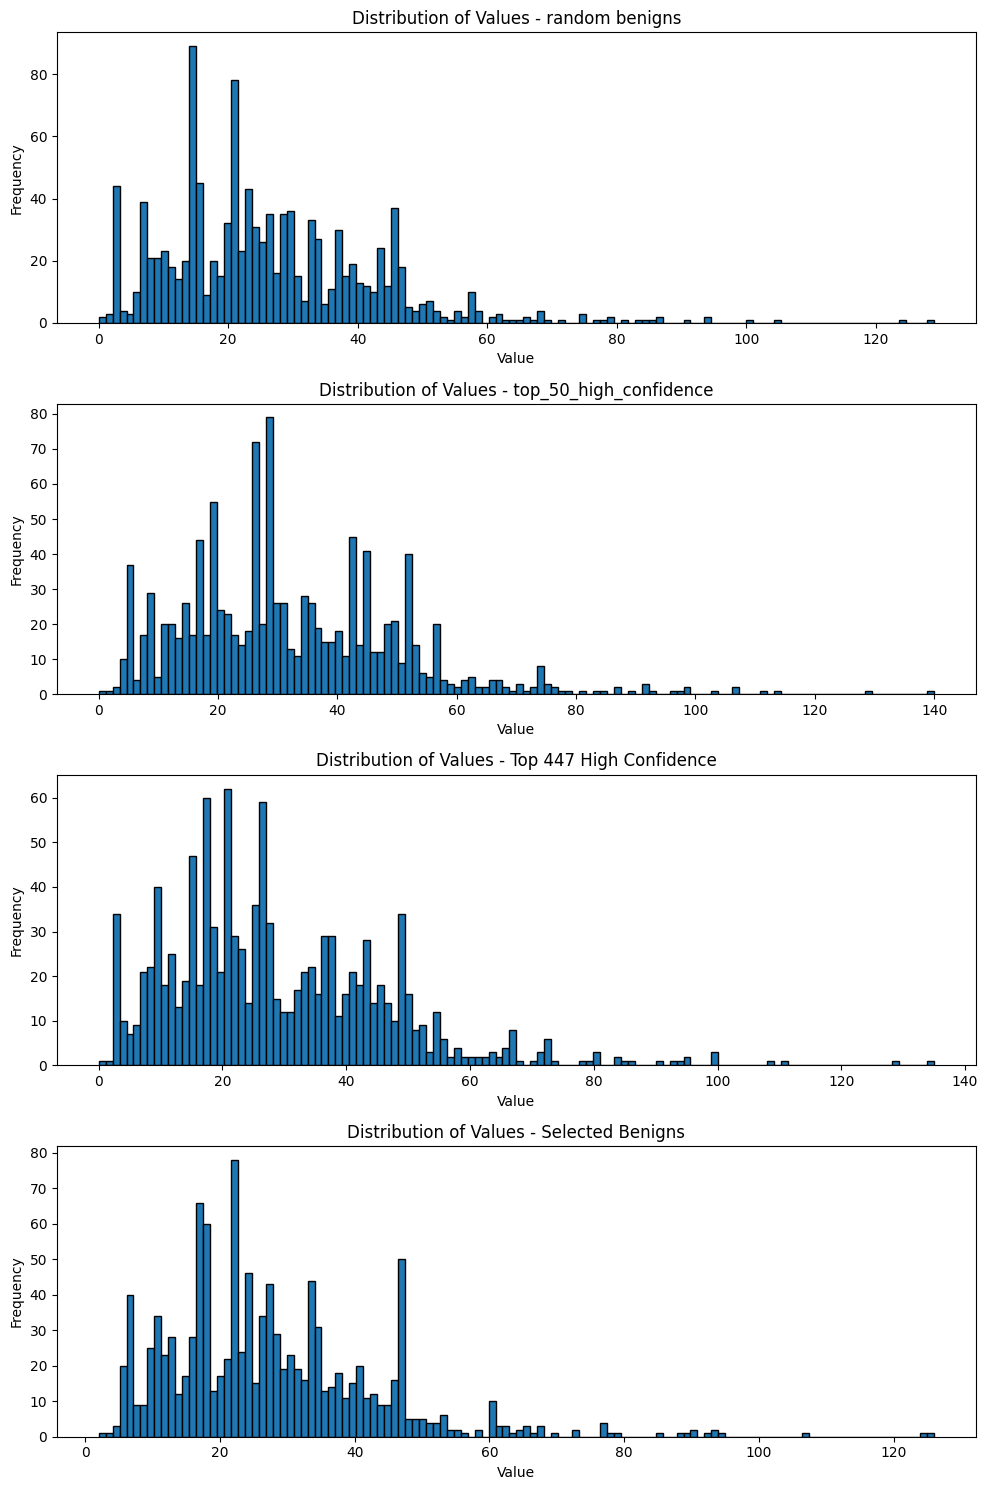

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

centers = [bens,top_50_high_confidence,top_447_high_confidence,selected_benigns]
titles = ['random benigns','top_50_high_confidence', 'Top 447 High Confidence', 'Selected Benigns']

# Prepare for subplots
fig, axes = plt.subplots(len(centers), 1, figsize=(10, 15))

for i, center in enumerate(centers):
    mins = []
    for mal in mal_x:
        min_diff = 1000
        for sample in center:
            dif = (torch.abs(sample - mal).sum()).item()
            if dif < min_diff:
                min_diff = dif
        mins.append(min_diff)

    mins = np.array(mins)

    print(f'{titles[i]} - Min: {np.min(mins)}')
    print(f'{titles[i]} - Max: {np.max(mins)}')
    print(f'{titles[i]} - Mean: {np.mean(mins)}')

    # Plot histogram in the corresponding subplot
    axes[i].hist(mins, bins=120, edgecolor='black')
    axes[i].set_title(f'Distribution of Values - {titles[i]}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show all plots
plt.show()


# PGD_min VS RBF

In [ ]:
model_AT_rFGSM(ben_x[sorted_indices[-5:]].to(torch.float32))

tensor([[-12.9775,  17.0473],
        [-39.4226,  49.3918],
        [ -5.6200,   6.6027],
        [-48.5828,  53.0153],
        [-86.9643,  90.6685]], grad_fn=<AddmmBackward0>)

In [ ]:
def pgd_min(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack (loss based on goal's class, which we have to minimize the loss).
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), torch.zeros_like(y.view(-1).long()))

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)


    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))


    # Multi-step PGD
    for t in range(k):
        #print('*********** ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, torch.zeros_like(y.view(-1).long()))
        #print('loss_mal : ',criterion(y_model, torch.zeros_like(y.view(-1).long())))
        #print('loss : ',criterion(y_model, y.view(-1).long()))

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        #print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        #pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
            #print(torch.abs(perturbation).sum())
            #print('torch.abs(perturbation).sum(dim=-1) : ',torch.abs(perturbation).sum(dim=-1))

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            #print('l2norm ; ',l2norm)
            perturbation = (gradients / (l2norm + 1e-20)).float()

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        #print(torch.abs(x_next - torch.clamp(x_next + perturbation * step_length, min=0., max=1.)).sum())
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), torch.zeros_like(y.view(-1).long())).data

    if is_report_loss_diff:
        done = get_done(x_next, y, model)
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
def get_done(x, y, model):
    # Get the model's predictions
    outputs = model(x)

    # Use argmax to get the predicted class indices
    predicted = torch.argmax(outputs, dim=1)

    # Ensure y is in the same shape as predicted for comparison
    y = y.view_as(predicted)

    # Determine if the predictions are incorrect
    done = (predicted != y).bool()

    return done

def get_loss_rbf(adv_x: torch.Tensor, y: torch.Tensor, model: nn.Module, RBFModel: nn.Module, penalty_factor: torch.Tensor) -> torch.Tensor:

    criterion = nn.CrossEntropyLoss()

    # Compute CE loss
    outputs = model(adv_x)
    ce = criterion(outputs, y)
    #print('ce ',ce)

    # Compute KDE loss
    outputs_rbf = RBFModel(adv_x)
    kde = criterion(outputs_rbf, y)
    #print('kde ',kde)

    # Combine the losses with the penalty factor
    loss = ce + penalty_factor * kde
    #print('loss ',loss)

    return loss



def rbf(x, y, model, RBFModel, insertion_array, removal_array, k=25, step_length=0.02, norm='linf',
        initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.

    :param x: Feature vector
    :param y: Ground truth labels
    :param model: Neural network model
    :param RBFModel: Gaussian model for KDE
    :param insertion_array: Array for insertion operations
    :param removal_array: Array for removal operations
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf', 'l2', 'l1')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    #target's class
    traget_labels = torch.zeros_like(y.view(-1).long())

    # Compute natural loss and penalty_factor
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), traget_labels)
    kde = criterion(RBFModel(x), traget_labels)
    #penalty_factor = 0.
    penalty_factor = (loss_natural / kde).detach()

    # Initialize starting point
    x_next = get_x0(x.clone(), initial_rounding_threshold, is_sample)

    # Expand insertion_array and removal_array to match the batch size
    expanded_insertion_array = insertion_array.expand(x.shape[0], -1)
    expanded_removal_array = removal_array.expand(x.shape[0], -1)

    # Update insertion and removal arrays based on input x
    insertion_array_updated = torch.bitwise_or(expanded_insertion_array, x.to(torch.uint8))
    removal_array_updated = torch.bitwise_or(expanded_removal_array, 1 - x.to(torch.uint8))

    for t in range(k):
        x_var = x_next.clone().detach().requires_grad_(True)
        decayed_penalty_factor = penalty_factor * (1 - t / k)

        # Compute loss
        loss = get_loss_rbf(x_var, traget_labels, model, RBFModel, decayed_penalty_factor)

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        #print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        pos_insertion = (x_var <= 0.999) * 1 * insertion_array_updated
        #pos_insertion = (x_var <= 0.999) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.001) * 1 * removal_array_updated
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion

        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
        elif norm == 'l2':
            l2norm = torch.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / (l2norm + 1e-20)).float()
        elif norm == 'l1':
            un_mod = torch.abs(x - x_var) <= 1e-6
            gradients = gradients * un_mod
            max_grad = torch.topk(torch.abs(gradients).view(gradients.size(0), -1), 1, dim=-1)[0]
            #print('max_grad ',max_grad)
            perturbation = (torch.abs(gradients) >= max_grad).float() * torch.sign(gradients).float()
            done = get_done(x_next, y, model)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1', 'l2', or 'linf' norm.")

        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    if random:
        round_threshold = torch.rand_like(x_next)
    x_next = round_x(x_next, round_threshold=round_threshold)

    outputs = model(x_next)
    loss_adv = criterion(outputs, traget_labels).data
    done = get_done(x_next, y, model)

    if is_report_loss_diff:
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size(0) * 100:.3f}%.")

    replace_flag = (loss_adv > loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next


In [ ]:
# when penalty_factor = 0
attack_params =  {'RBFModel':model_gaussian_1000,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, rbf, device, **attack_params)

PGD l1: Attack effectiveness 72.414%.
PGD l1: Attack effectiveness 68.000%.
PGD l1: Attack effectiveness 46.154%.
PGD l1: Attack effectiveness 77.143%.
PGD l1: Attack effectiveness 72.000%.
PGD l1: Attack effectiveness 68.000%.
PGD l1: Attack effectiveness 70.588%.
PGD l1: Attack effectiveness 60.606%.
PGD l1: Attack effectiveness 69.048%.
PGD l1: Attack effectiveness 65.517%.
PGD l1: Attack effectiveness 85.000%.
PGD l1: Attack effectiveness 61.765%.
PGD l1: Attack effectiveness 55.000%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 60.000%.
PGD l1: Attack effectiveness 77.419%.
PGD l1: Attack effectiveness 66.667%.
PGD l1: Attack effectiveness 88.000%.
PGD l1: Attack effectiveness 64.516%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 70.000%.
PGD l1: Attack effectiveness 76.667%.
PGD l1: Attack effectiveness 45.455%.
PGD l1: Attack effectiveness 65.517%.
PGD l1: Attack effectiveness 63.636%.
PGD l1: Attack effectiveness 61.538%.
PGD l1: Atta

In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

PGD l1: Attack effectiveness 72.414%.
PGD l1: Attack effectiveness 68.000%.
PGD l1: Attack effectiveness 46.154%.
PGD l1: Attack effectiveness 77.143%.
PGD l1: Attack effectiveness 72.000%.
PGD l1: Attack effectiveness 68.000%.
PGD l1: Attack effectiveness 70.588%.
PGD l1: Attack effectiveness 60.606%.
PGD l1: Attack effectiveness 69.048%.
PGD l1: Attack effectiveness 65.517%.
PGD l1: Attack effectiveness 85.000%.
PGD l1: Attack effectiveness 61.765%.
PGD l1: Attack effectiveness 55.000%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 60.000%.
PGD l1: Attack effectiveness 77.419%.
PGD l1: Attack effectiveness 66.667%.
PGD l1: Attack effectiveness 88.000%.
PGD l1: Attack effectiveness 64.516%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 70.000%.
PGD l1: Attack effectiveness 76.667%.
PGD l1: Attack effectiveness 45.455%.
PGD l1: Attack effectiveness 65.517%.
PGD l1: Attack effectiveness 63.636%.
PGD l1: Attack effectiveness 61.538%.
PGD l1: Atta

In [ ]:
# when penalty_factor = (loss_natural / kde).detach()
attack_params =  {'RBFModel':model_gaussian_1000,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, rbf, device, **attack_params)

PGD l1: Attack effectiveness 68.966%.
PGD l1: Attack effectiveness 76.000%.
PGD l1: Attack effectiveness 53.846%.
PGD l1: Attack effectiveness 82.857%.
PGD l1: Attack effectiveness 76.000%.
PGD l1: Attack effectiveness 76.000%.
PGD l1: Attack effectiveness 70.588%.
PGD l1: Attack effectiveness 63.636%.
PGD l1: Attack effectiveness 71.429%.
PGD l1: Attack effectiveness 75.862%.
PGD l1: Attack effectiveness 90.000%.
PGD l1: Attack effectiveness 64.706%.
PGD l1: Attack effectiveness 75.000%.
PGD l1: Attack effectiveness 77.778%.
PGD l1: Attack effectiveness 72.000%.
PGD l1: Attack effectiveness 77.419%.
PGD l1: Attack effectiveness 70.000%.
PGD l1: Attack effectiveness 88.000%.
PGD l1: Attack effectiveness 70.968%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 80.000%.
PGD l1: Attack effectiveness 83.333%.
PGD l1: Attack effectiveness 50.000%.
PGD l1: Attack effectiveness 68.966%.
PGD l1: Attack effectiveness 75.000%.
PGD l1: Attack effectiveness 65.385%.
PGD l1: Atta

In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

PGD l2: Attack effectiveness 72.414%.
PGD l2: Attack effectiveness 72.000%.
PGD l2: Attack effectiveness 53.846%.
PGD l2: Attack effectiveness 85.714%.
PGD l2: Attack effectiveness 72.000%.
PGD l2: Attack effectiveness 68.000%.
PGD l2: Attack effectiveness 76.471%.
PGD l2: Attack effectiveness 72.727%.
PGD l2: Attack effectiveness 71.429%.
PGD l2: Attack effectiveness 68.966%.
PGD l2: Attack effectiveness 90.000%.
PGD l2: Attack effectiveness 64.706%.
PGD l2: Attack effectiveness 65.000%.
PGD l2: Attack effectiveness 81.481%.
PGD l2: Attack effectiveness 68.000%.
PGD l2: Attack effectiveness 83.871%.
PGD l2: Attack effectiveness 70.000%.
PGD l2: Attack effectiveness 92.000%.
PGD l2: Attack effectiveness 77.419%.
PGD l2: Attack effectiveness 77.778%.
PGD l2: Attack effectiveness 80.000%.
PGD l2: Attack effectiveness 90.000%.
PGD l2: Attack effectiveness 50.000%.
PGD l2: Attack effectiveness 68.966%.
PGD l2: Attack effectiveness 72.727%.
PGD l2: Attack effectiveness 65.385%.
PGD l2: Atta

In [ ]:
attack_params =  {'RBFModel':model_gaussian_1000,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 0.5, 'norm': 'l2', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, rbf, device, **attack_params)

PGD l2: Attack effectiveness 72.414%.
PGD l2: Attack effectiveness 72.000%.
PGD l2: Attack effectiveness 53.846%.
PGD l2: Attack effectiveness 85.714%.
PGD l2: Attack effectiveness 72.000%.
PGD l2: Attack effectiveness 68.000%.
PGD l2: Attack effectiveness 79.412%.
PGD l2: Attack effectiveness 66.667%.
PGD l2: Attack effectiveness 76.190%.
PGD l2: Attack effectiveness 68.966%.
PGD l2: Attack effectiveness 90.000%.
PGD l2: Attack effectiveness 64.706%.
PGD l2: Attack effectiveness 70.000%.
PGD l2: Attack effectiveness 85.185%.
PGD l2: Attack effectiveness 72.000%.
PGD l2: Attack effectiveness 83.871%.
PGD l2: Attack effectiveness 73.333%.
PGD l2: Attack effectiveness 92.000%.
PGD l2: Attack effectiveness 77.419%.
PGD l2: Attack effectiveness 77.778%.
PGD l2: Attack effectiveness 83.333%.
PGD l2: Attack effectiveness 90.000%.
PGD l2: Attack effectiveness 50.000%.
PGD l2: Attack effectiveness 72.414%.
PGD l2: Attack effectiveness 75.000%.
PGD l2: Attack effectiveness 65.385%.
PGD l2: Atta

In [ ]:
attack_params =  {'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, pgd_min, device, **attack_params)

PGD linf: Attack effectiveness 72.414%.
PGD linf: Attack effectiveness 64.000%.
PGD linf: Attack effectiveness 38.462%.
PGD linf: Attack effectiveness 74.286%.
PGD linf: Attack effectiveness 68.000%.
PGD linf: Attack effectiveness 60.000%.
PGD linf: Attack effectiveness 70.588%.
PGD linf: Attack effectiveness 60.606%.
PGD linf: Attack effectiveness 66.667%.
PGD linf: Attack effectiveness 62.069%.
PGD linf: Attack effectiveness 85.000%.
PGD linf: Attack effectiveness 55.882%.
PGD linf: Attack effectiveness 45.000%.
PGD linf: Attack effectiveness 74.074%.
PGD linf: Attack effectiveness 60.000%.
PGD linf: Attack effectiveness 61.290%.
PGD linf: Attack effectiveness 63.333%.
PGD linf: Attack effectiveness 76.000%.
PGD linf: Attack effectiveness 67.742%.
PGD linf: Attack effectiveness 70.370%.
PGD linf: Attack effectiveness 66.667%.
PGD linf: Attack effectiveness 70.000%.
PGD linf: Attack effectiveness 40.909%.
PGD linf: Attack effectiveness 58.621%.
PGD linf: Attack effectiveness 61.364%.


In [ ]:
attack_params =  {'RBFModel':model_gaussian_1000,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 0.02, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, rbf, device, **attack_params)

PGD linf: Attack effectiveness 68.966%.
PGD linf: Attack effectiveness 52.000%.
PGD linf: Attack effectiveness 38.462%.
PGD linf: Attack effectiveness 65.714%.
PGD linf: Attack effectiveness 60.000%.
PGD linf: Attack effectiveness 48.000%.
PGD linf: Attack effectiveness 61.765%.
PGD linf: Attack effectiveness 57.576%.
PGD linf: Attack effectiveness 54.762%.
PGD linf: Attack effectiveness 62.069%.
PGD linf: Attack effectiveness 70.000%.
PGD linf: Attack effectiveness 55.882%.
PGD linf: Attack effectiveness 35.000%.
PGD linf: Attack effectiveness 70.370%.
PGD linf: Attack effectiveness 48.000%.
PGD linf: Attack effectiveness 58.065%.
PGD linf: Attack effectiveness 60.000%.
PGD linf: Attack effectiveness 68.000%.
PGD linf: Attack effectiveness 54.839%.
PGD linf: Attack effectiveness 62.963%.
PGD linf: Attack effectiveness 66.667%.
PGD linf: Attack effectiveness 66.667%.
PGD linf: Attack effectiveness 40.909%.
PGD linf: Attack effectiveness 51.724%.
PGD linf: Attack effectiveness 54.545%.


In [ ]:
attack_params =  {'RBFModel':model_gaussian_1000,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 200, 'step_length': 0.01, 'norm': 'linf', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, rbf, device, **attack_params)

PGD linf: Attack effectiveness 72.414%.
PGD linf: Attack effectiveness 72.000%.
PGD linf: Attack effectiveness 46.154%.
PGD linf: Attack effectiveness 80.000%.
PGD linf: Attack effectiveness 68.000%.
PGD linf: Attack effectiveness 60.000%.
PGD linf: Attack effectiveness 70.588%.
PGD linf: Attack effectiveness 60.606%.
PGD linf: Attack effectiveness 66.667%.
PGD linf: Attack effectiveness 62.069%.
PGD linf: Attack effectiveness 85.000%.
PGD linf: Attack effectiveness 58.824%.
PGD linf: Attack effectiveness 40.000%.
PGD linf: Attack effectiveness 81.481%.
PGD linf: Attack effectiveness 68.000%.
PGD linf: Attack effectiveness 67.742%.
PGD linf: Attack effectiveness 66.667%.
PGD linf: Attack effectiveness 84.000%.
PGD linf: Attack effectiveness 64.516%.
PGD linf: Attack effectiveness 70.370%.
PGD linf: Attack effectiveness 73.333%.
PGD linf: Attack effectiveness 76.667%.
PGD linf: Attack effectiveness 45.455%.
PGD linf: Attack effectiveness 62.069%.
PGD linf: Attack effectiveness 68.182%.


In [ ]:
# when penalty_factor = (loss_natural / kde).detach()/2.
attack_params =  {'RBFModel':model_gaussian_1000,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, rbf, device, **attack_params)

PGD l1: Attack effectiveness 68.966%.
PGD l1: Attack effectiveness 76.000%.
PGD l1: Attack effectiveness 46.154%.
PGD l1: Attack effectiveness 80.000%.
PGD l1: Attack effectiveness 76.000%.
PGD l1: Attack effectiveness 68.000%.
PGD l1: Attack effectiveness 79.412%.
PGD l1: Attack effectiveness 60.606%.
PGD l1: Attack effectiveness 69.048%.
PGD l1: Attack effectiveness 72.414%.
PGD l1: Attack effectiveness 90.000%.
PGD l1: Attack effectiveness 61.765%.
PGD l1: Attack effectiveness 55.000%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 64.000%.
PGD l1: Attack effectiveness 77.419%.
PGD l1: Attack effectiveness 66.667%.
PGD l1: Attack effectiveness 88.000%.
PGD l1: Attack effectiveness 70.968%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 73.333%.
PGD l1: Attack effectiveness 80.000%.
PGD l1: Attack effectiveness 50.000%.
PGD l1: Attack effectiveness 68.966%.
PGD l1: Attack effectiveness 68.182%.
PGD l1: Attack effectiveness 65.385%.
PGD l1: Atta

In [ ]:
# when penalty_factor = (loss_natural / kde).detach()  fixed
attack_params =  {'RBFModel':model_gaussian_1000,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, rbf, device, **attack_params)

PGD l1: Attack effectiveness 68.966%.
PGD l1: Attack effectiveness 68.000%.
PGD l1: Attack effectiveness 42.308%.
PGD l1: Attack effectiveness 82.857%.
PGD l1: Attack effectiveness 76.000%.
PGD l1: Attack effectiveness 68.000%.
PGD l1: Attack effectiveness 76.471%.
PGD l1: Attack effectiveness 54.545%.
PGD l1: Attack effectiveness 69.048%.
PGD l1: Attack effectiveness 65.517%.
PGD l1: Attack effectiveness 90.000%.
PGD l1: Attack effectiveness 58.824%.
PGD l1: Attack effectiveness 65.000%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 64.000%.
PGD l1: Attack effectiveness 77.419%.
PGD l1: Attack effectiveness 70.000%.
PGD l1: Attack effectiveness 88.000%.
PGD l1: Attack effectiveness 67.742%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 70.000%.
PGD l1: Attack effectiveness 80.000%.
PGD l1: Attack effectiveness 45.455%.
PGD l1: Attack effectiveness 68.966%.
PGD l1: Attack effectiveness 68.182%.
PGD l1: Attack effectiveness 65.385%.
PGD l1: Atta

In [ ]:
# when penalty_factor = (loss_natural / kde).detach()  decrease by /2
attack_params =  {'RBFModel':model_gaussian_1000,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, rbf, device, **attack_params)

PGD l1: Attack effectiveness 72.414%.
PGD l1: Attack effectiveness 72.000%.
PGD l1: Attack effectiveness 50.000%.
PGD l1: Attack effectiveness 80.000%.
PGD l1: Attack effectiveness 76.000%.
PGD l1: Attack effectiveness 76.000%.
PGD l1: Attack effectiveness 76.471%.
PGD l1: Attack effectiveness 60.606%.
PGD l1: Attack effectiveness 69.048%.
PGD l1: Attack effectiveness 75.862%.
PGD l1: Attack effectiveness 90.000%.
PGD l1: Attack effectiveness 64.706%.
PGD l1: Attack effectiveness 60.000%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 68.000%.
PGD l1: Attack effectiveness 80.645%.
PGD l1: Attack effectiveness 66.667%.
PGD l1: Attack effectiveness 88.000%.
PGD l1: Attack effectiveness 67.742%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 73.333%.
PGD l1: Attack effectiveness 73.333%.
PGD l1: Attack effectiveness 50.000%.
PGD l1: Attack effectiveness 68.966%.
PGD l1: Attack effectiveness 65.909%.
PGD l1: Attack effectiveness 57.692%.
PGD l1: Atta

In [ ]:
# when penalty_factor = (loss_natural / kde).detach()  penalty_factor /(2**(t-1))
attack_params =  {'RBFModel':model_gaussian_1000,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 50, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, rbf, device, **attack_params)

PGD l1: Attack effectiveness 72.414%.
PGD l1: Attack effectiveness 72.000%.
PGD l1: Attack effectiveness 53.846%.
PGD l1: Attack effectiveness 74.286%.
PGD l1: Attack effectiveness 72.000%.
PGD l1: Attack effectiveness 76.000%.
PGD l1: Attack effectiveness 76.471%.
PGD l1: Attack effectiveness 60.606%.
PGD l1: Attack effectiveness 66.667%.
PGD l1: Attack effectiveness 75.862%.
PGD l1: Attack effectiveness 85.000%.
PGD l1: Attack effectiveness 64.706%.
PGD l1: Attack effectiveness 55.000%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 68.000%.
PGD l1: Attack effectiveness 74.194%.
PGD l1: Attack effectiveness 63.333%.
PGD l1: Attack effectiveness 88.000%.
PGD l1: Attack effectiveness 67.742%.
PGD l1: Attack effectiveness 66.667%.
PGD l1: Attack effectiveness 73.333%.
PGD l1: Attack effectiveness 80.000%.
PGD l1: Attack effectiveness 50.000%.
PGD l1: Attack effectiveness 65.517%.
PGD l1: Attack effectiveness 65.909%.
PGD l1: Attack effectiveness 61.538%.
PGD l1: Atta

In [ ]:
# when penalty_factor = (loss_natural / kde).detach()
attack_params =  {'RBFModel':model_gaussian_1000,'insertion_array':insertion_array, 'removal_array':removal_array,'k': 100, 'step_length': 1., 'norm': 'l1', 'is_report_loss_diff' : True}
adv_predict(test_loader, model_AT_rFGSM, rbf, device, **attack_params)

PGD l1: Attack effectiveness 68.966%.
PGD l1: Attack effectiveness 72.000%.
PGD l1: Attack effectiveness 46.154%.
PGD l1: Attack effectiveness 80.000%.
PGD l1: Attack effectiveness 76.000%.
PGD l1: Attack effectiveness 76.000%.
PGD l1: Attack effectiveness 67.647%.
PGD l1: Attack effectiveness 63.636%.
PGD l1: Attack effectiveness 66.667%.
PGD l1: Attack effectiveness 75.862%.
PGD l1: Attack effectiveness 95.000%.
PGD l1: Attack effectiveness 64.706%.
PGD l1: Attack effectiveness 60.000%.
PGD l1: Attack effectiveness 85.185%.
PGD l1: Attack effectiveness 68.000%.
PGD l1: Attack effectiveness 77.419%.
PGD l1: Attack effectiveness 70.000%.
PGD l1: Attack effectiveness 88.000%.
PGD l1: Attack effectiveness 74.194%.
PGD l1: Attack effectiveness 74.074%.
PGD l1: Attack effectiveness 83.333%.
PGD l1: Attack effectiveness 90.000%.
PGD l1: Attack effectiveness 54.545%.
PGD l1: Attack effectiveness 72.414%.
PGD l1: Attack effectiveness 70.455%.
PGD l1: Attack effectiveness 65.385%.
PGD l1: Atta